![](https://img.webmd.com/dtmcms/live/webmd/consumer_assets/site_images/article_thumbnails/news/2020/01_2020/coronavirus_1/1800x1200_coronavirus_1.jpg)

# 1. Import Library

In [1]:
# System
import sys
import os
import operator
import argparse
import itertools

# Time
import time
import datetime

# Numerical Data
import random
import numpy as np 
import pandas as pd

# Tools
import shutil
from glob import glob
from tqdm import tqdm
import gc

# NLP
import re

# Preprocessing
from sklearn import preprocessing
from sklearn.utils import class_weight as cw
from sklearn.utils import shuffle

# Model Selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

# Machine Learning Models
from sklearn import svm
from sklearn.svm import LinearSVC, SVC

# Evaluation Metrics
from sklearn import metrics 
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, confusion_matrix, classification_report, roc_auc_score


# Deep Learning - Keras -  Preprocessing
from keras.preprocessing.image import ImageDataGenerator

# Deep Learning - Keras - Model
import keras
from keras import models
from keras.models import Model
from keras.models import load_model
from keras.models import Sequential

# Deep Learning - Keras - Layers
from keras.layers import Convolution1D, concatenate, SpatialDropout1D, GlobalMaxPool1D, GlobalAvgPool1D, Embedding, \
    Conv2D, SeparableConv1D, Add, BatchNormalization, Activation, GlobalAveragePooling2D, LeakyReLU, Flatten
from keras.layers import Dense, Input, Dropout, MaxPool2D, MaxPooling2D, Concatenate, GlobalMaxPooling2D, GlobalAveragePooling2D, \
    Lambda, Multiply, LSTM, Bidirectional, PReLU, MaxPooling1D
from keras.layers.pooling import _GlobalPooling1D

from keras.regularizers import l2

# Deep Learning - Keras - Pretrained Models
from keras.applications.xception import Xception
from keras.applications.resnet50 import ResNet50
from keras.applications.inception_v3 import InceptionV3
from keras.applications.inception_resnet_v2 import InceptionResNetV2
from keras.applications.densenet import DenseNet201
from keras.applications.nasnet import NASNetMobile, NASNetLarge

from keras.applications.nasnet import preprocess_input

# Deep Learning - Keras - Model Parameters and Evaluation Metrics
from keras import optimizers
from keras.optimizers import Adam, SGD , RMSprop
from keras.losses import mae, sparse_categorical_crossentropy, binary_crossentropy

# Deep Learning - Keras - Visualisation
from keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard, ReduceLROnPlateau, LearningRateScheduler
# from keras.wrappers.scikit_learn import KerasClassifier
from keras import backend as K

# Deep Learning - TensorFlow
import tensorflow as tf

# Graph/ Visualization
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib.image as mpimg
import seaborn as sns
from mlxtend.plotting import plot_confusion_matrix
from wordcloud import WordCloud

# Image
import cv2
from PIL import Image
from IPython.display import display

# np.random.seed(42)

%matplotlib inline

# Input data
print(os.listdir("../input/"))


for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

Using TensorFlow backend.


['corona-virus-time-series-dataset']
/kaggle/input/corona-virus-time-series-dataset/time_series_19-covid-Deaths.csv
/kaggle/input/corona-virus-time-series-dataset/time_series_19-covid-Confirmed.csv
/kaggle/input/corona-virus-time-series-dataset/time_series_19-covid-Recovered.csv


# 2. Read Data

In [2]:
time_series_covid_19_confirmed = pd.read_csv("../input/corona-virus-time-series-dataset/time_series_19-covid-Confirmed.csv")
time_series_covid_19_recovered = pd.read_csv("../input/corona-virus-time-series-dataset/time_series_19-covid-Recovered.csv")
time_series_covid_19_deaths = pd.read_csv("../input/corona-virus-time-series-dataset/time_series_19-covid-Deaths.csv")

Lets see some data

In [3]:
time_series_covid_19_confirmed.head()

Province/State  Country/Region      Lat      Long  1/22/20  1/23/20  \
0          Anhui  Mainland China  31.8257  117.2264        1        9   
1        Beijing  Mainland China  40.1824  116.4142       14       22   
2      Chongqing  Mainland China  30.0572  107.8740        6        9   
3         Fujian  Mainland China  26.0789  117.9874        1        5   
4          Gansu  Mainland China  36.0611  103.8343        0        2   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  2/18/20  2/19/20  2/20/20  \
0       15       39       60       70  ...      982      986      987   
1       36       41       68       80  ...      387      393      395   
2       27       57       75      110  ...      555      560      567   
3       10       18       35       59  ...      292      293      293   
4        2        4        7       14  ...       91       91       91   

   2/21/20  2/22/20  2/23/20  2/24/20  2/25/20  2/26/20  2/27/20  
0      988      989      989      989      989      989      989  
1      396      399      399      399      400      400      410  
2      572      573      575      576      576      576      576  
3      293      293      293      293      294      294      296  
4       91       91       91       91       91       91       91  

[5 rows x 41 columns]

In [4]:
time_series_covid_19_confirmed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 41 columns):
Province/State    60 non-null object
Country/Region    105 non-null object
Lat               105 non-null float64
Long              105 non-null float64
1/22/20           105 non-null int64
1/23/20           105 non-null int64
1/24/20           105 non-null int64
1/25/20           105 non-null int64
1/26/20           105 non-null int64
1/27/20           105 non-null int64
1/28/20           105 non-null int64
1/29/20           105 non-null int64
1/30/20           105 non-null int64
1/31/20           105 non-null int64
2/1/20            105 non-null int64
2/2/20            105 non-null int64
2/3/20            105 non-null int64
2/4/20            105 non-null int64
2/5/20            105 non-null int64
2/6/20            105 non-null int64
2/7/20            105 non-null int64
2/8/20            105 non-null int64
2/9/20            105 non-null int64
2/10/20           105 non-null int64
2/

In [5]:
time_series_covid_19_confirmed.fillna("NA", inplace=True)

In [6]:
time_series_covid_19_recovered.head()

Province/State  Country/Region      Lat      Long  1/22/20  1/23/20  \
0          Anhui  Mainland China  31.8257  117.2264        0        0   
1        Beijing  Mainland China  40.1824  116.4142        0        0   
2      Chongqing  Mainland China  30.0572  107.8740        0        0   
3         Fujian  Mainland China  26.0789  117.9874        0        0   
4          Gansu  Mainland China  36.0611  103.8343        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  2/18/20  2/19/20  2/20/20  \
0        0        0        0        0  ...      361      413      474   
1        1        2        2        2  ...      122      145      153   
2        0        0        0        0  ...      254      274      299   
3        0        0        0        0  ...       93      112      126   
4        0        0        0        0  ...       62       65       71   

   2/21/20  2/22/20  2/23/20  2/24/20  2/25/20  2/26/20  2/27/20  
0      539      597      637      663      712      744      792  
1      169      178      189      198      215      235      248  
2      316      328      335      349      372      384      401  
3      149      162      170      183      199      218      228  
4       76       76       78       80       80       81       81  

[5 rows x 41 columns]

In [7]:
time_series_covid_19_recovered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 41 columns):
Province/State    60 non-null object
Country/Region    105 non-null object
Lat               105 non-null float64
Long              105 non-null float64
1/22/20           105 non-null int64
1/23/20           105 non-null int64
1/24/20           105 non-null int64
1/25/20           105 non-null int64
1/26/20           105 non-null int64
1/27/20           105 non-null int64
1/28/20           105 non-null int64
1/29/20           105 non-null int64
1/30/20           105 non-null int64
1/31/20           105 non-null int64
2/1/20            105 non-null int64
2/2/20            105 non-null int64
2/3/20            105 non-null int64
2/4/20            105 non-null int64
2/5/20            105 non-null int64
2/6/20            105 non-null int64
2/7/20            105 non-null int64
2/8/20            105 non-null int64
2/9/20            105 non-null int64
2/10/20           105 non-null int64
2/

In [8]:
time_series_covid_19_recovered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 41 columns):
Province/State    60 non-null object
Country/Region    105 non-null object
Lat               105 non-null float64
Long              105 non-null float64
1/22/20           105 non-null int64
1/23/20           105 non-null int64
1/24/20           105 non-null int64
1/25/20           105 non-null int64
1/26/20           105 non-null int64
1/27/20           105 non-null int64
1/28/20           105 non-null int64
1/29/20           105 non-null int64
1/30/20           105 non-null int64
1/31/20           105 non-null int64
2/1/20            105 non-null int64
2/2/20            105 non-null int64
2/3/20            105 non-null int64
2/4/20            105 non-null int64
2/5/20            105 non-null int64
2/6/20            105 non-null int64
2/7/20            105 non-null int64
2/8/20            105 non-null int64
2/9/20            105 non-null int64
2/10/20           105 non-null int64
2/

In [9]:
time_series_covid_19_deaths.fillna("NA", inplace=True)

In [10]:
time_series_covid_19_deaths.head()

Province/State  Country/Region      Lat      Long  1/22/20  1/23/20  \
0          Anhui  Mainland China  31.8257  117.2264        0        0   
1        Beijing  Mainland China  40.1824  116.4142        0        0   
2      Chongqing  Mainland China  30.0572  107.8740        0        0   
3         Fujian  Mainland China  26.0789  117.9874        0        0   
4          Gansu  Mainland China  36.0611  103.8343        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  2/18/20  2/19/20  2/20/20  \
0        0        0        0        0  ...        6        6        6   
1        0        0        0        1  ...        4        4        4   
2        0        0        0        0  ...        5        5        6   
3        0        0        0        0  ...        0        0        1   
4        0        0        0        0  ...        2        2        2   

   2/21/20  2/22/20  2/23/20  2/24/20  2/25/20  2/26/20  2/27/20  
0        6        6        6        6        6        6        6  
1        4        4        4        4        4        4        5  
2        6        6        6        6        6        6        6  
3        1        1        1        1        1        1        1  
4        2        2        2        2        2        2        2  

[5 rows x 41 columns]

In [11]:
time_series_covid_19_deaths.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 41 columns):
Province/State    105 non-null object
Country/Region    105 non-null object
Lat               105 non-null float64
Long              105 non-null float64
1/22/20           105 non-null int64
1/23/20           105 non-null int64
1/24/20           105 non-null int64
1/25/20           105 non-null int64
1/26/20           105 non-null int64
1/27/20           105 non-null int64
1/28/20           105 non-null int64
1/29/20           105 non-null int64
1/30/20           105 non-null int64
1/31/20           105 non-null int64
2/1/20            105 non-null int64
2/2/20            105 non-null int64
2/3/20            105 non-null int64
2/4/20            105 non-null int64
2/5/20            105 non-null int64
2/6/20            105 non-null int64
2/7/20            105 non-null int64
2/8/20            105 non-null int64
2/9/20            105 non-null int64
2/10/20           105 non-null int64
2

In [12]:
time_series_covid_19_recovered.fillna("NA", inplace=True)

In [13]:
columns = time_series_covid_19_confirmed.columns.tolist()
rej_columns = ['Province/State', 'Country/Region', 'Lat', 'Long']
data_cols = [c for c in columns if c not in rej_columns]

In [14]:
# print("Number of days of outbreak recorded      : %d"%(len(time_series_covid_19_confirmed.ObservationDate.unique())))
print("Number of countries with outbreak        : %d"%(len(time_series_covid_19_confirmed["Country/Region"].unique())))
print("Number of Province/State with outbreak   : %d"%(len(time_series_covid_19_confirmed["Province/State"].unique()) - 1))

Number of countries with outbreak        : 53
Number of Province/State with outbreak   : 60


In [15]:
confirm_country = time_series_covid_19_confirmed["Country/Region"].unique()
confirm_country.sort()

print(" Number of country with outbreak: %d"%(len(confirm_country)))
print("\n Following are the countries with outbreak:\n")

i = 1
for c in confirm_country:
    print(" %.2d : %s"%(i, c))
    i+=1

 Number of country with outbreak: 53

 Following are the countries with outbreak:

 01 : Afghanistan
 02 : Algeria
 03 : Australia
 04 : Austria
 05 : Bahrain
 06 : Belgium
 07 : Brazil
 08 : Cambodia
 09 : Canada
 10 : Croatia
 11 : Denmark
 12 : Egypt
 13 : Estonia
 14 : Finland
 15 : France
 16 : Georgia
 17 : Germany
 18 : Greece
 19 : Hong Kong
 20 : India
 21 : Iran
 22 : Iraq
 23 : Israel
 24 : Italy
 25 : Japan
 26 : Kuwait
 27 : Lebanon
 28 : Macau
 29 : Mainland China
 30 : Malaysia
 31 : Nepal
 32 : Netherlands
 33 : North Macedonia
 34 : Norway
 35 : Oman
 36 : Others
 37 : Pakistan
 38 : Philippines
 39 : Romania
 40 : Russia
 41 : San Marino
 42 : Singapore
 43 : South Korea
 44 : Spain
 45 : Sri Lanka
 46 : Sweden
 47 : Switzerland
 48 : Taiwan
 49 : Thailand
 50 : UK
 51 : US
 52 : United Arab Emirates
 53 : Vietnam


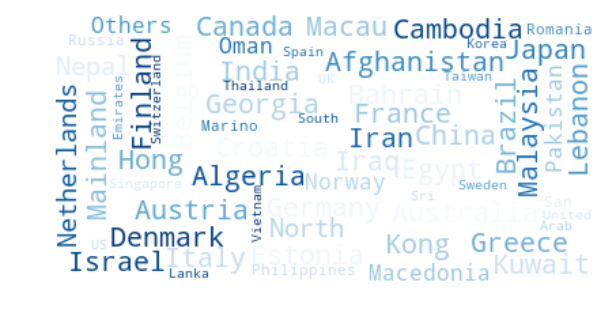

In [16]:


ticksize = 20
titlesize = ticksize + 8
labelsize = ticksize + 5

figsize = (18, 5)
params = {'figure.figsize' : figsize,
          'axes.labelsize' : labelsize,
          'axes.titlesize' : titlesize,
          'xtick.labelsize': ticksize,
          'ytick.labelsize': ticksize}

plt.rcParams.update(params)


text = ""
for c in confirm_country:
    text += c + " "

# Generate a word cloud image
wordcloud = WordCloud().generate(text)

wordcloud = WordCloud(max_font_size=20, background_color="white", colormap="Blues").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [17]:
state_province_country_map = {}

for index, row in time_series_covid_19_confirmed.iterrows():
    state_province_country_map[row["Province/State"]] = row["Country/Region"]

state_province_country_map = sorted(state_province_country_map.items(), key=operator.itemgetter(1), reverse=False)
state_province_country_map = { i:j for i,j in state_province_country_map }

# print(" Following are the states with outbreak: \n")
# for key in state_province_country_map:
#     print("%20s : %s" % (state_province_country_map[key], key))

In [18]:
country_state_province_map = {}

for state in state_province_country_map:
    if state_province_country_map[state] not in country_state_province_map:
        country_state_province_map[state_province_country_map[state]] = []
    country_state_province_map[state_province_country_map[state]].append(state)

for country in country_state_province_map:
    print(" " + country + "(" + str(len(country_state_province_map[country])) + ")" )
    print("_"*20)
    country_state_province_map[country].sort()
    for state in country_state_province_map[country]:
        print(" " + str(state))
    print("\n")

 Australia(5)
____________________
 From Diamond Princess
 New South Wales
 Queensland
 South Australia
 Victoria


 Canada(3)
____________________
 British Columbia
 London, ON
 Toronto, ON


 Hong Kong(1)
____________________
 Hong Kong


 Macau(1)
____________________
 Macau


 Mainland China(31)
____________________
 Anhui
 Beijing
 Chongqing
 Fujian
 Gansu
 Guangdong
 Guangxi
 Guizhou
 Hainan
 Hebei
 Heilongjiang
 Henan
 Hubei
 Hunan
 Inner Mongolia
 Jiangsu
 Jiangxi
 Jilin
 Liaoning
 Ningxia
 Qinghai
 Shaanxi
 Shandong
 Shanghai
 Shanxi
 Sichuan
 Tianjin
 Tibet
 Xinjiang
 Yunnan
 Zhejiang


 Others(1)
____________________
 Diamond Princess cruise ship


 San Marino(1)
____________________
 NA


 Taiwan(1)
____________________
 Taiwan


 US(17)
____________________
 Boston, MA
 Chicago, IL
 Humboldt County, CA
 Lackland, TX (From Diamond Princess)
 Los Angeles, CA
 Madison, WI
 Omaha, NE (From Diamond Princess)
 Orange, CA
 Sacramento County, CA
 San Antonio, TX
 San Benito, CA
 S

In [19]:
ticksize = 18
titlesize = ticksize + 8
labelsize = ticksize + 5

figsize = (18, 5)
params = {'figure.figsize' : figsize,
          'axes.labelsize' : labelsize,
          'axes.titlesize' : titlesize,
          'xtick.labelsize': ticksize,
          'ytick.labelsize': ticksize}

plt.rcParams.update(params)

title = "Total Number of Confirmed Cases by Date"

time_series_covid_19_confirmed[data_cols].sum().plot()
plt.title(title)
plt.show()

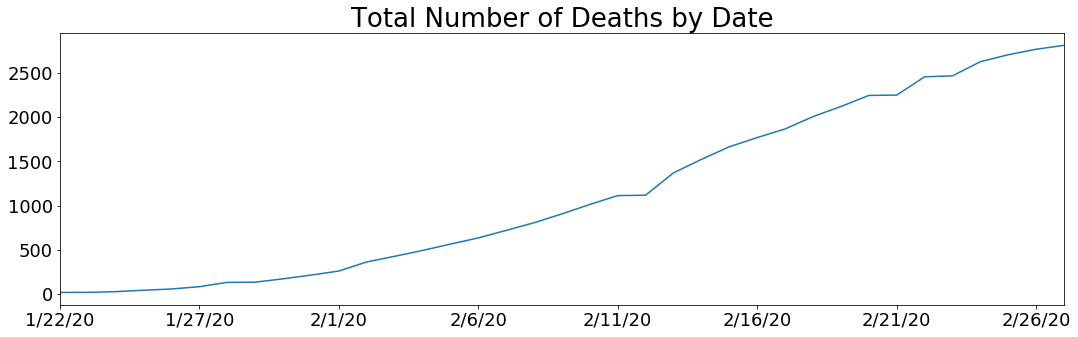

In [20]:
ticksize = 18
titlesize = ticksize + 8
labelsize = ticksize + 5

figsize = (18, 5)
params = {'figure.figsize' : figsize,
          'axes.labelsize' : labelsize,
          'axes.titlesize' : titlesize,
          'xtick.labelsize': ticksize,
          'ytick.labelsize': ticksize}

plt.rcParams.update(params)

title = "Total Number of Deaths by Date"

time_series_covid_19_deaths[data_cols].sum().plot()
plt.title(title)
plt.show()

In [21]:
ticksize = 18
titlesize = ticksize + 8
labelsize = ticksize + 5

figsize = (18, 5)
params = {'figure.figsize' : figsize,
          'axes.labelsize' : labelsize,
          'axes.titlesize' : titlesize,
          'xtick.labelsize': ticksize,
          'ytick.labelsize': ticksize}

plt.rcParams.update(params)

title = "Total Number of Recovery by Date"

time_series_covid_19_recovered[data_cols].sum().plot()
plt.title(title)
plt.show()

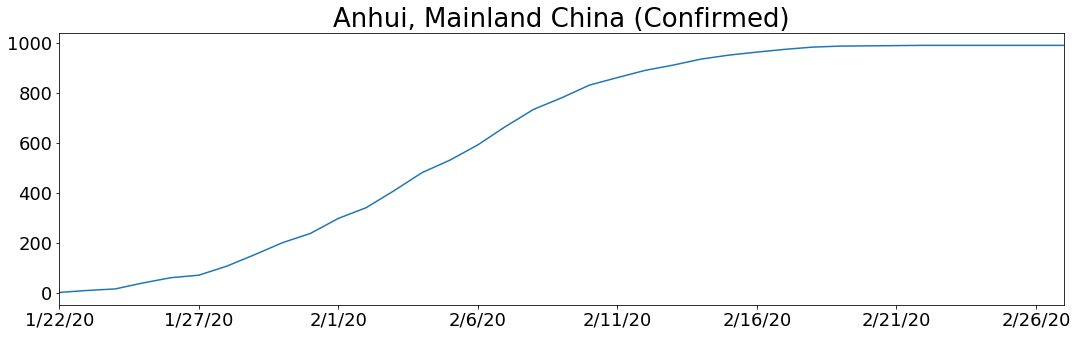

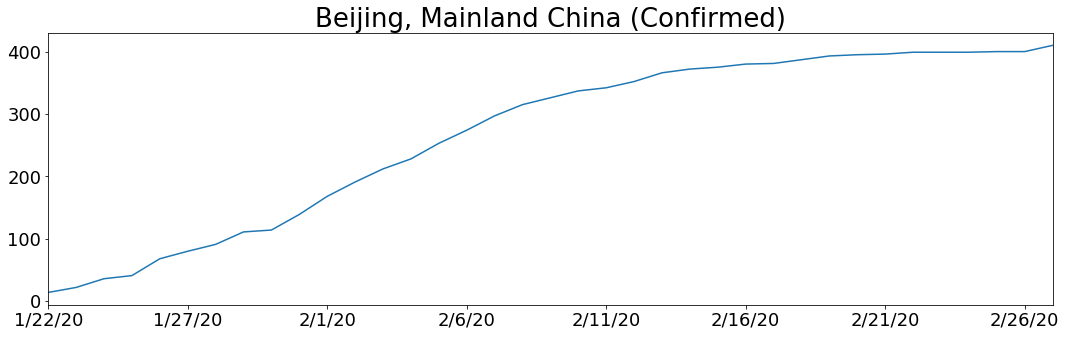

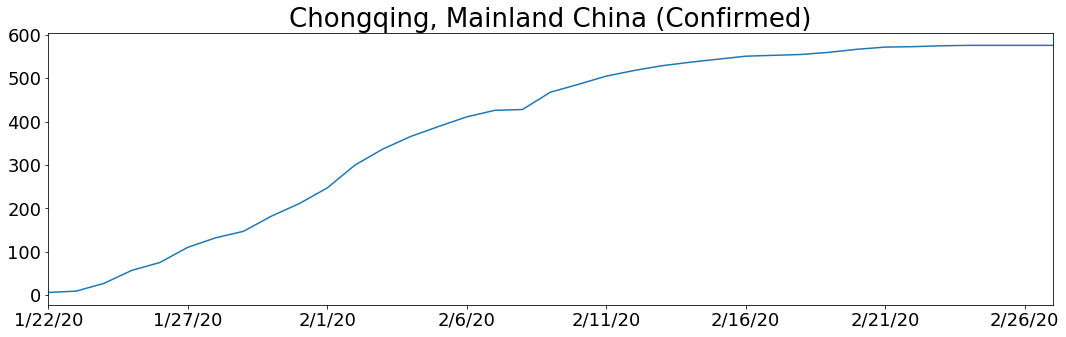

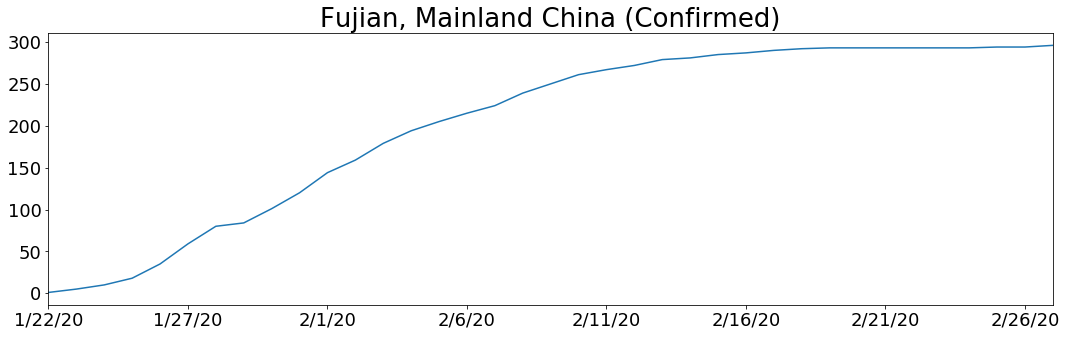

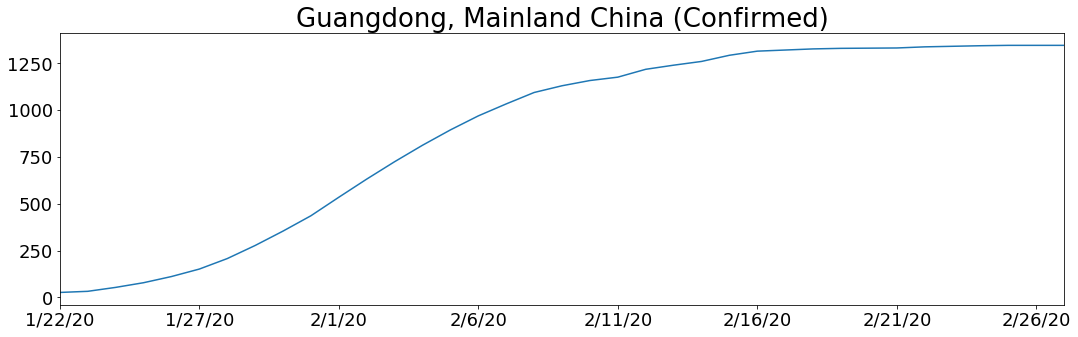

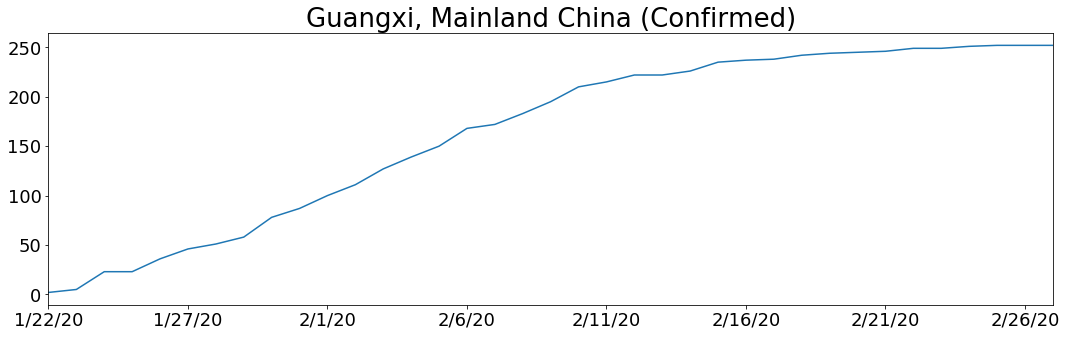

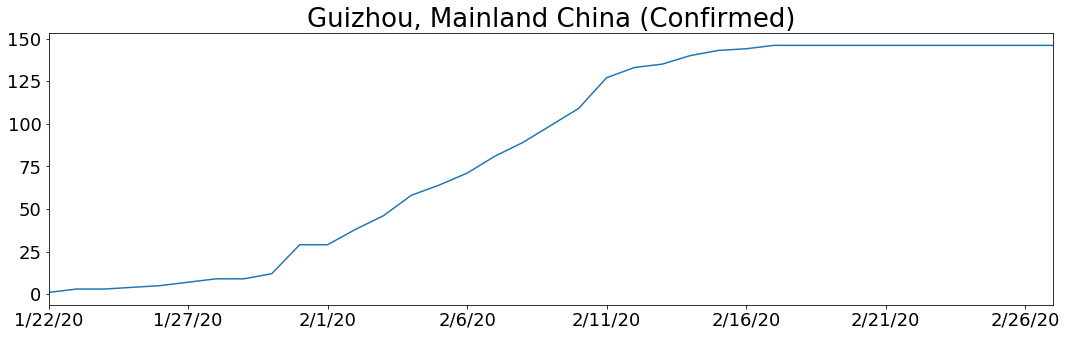

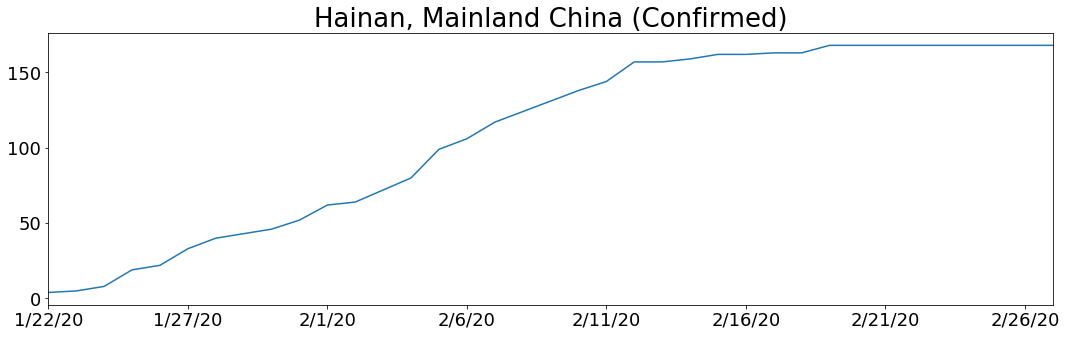

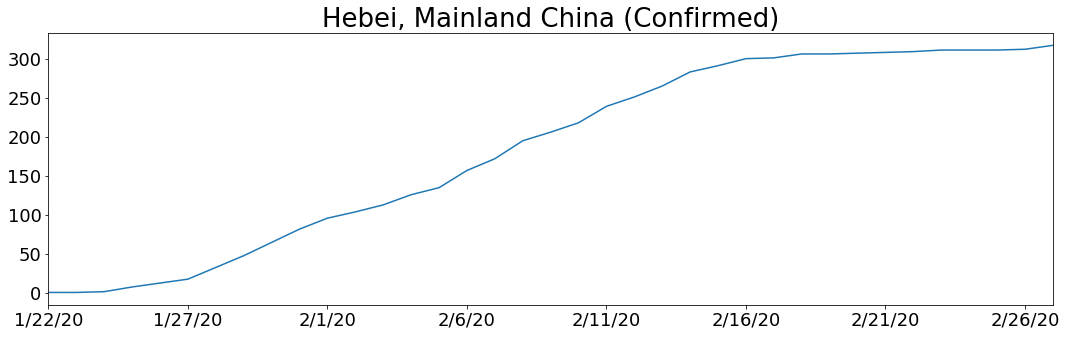

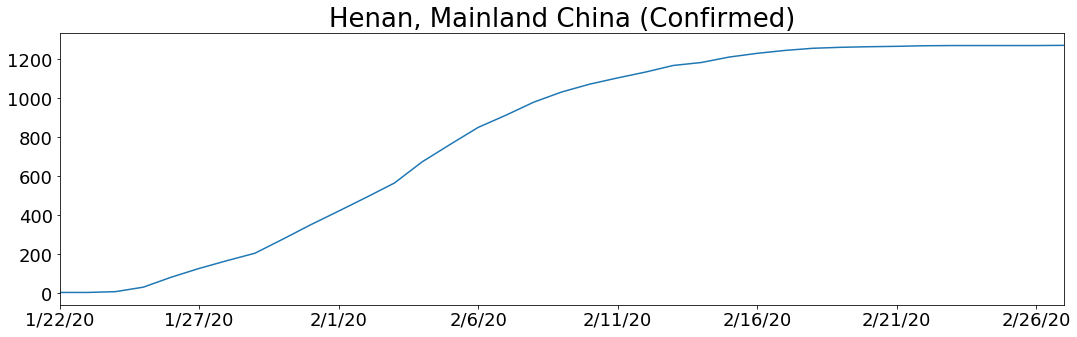

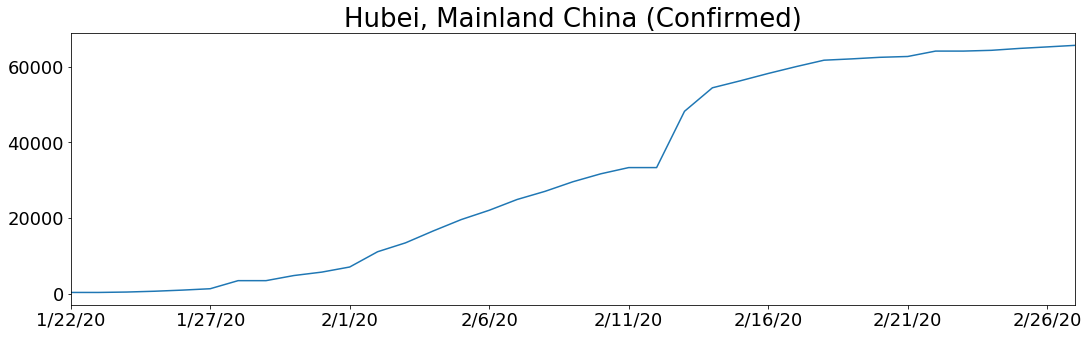

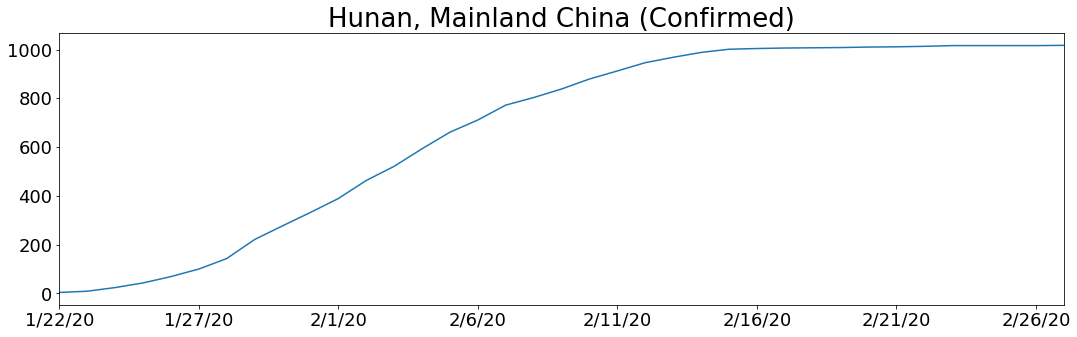

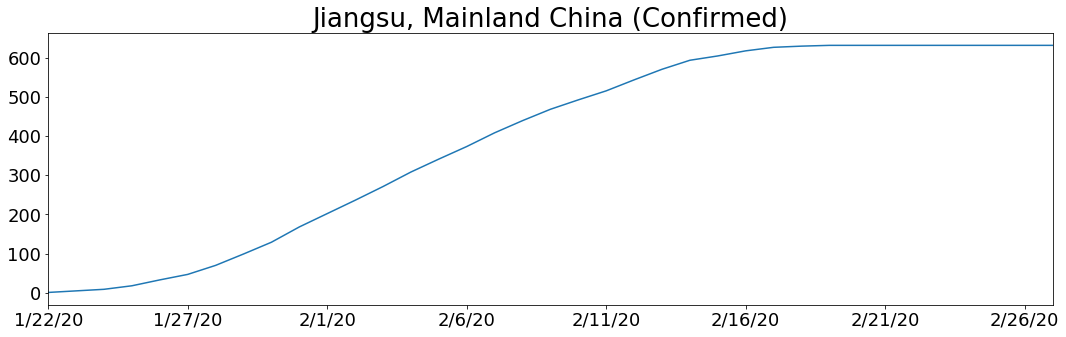

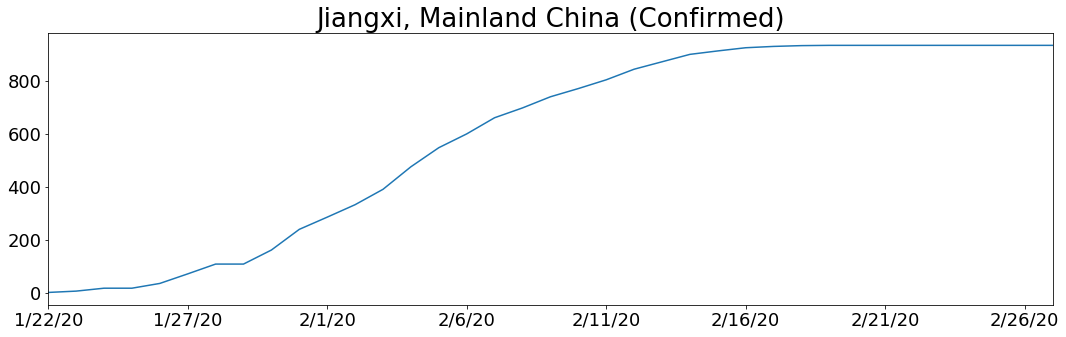

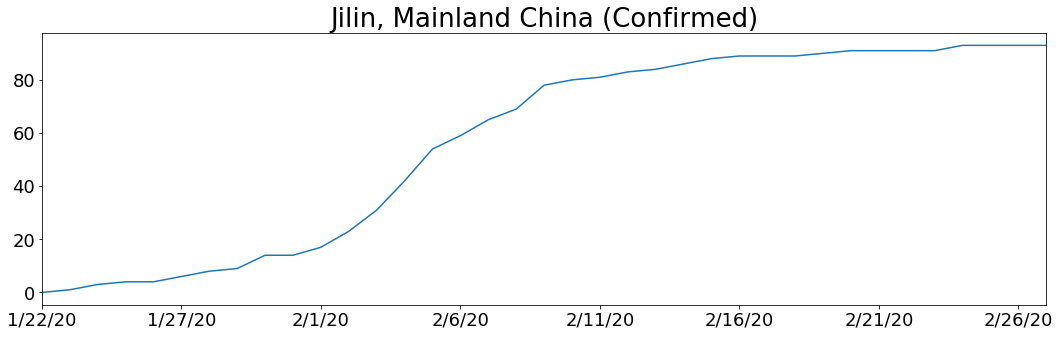

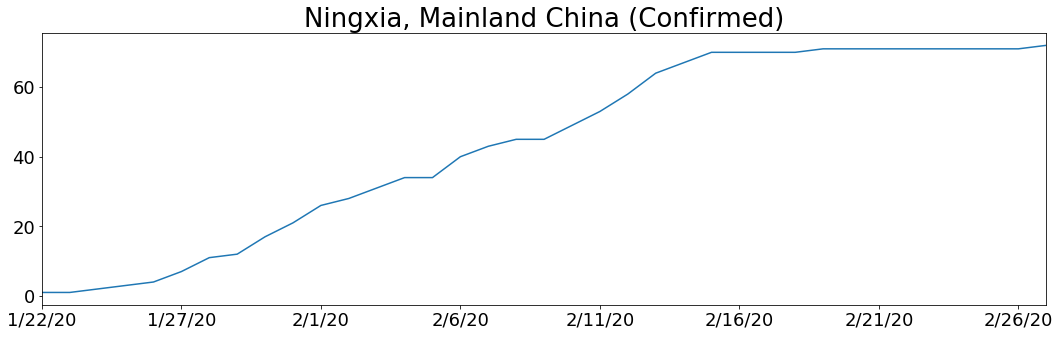

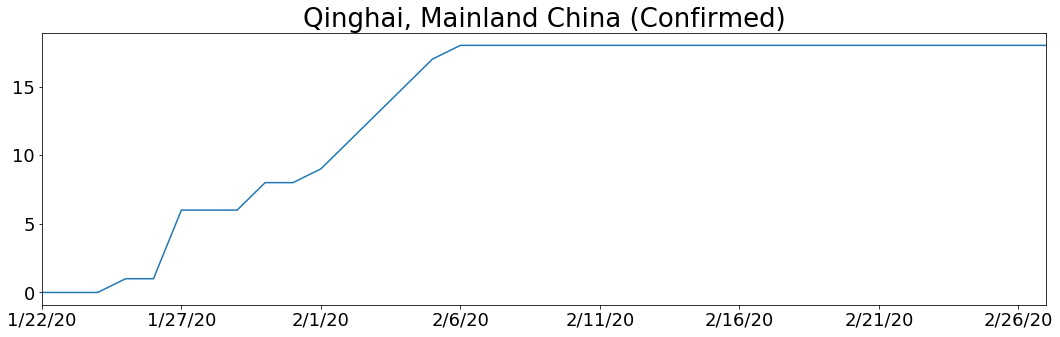

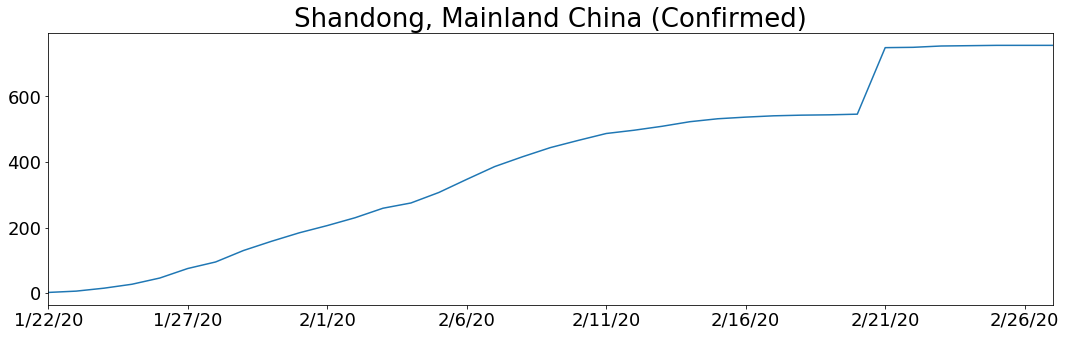

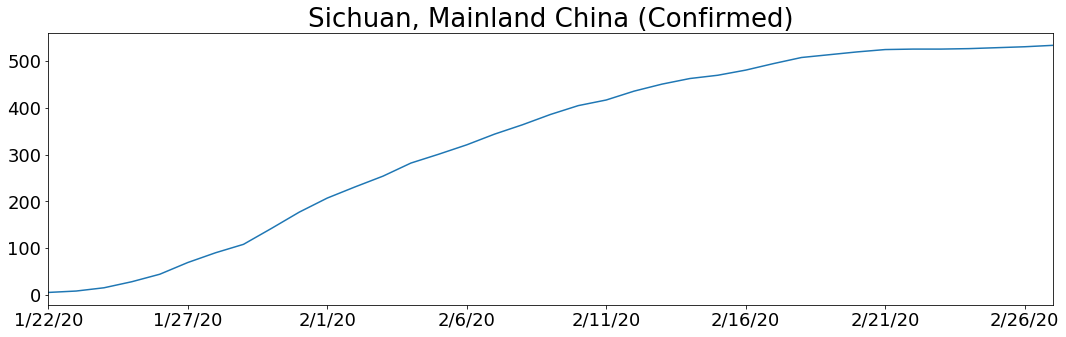

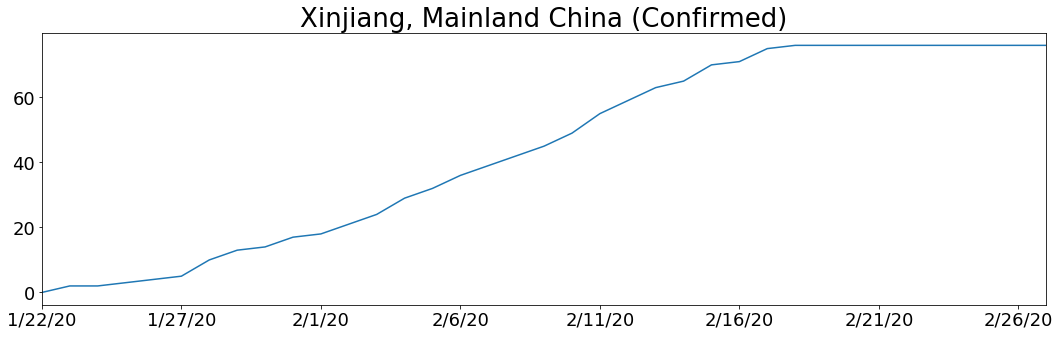

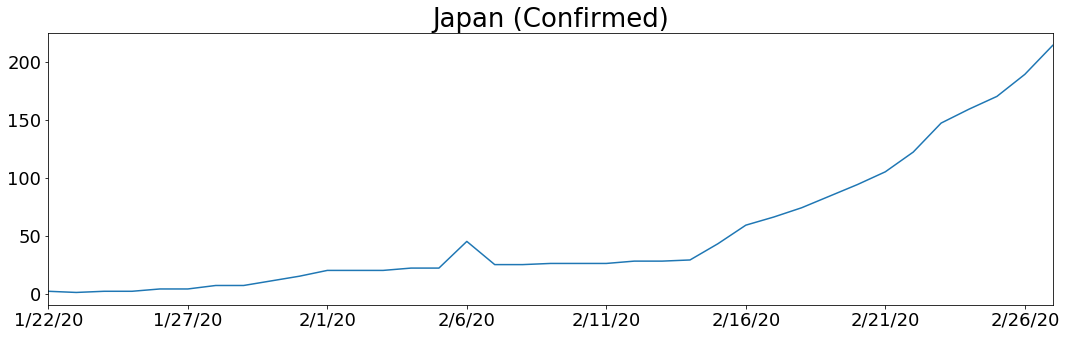

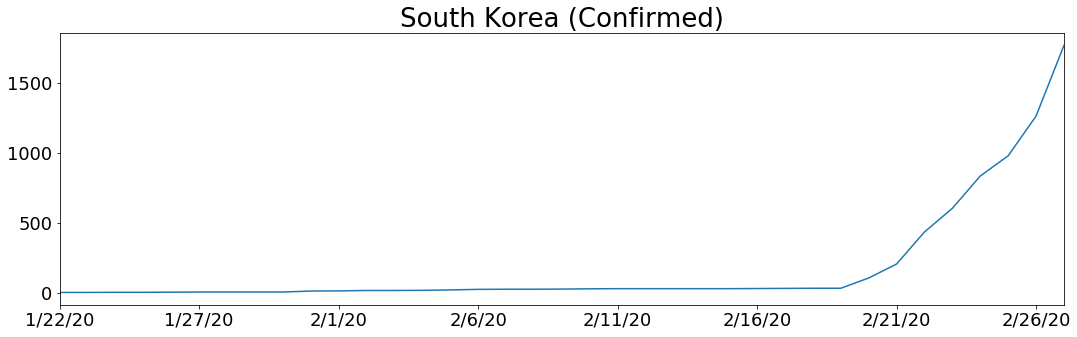

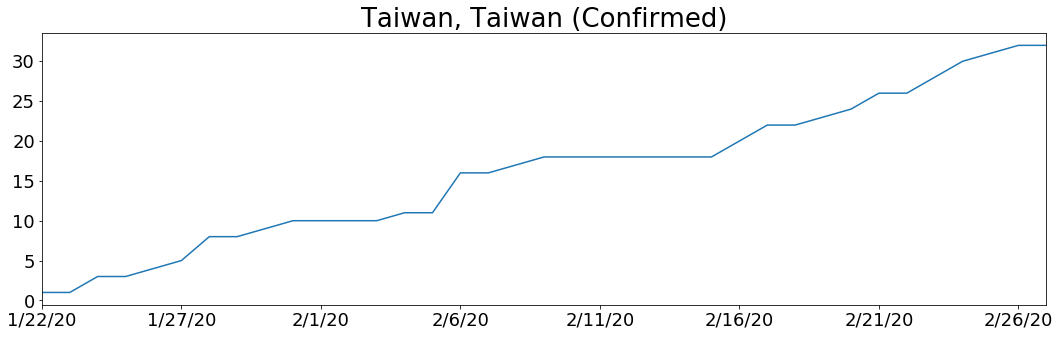

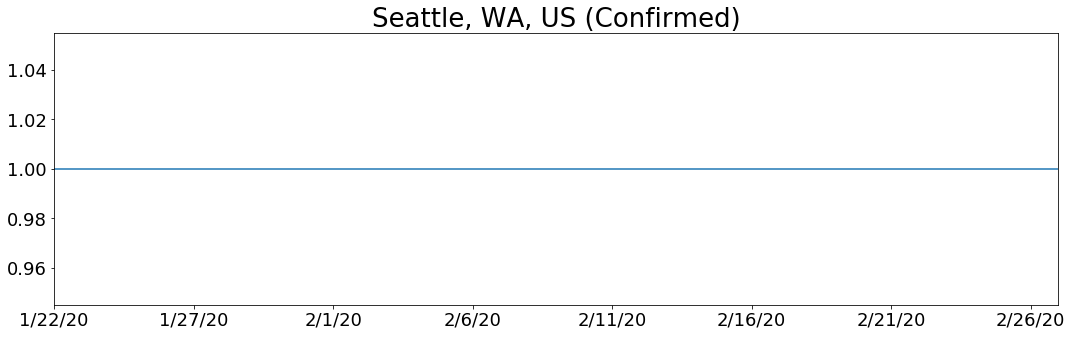

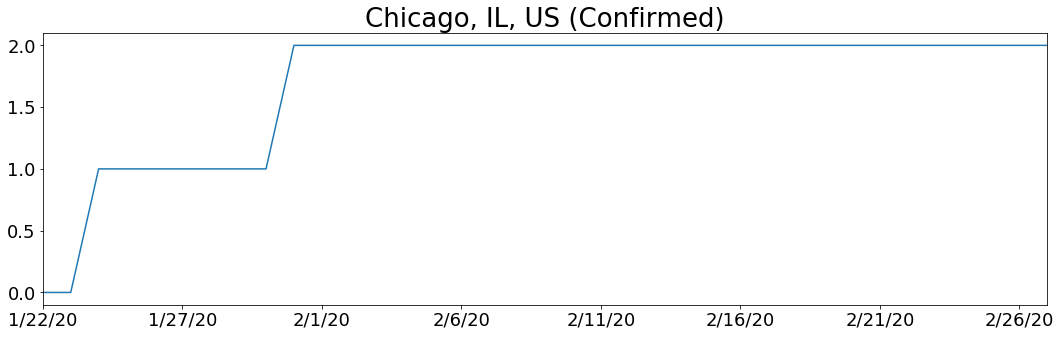

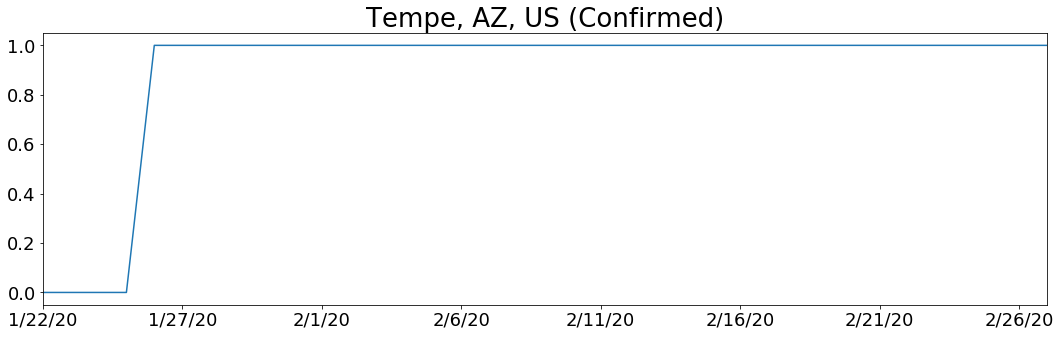

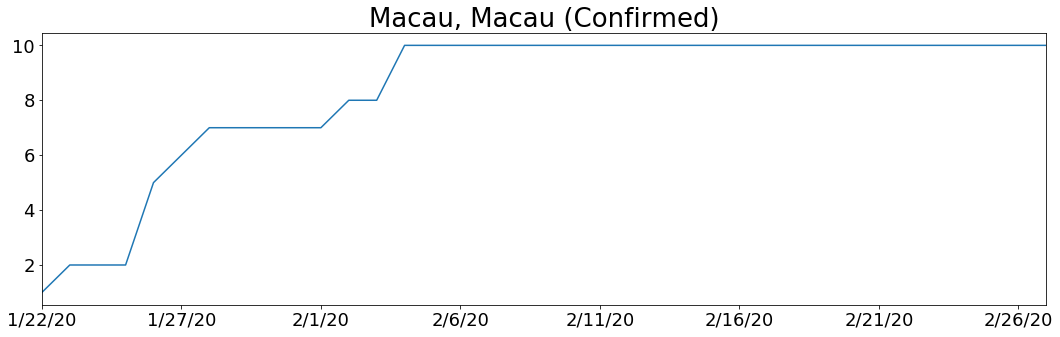

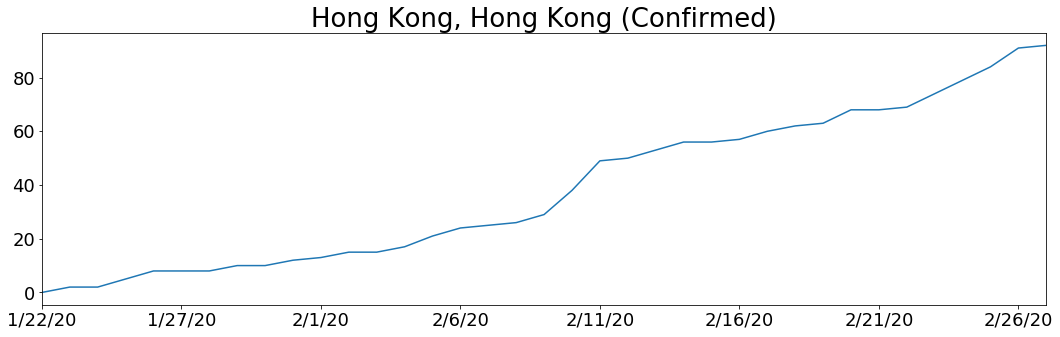

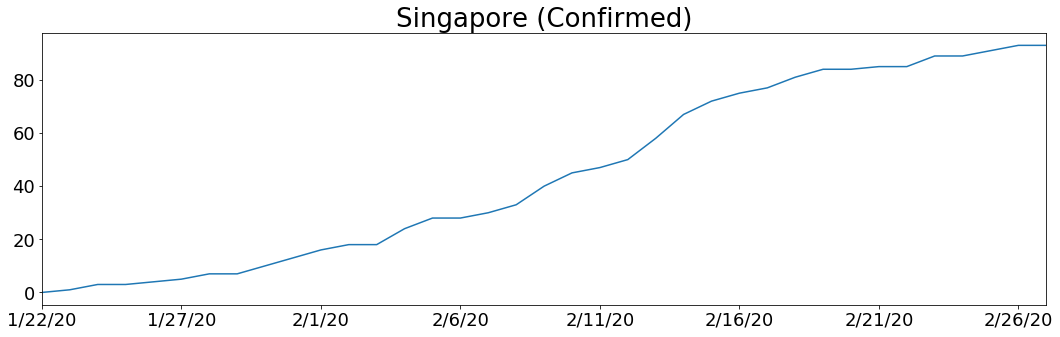

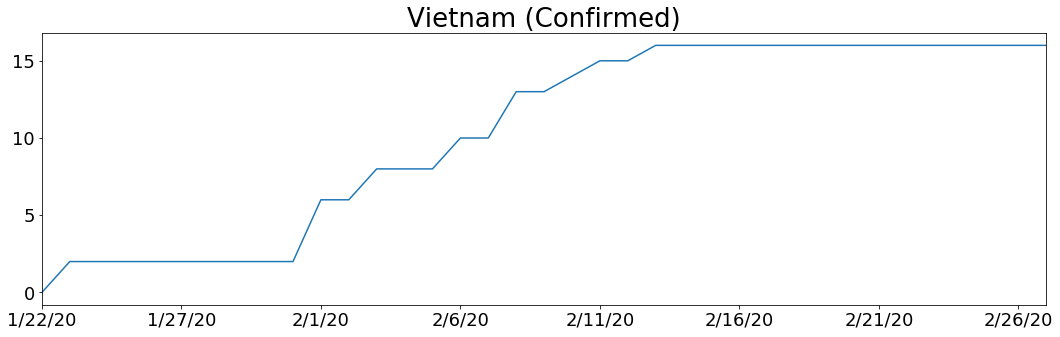

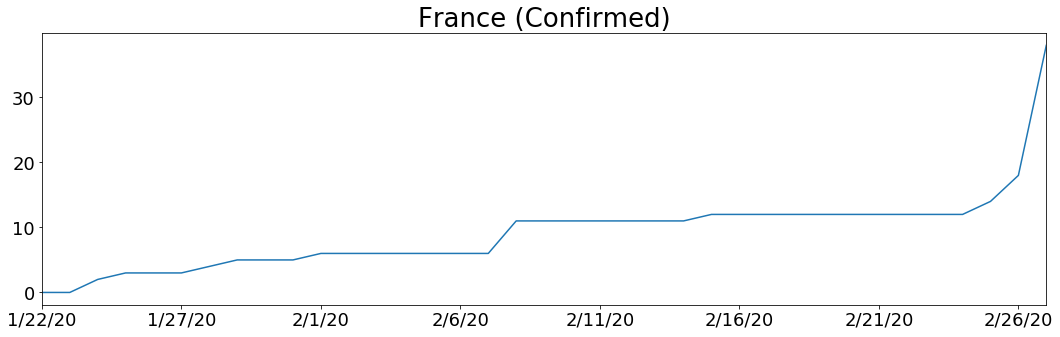

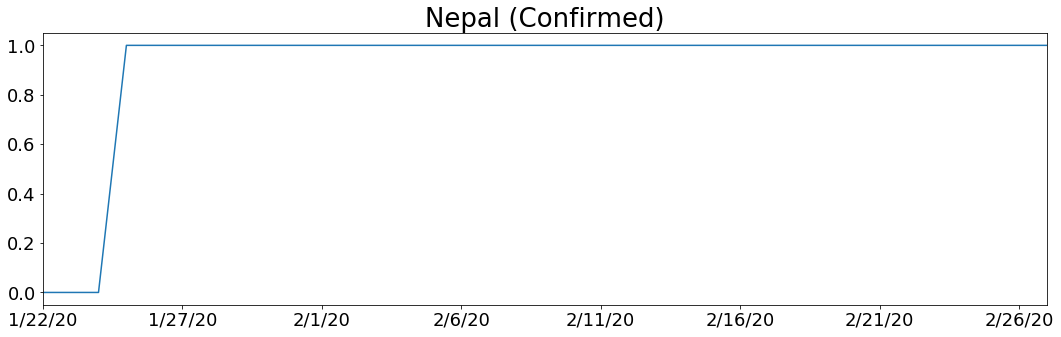

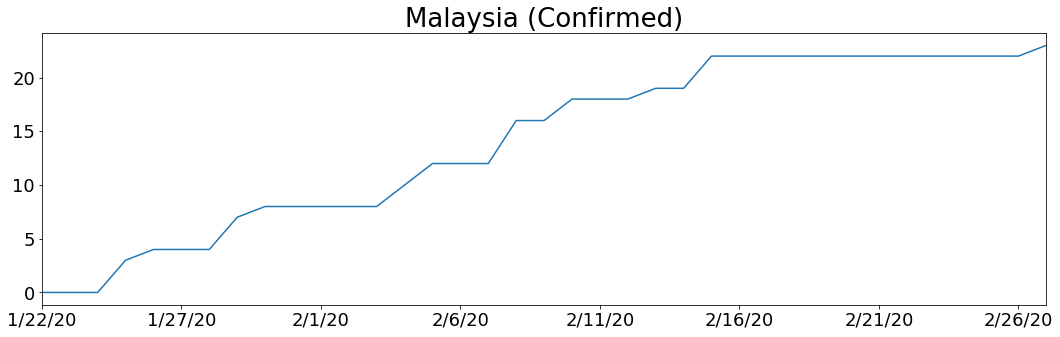

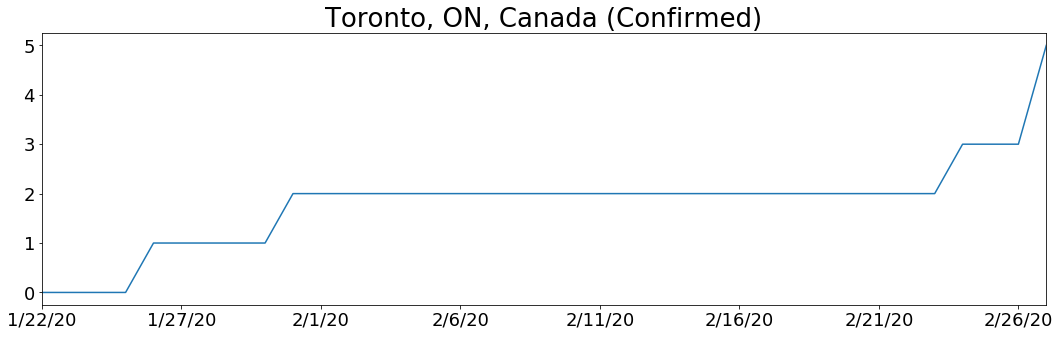

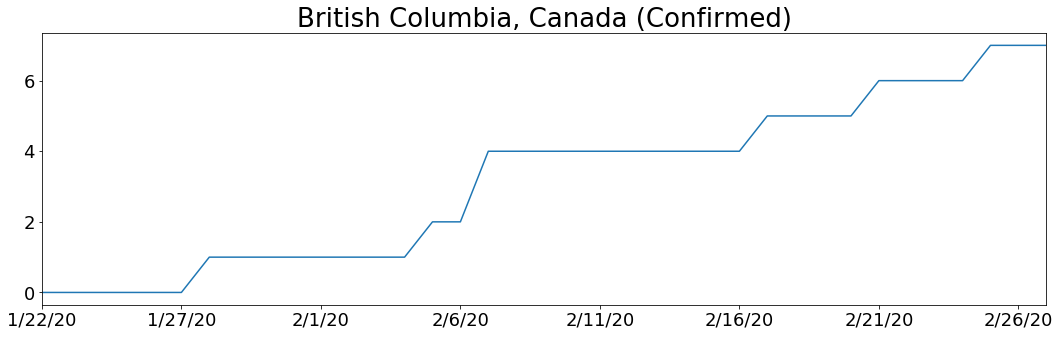

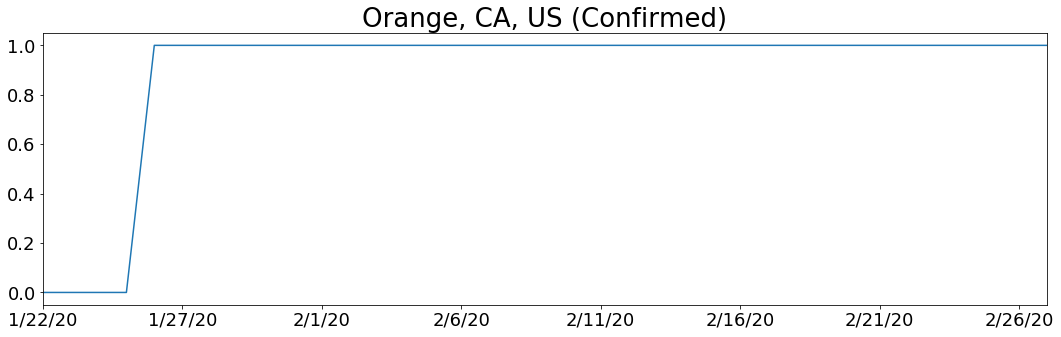

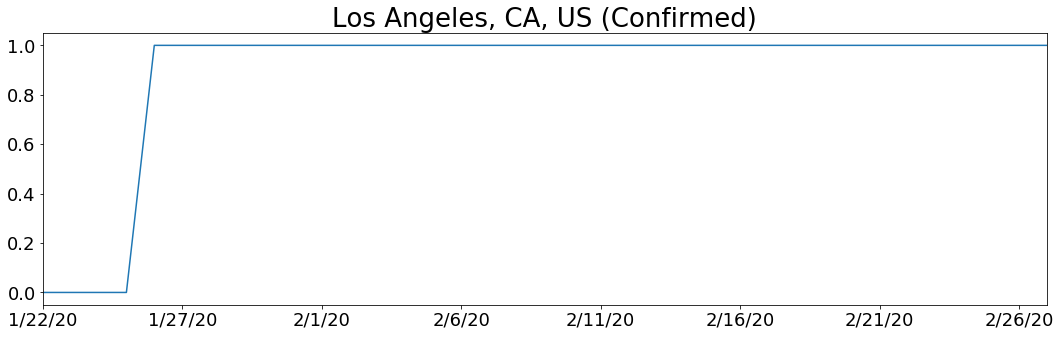

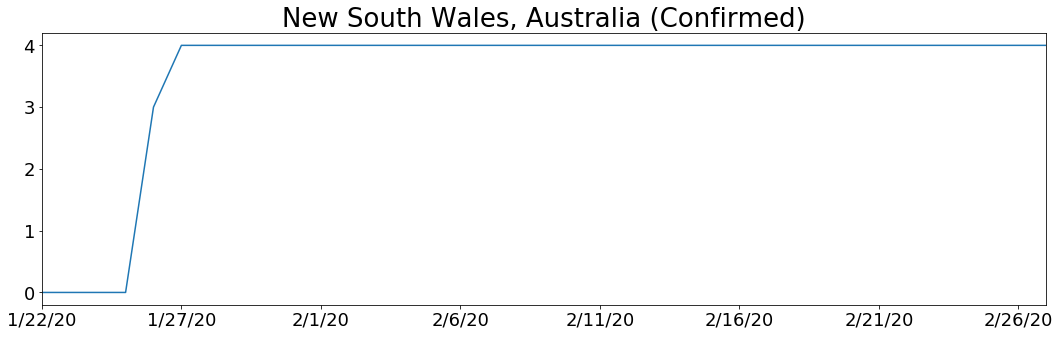

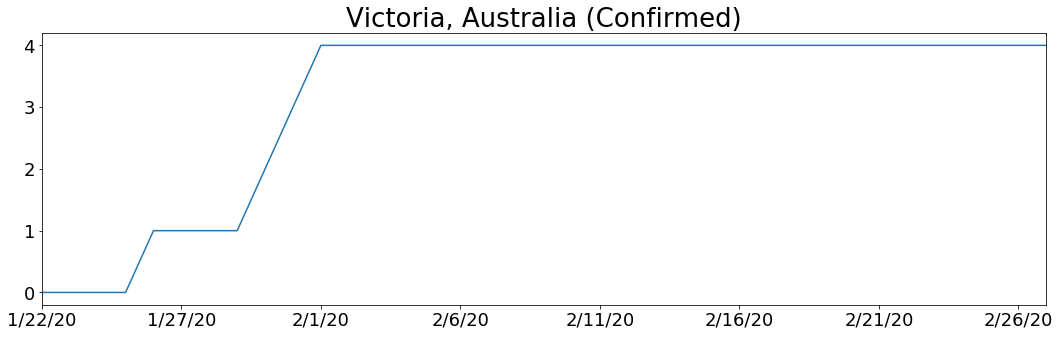

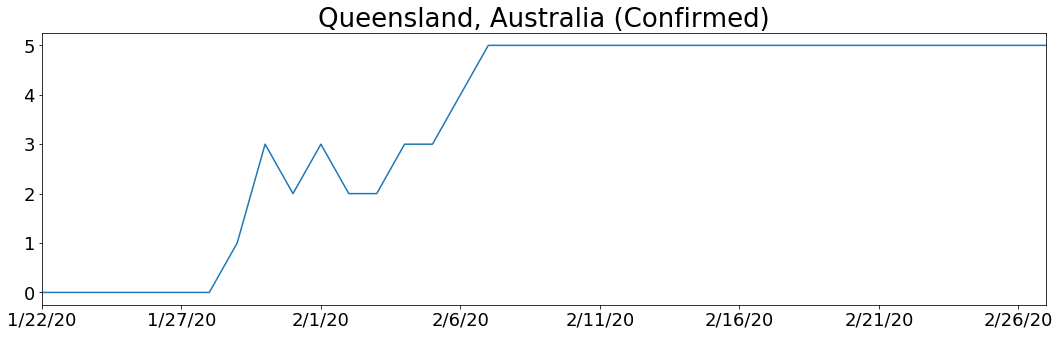

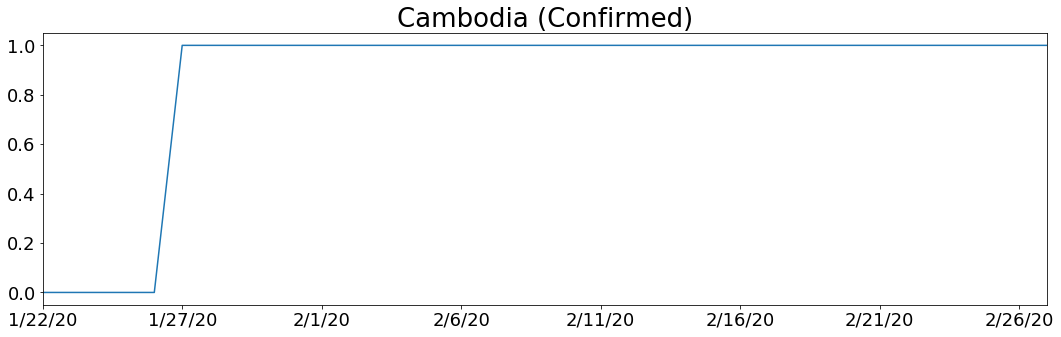

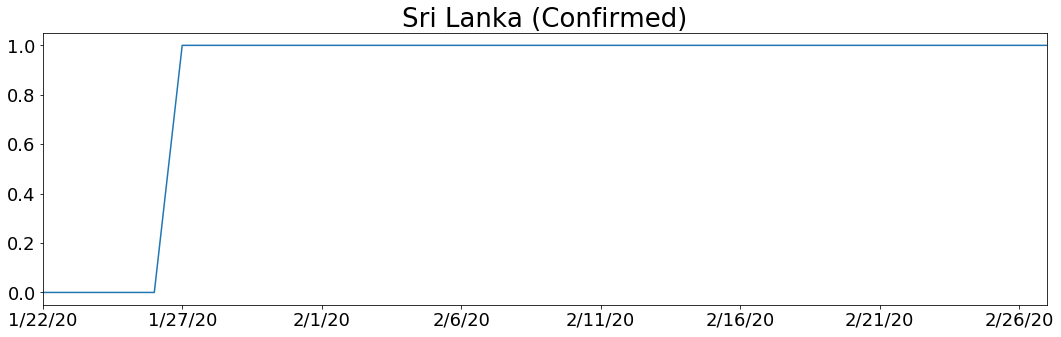

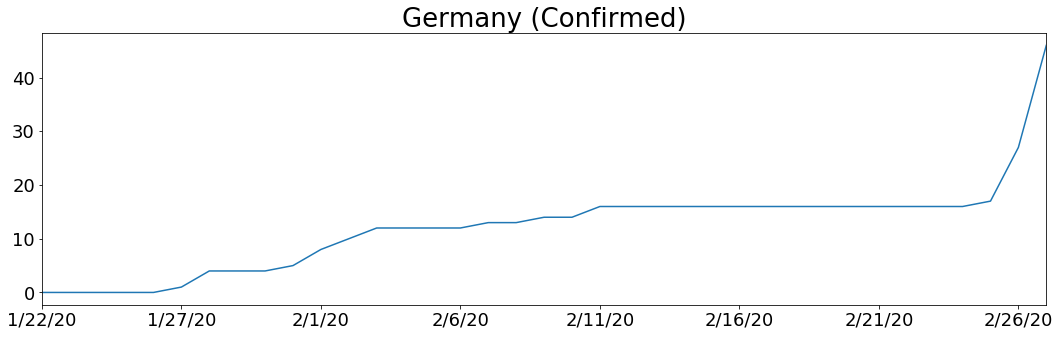

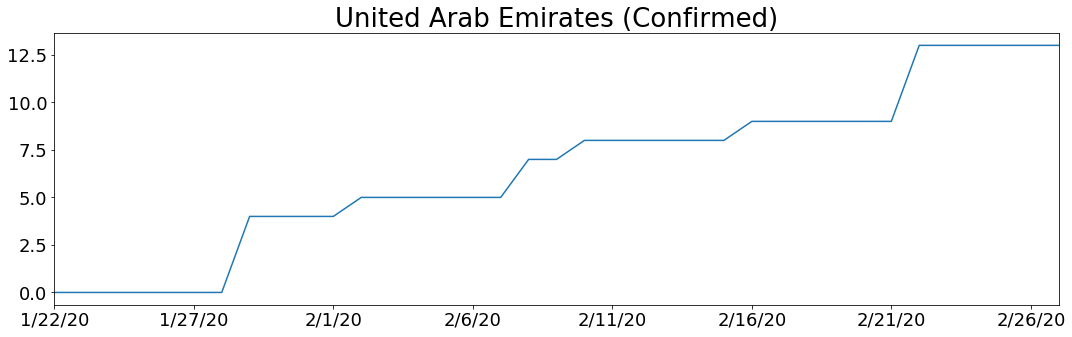

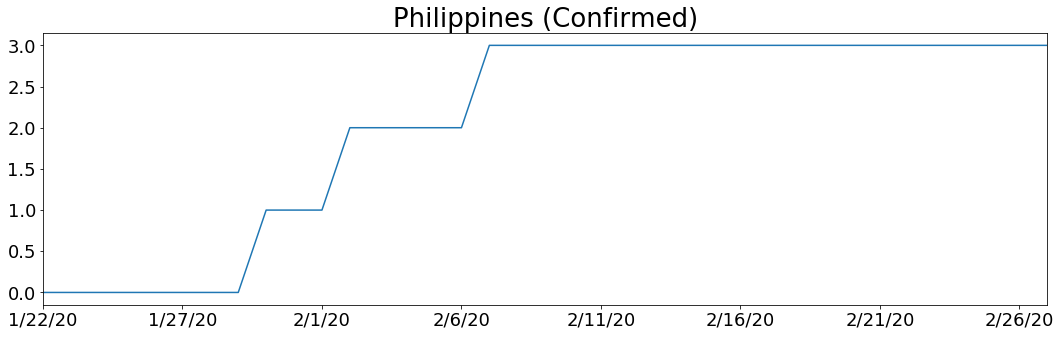

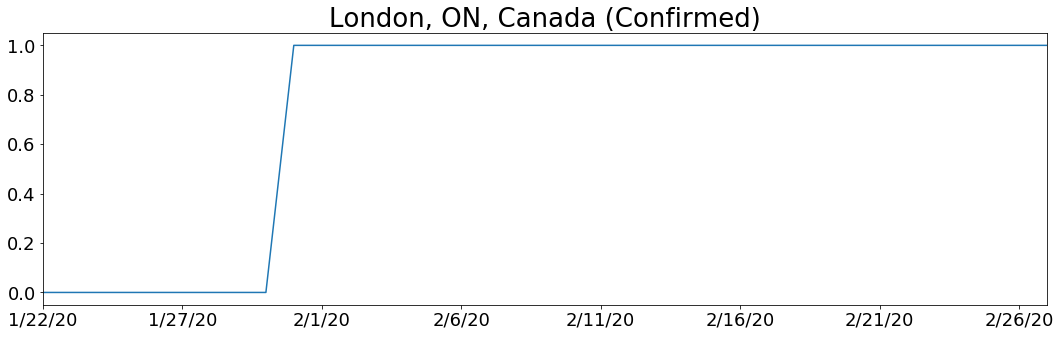

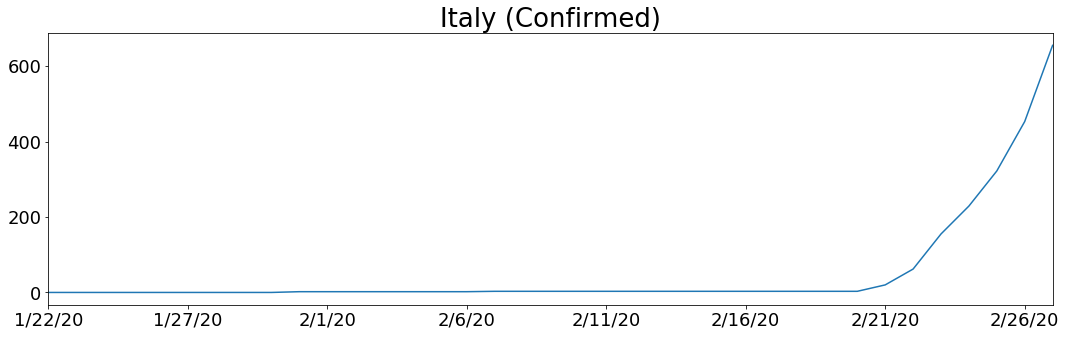

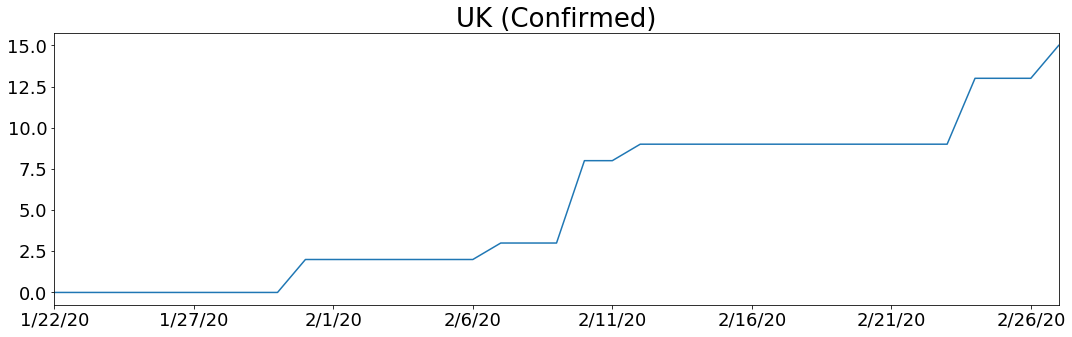

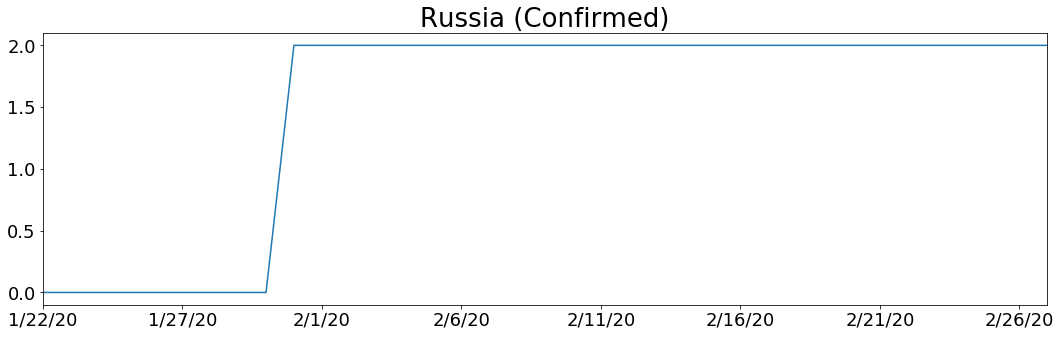

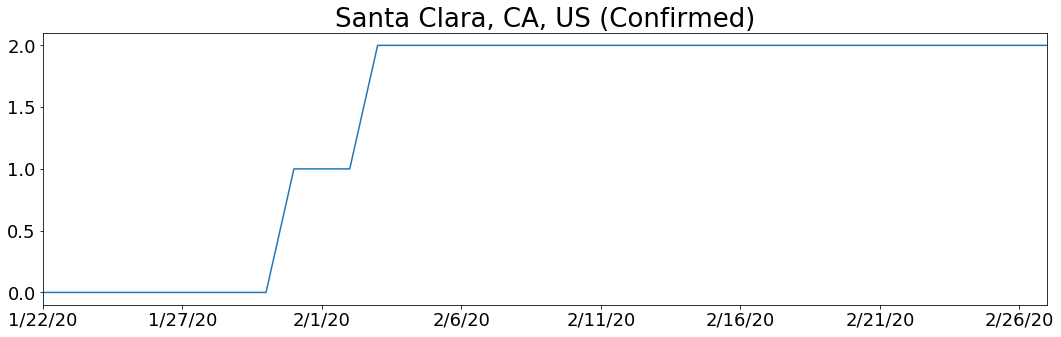

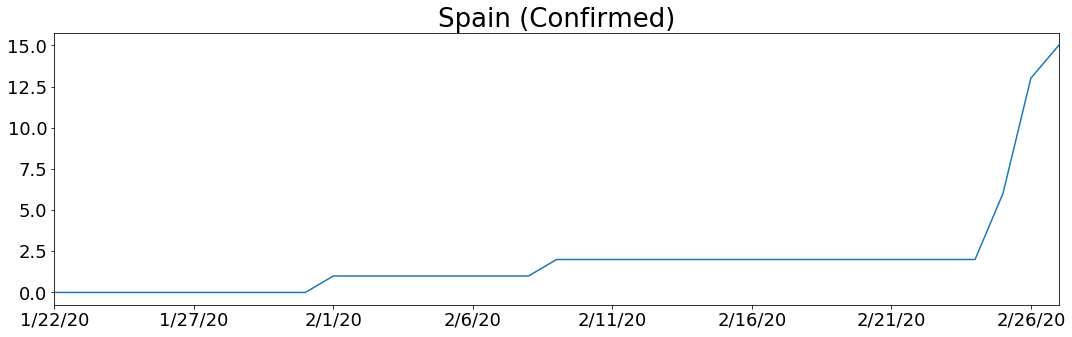

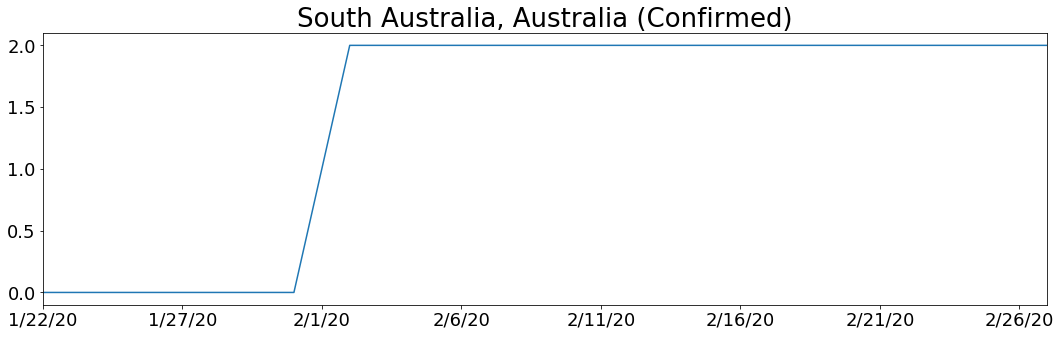

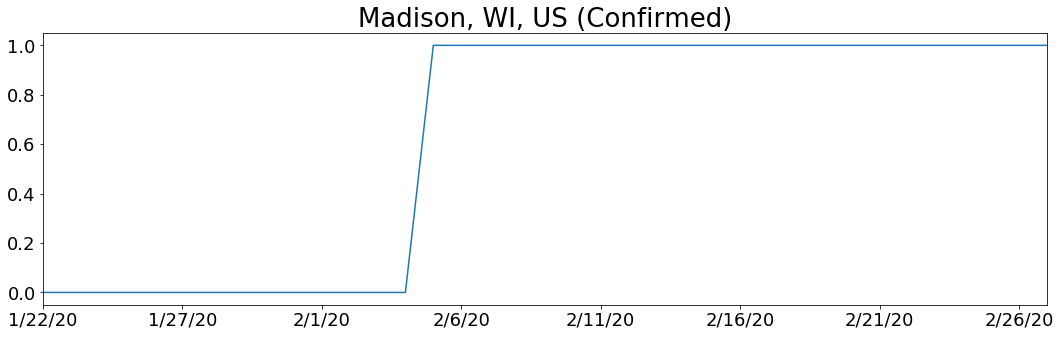

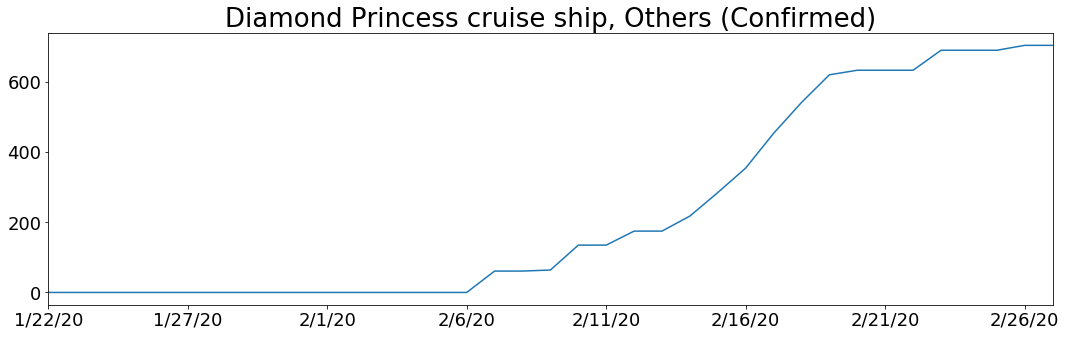

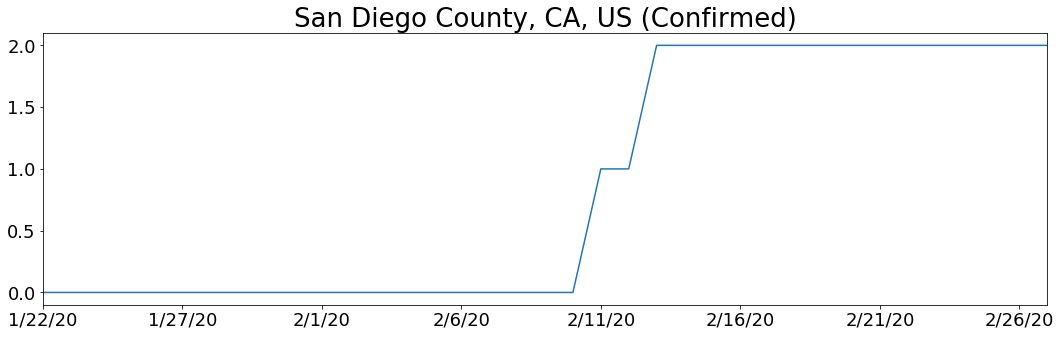

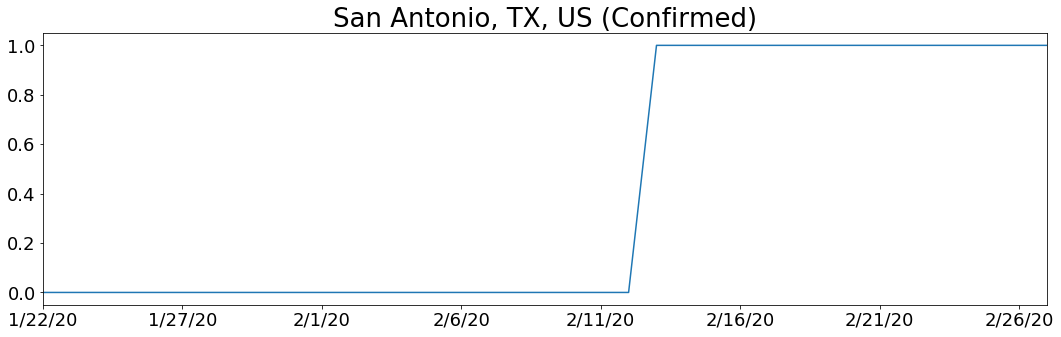

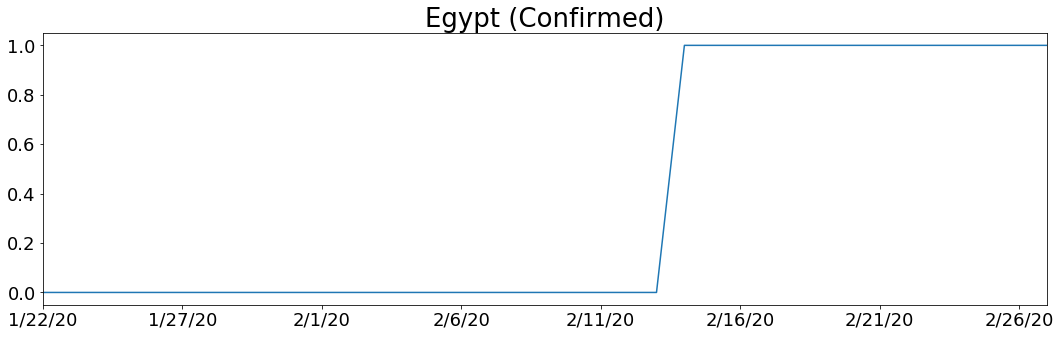

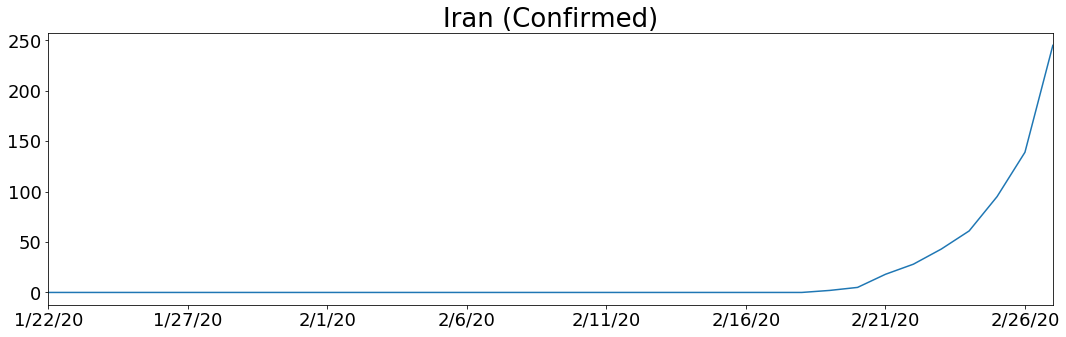

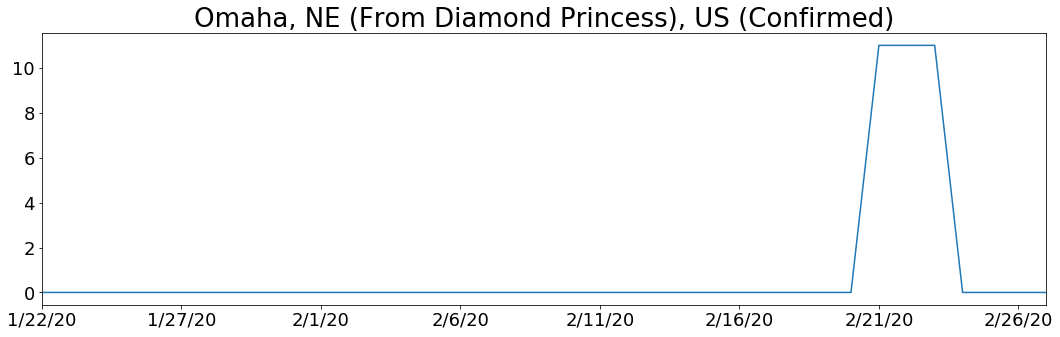

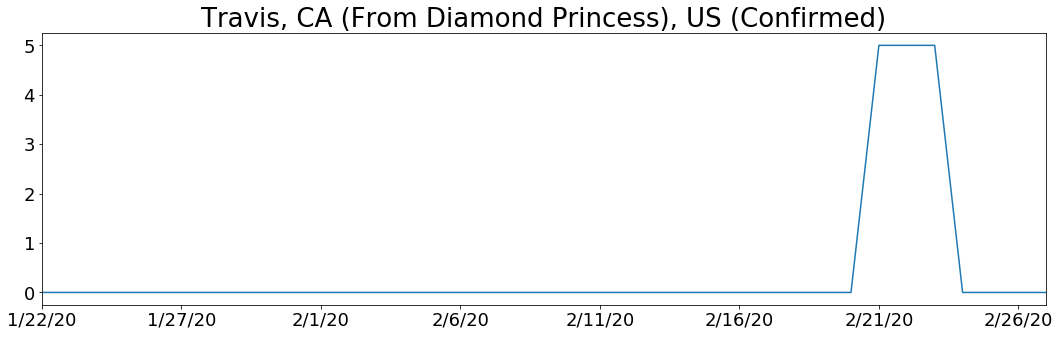

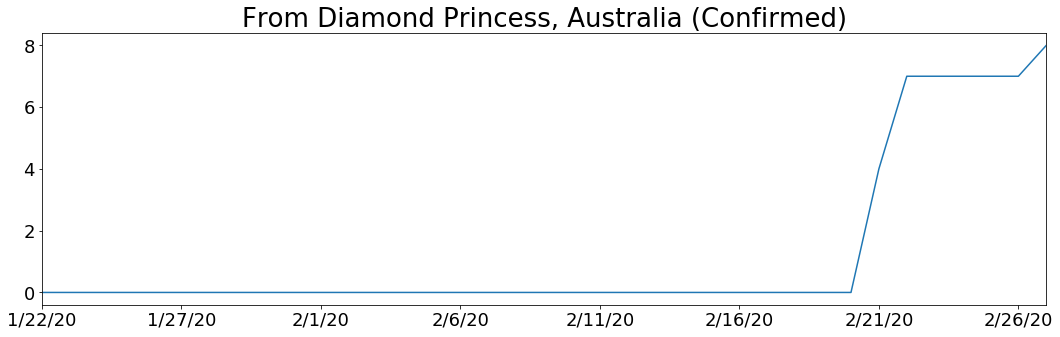

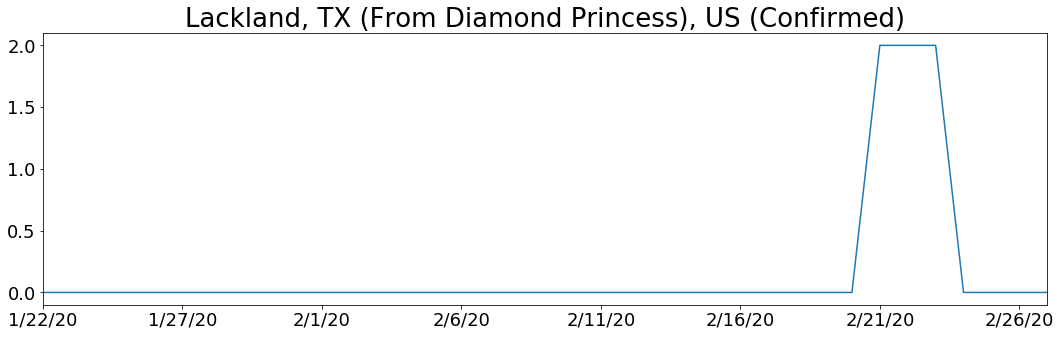

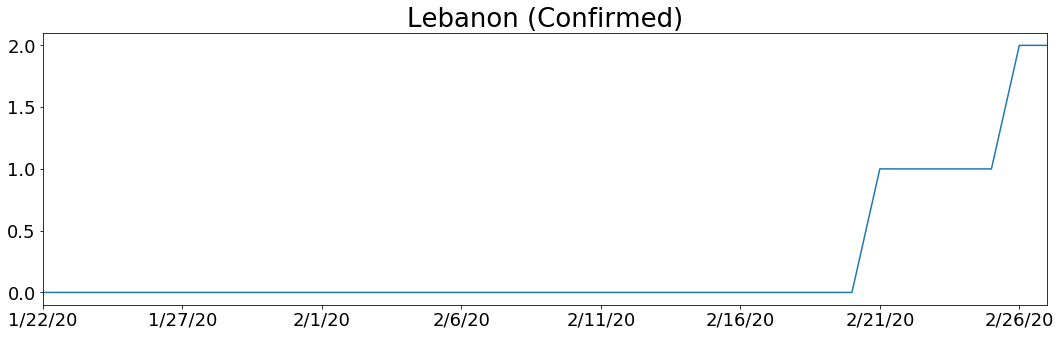

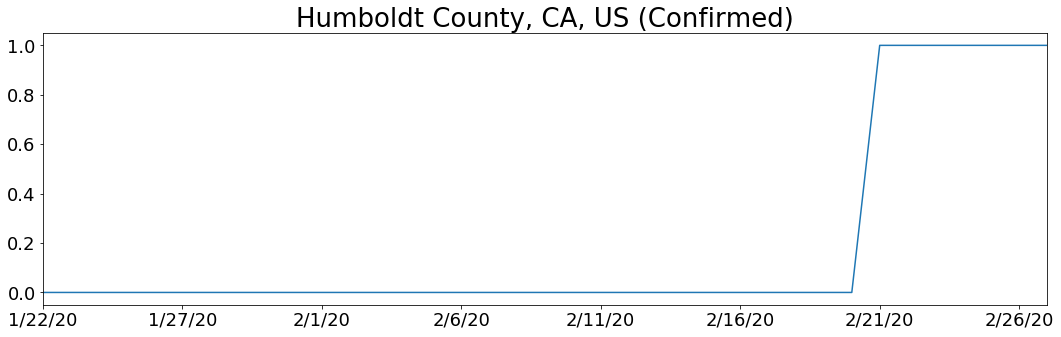

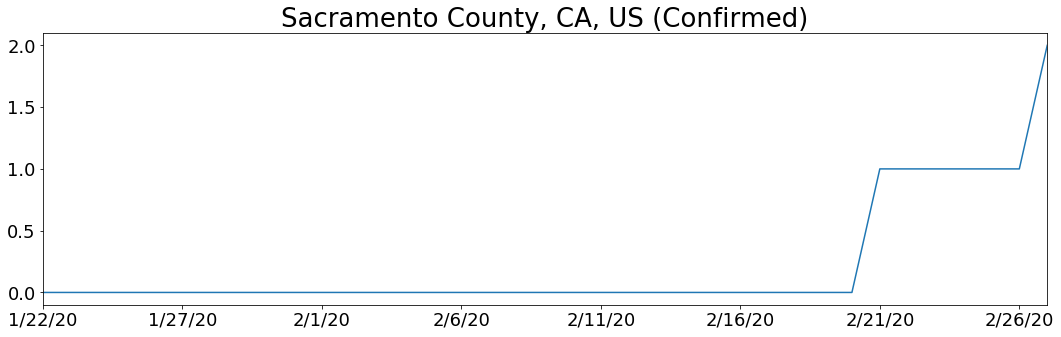

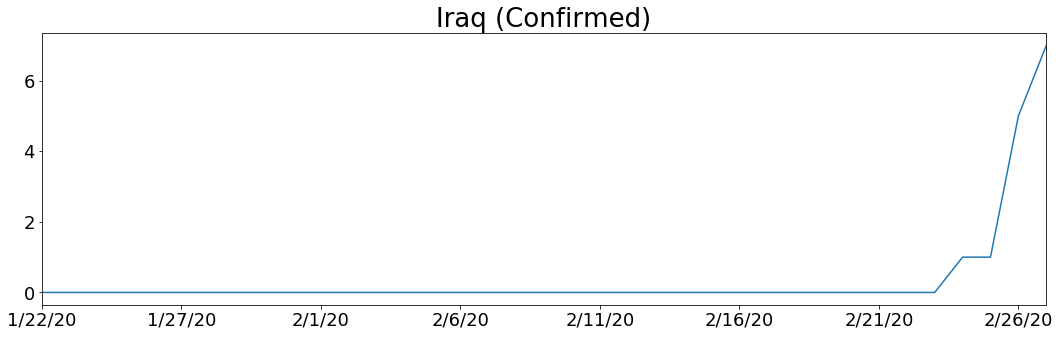

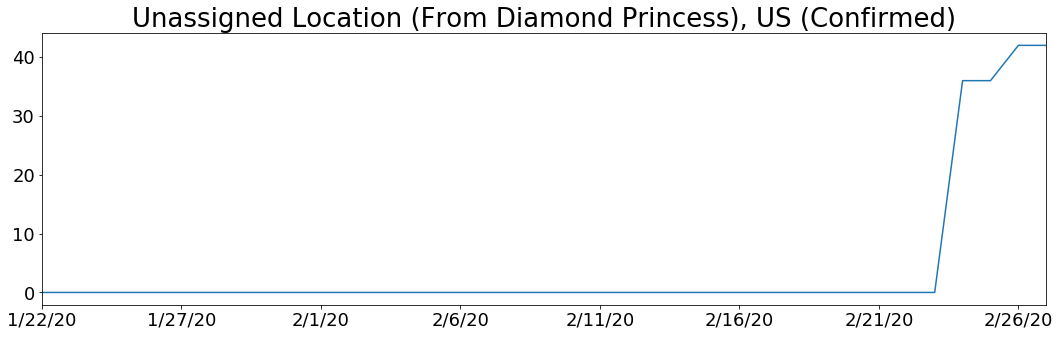

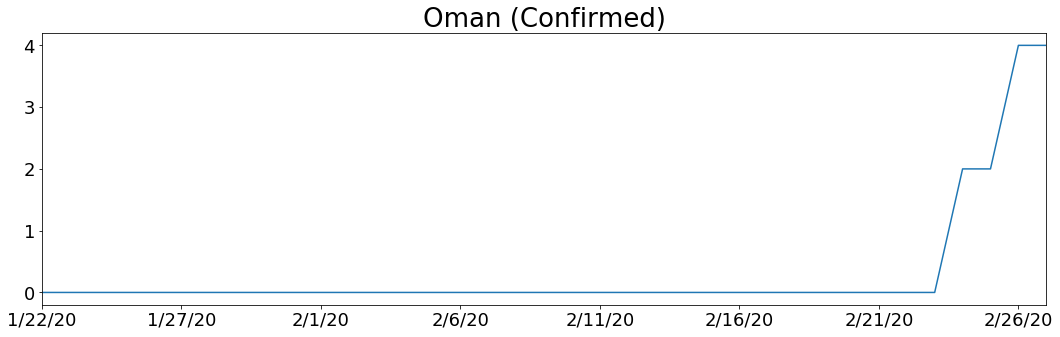

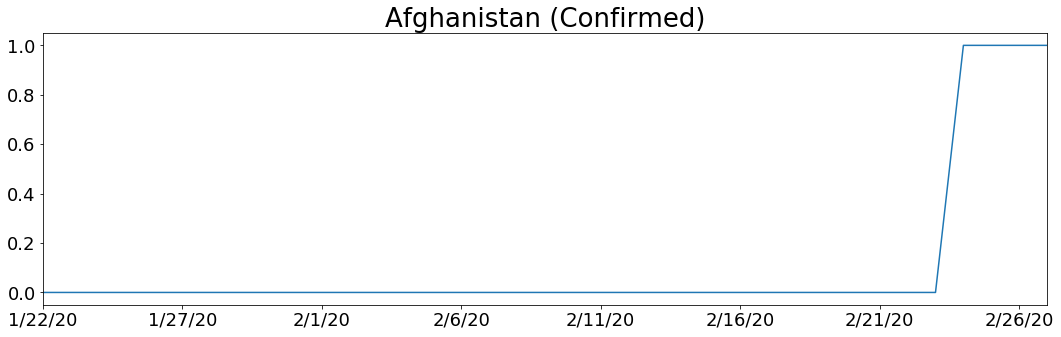

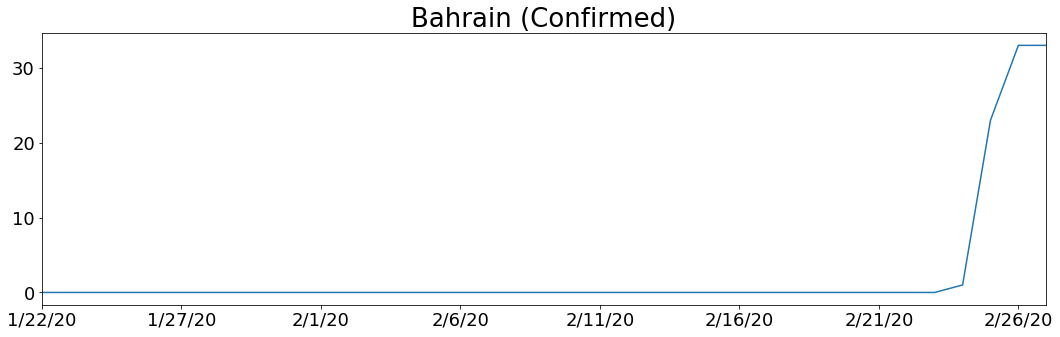

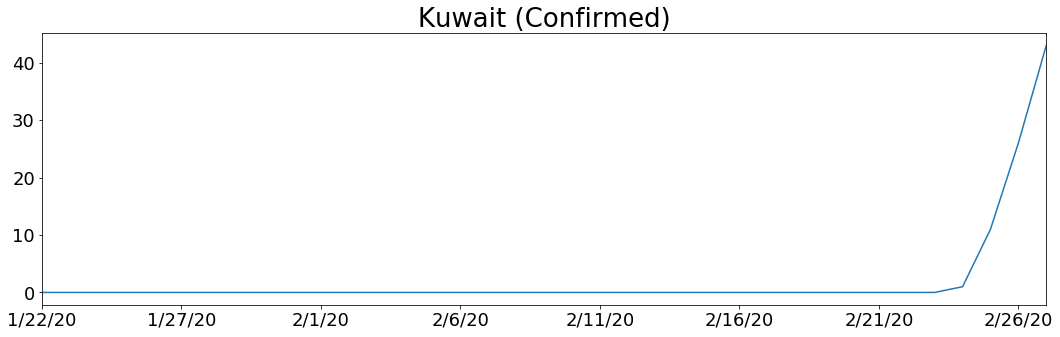

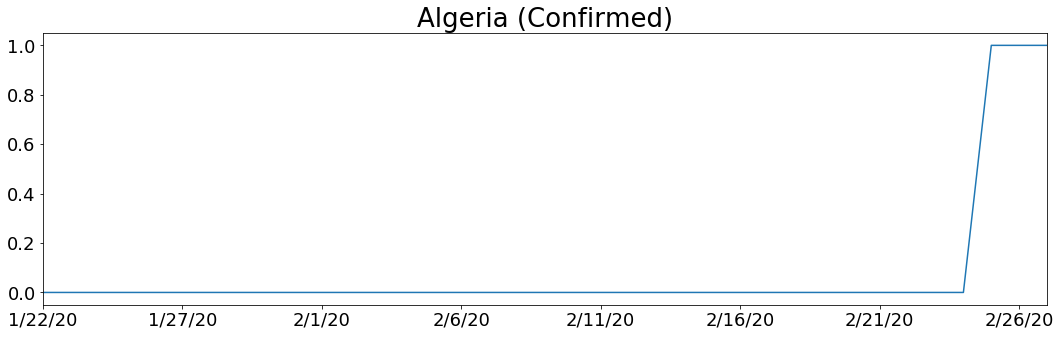

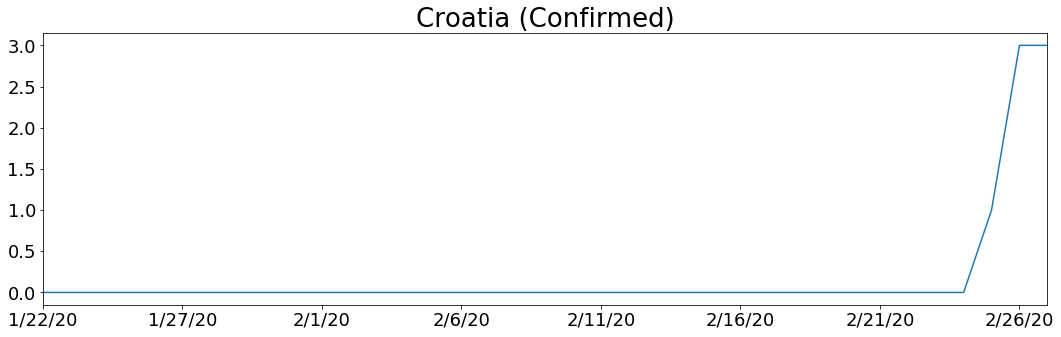

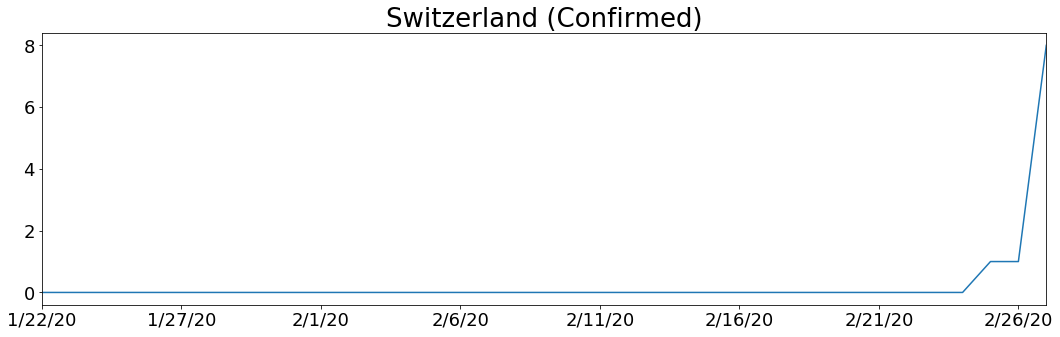

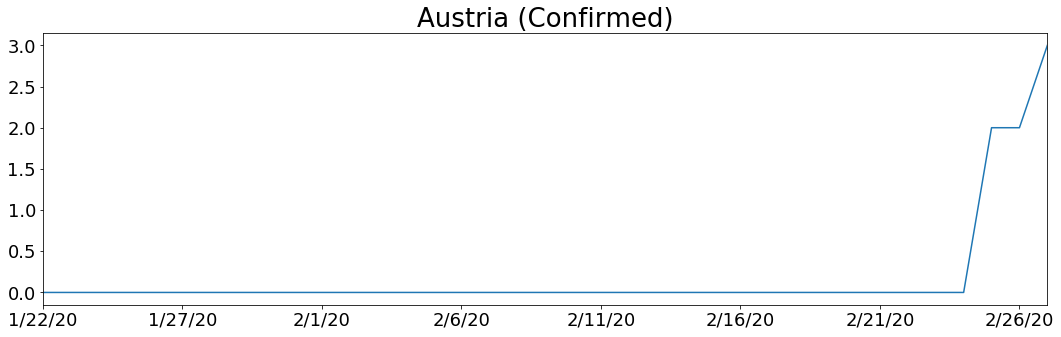

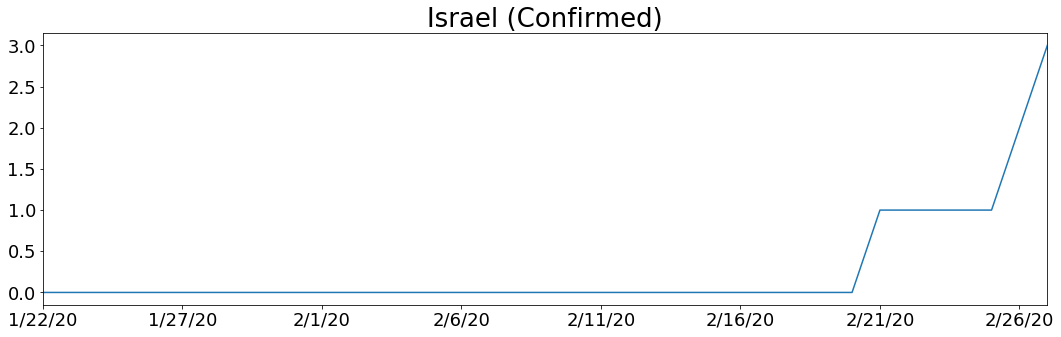

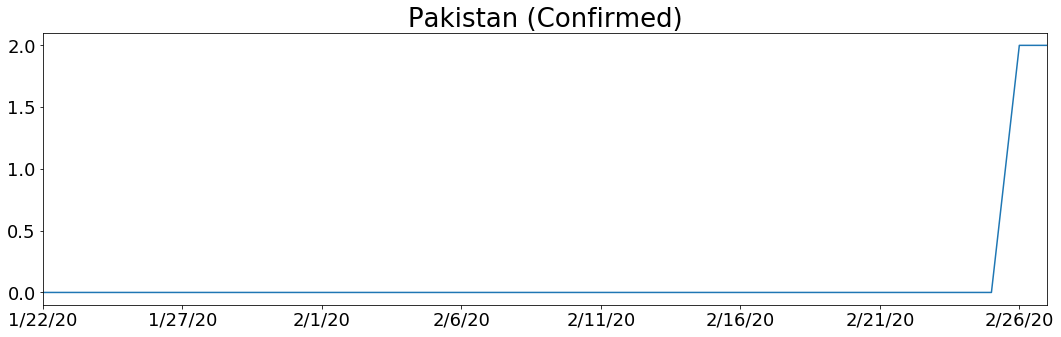

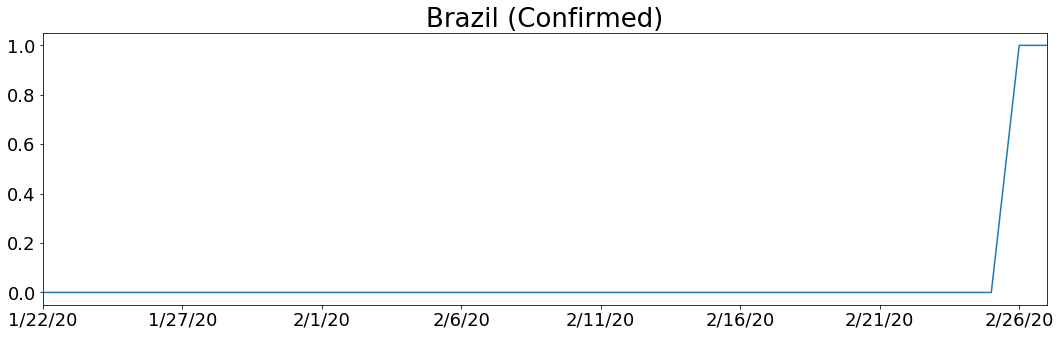

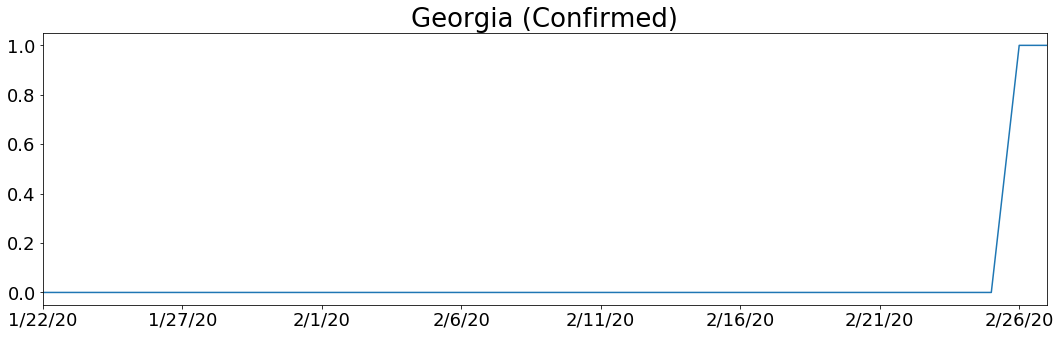

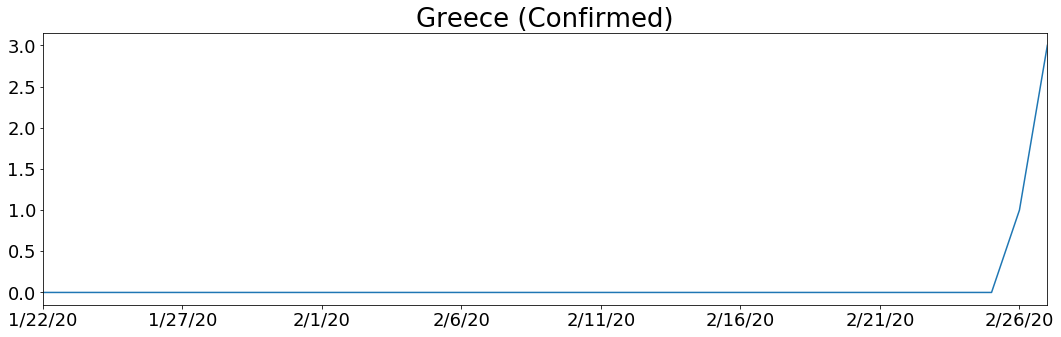

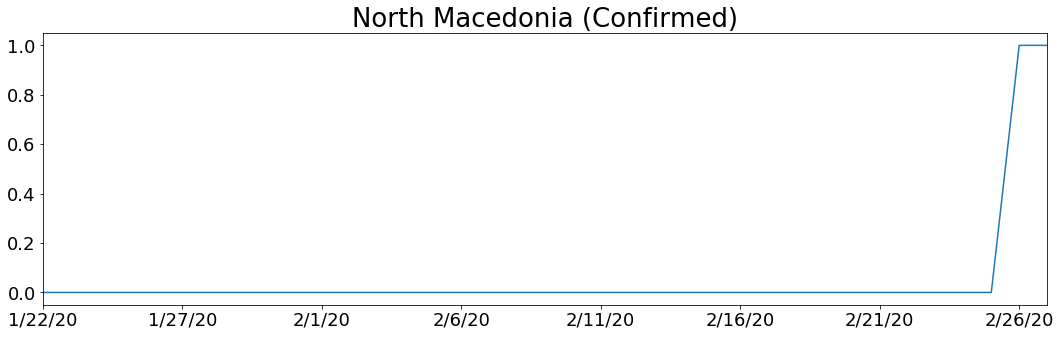

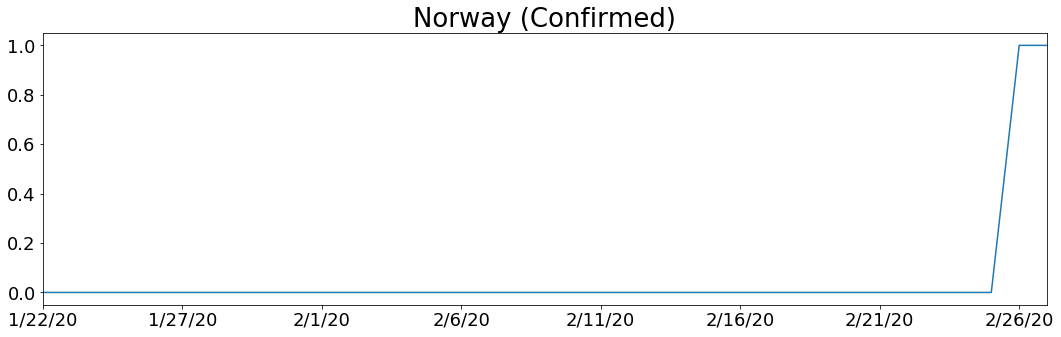

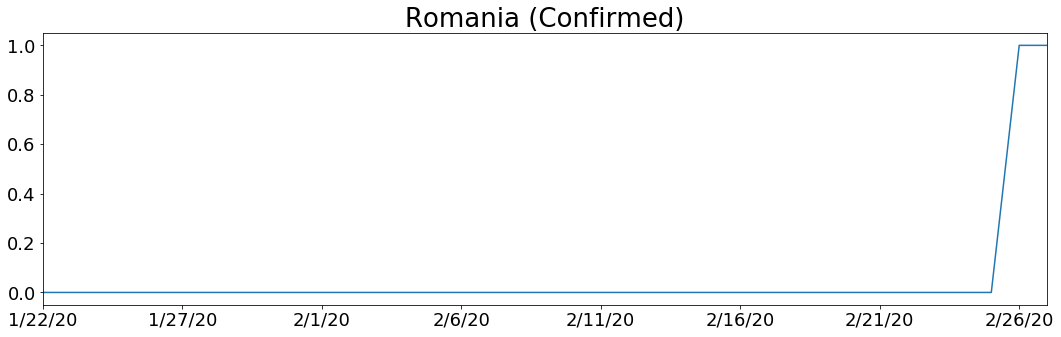

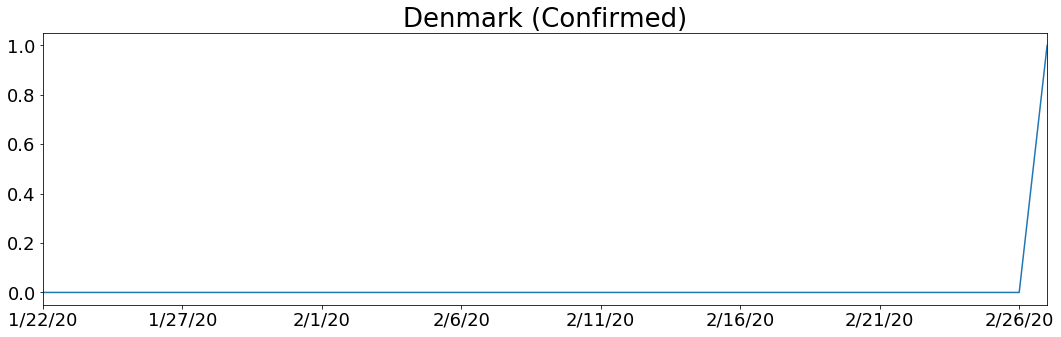

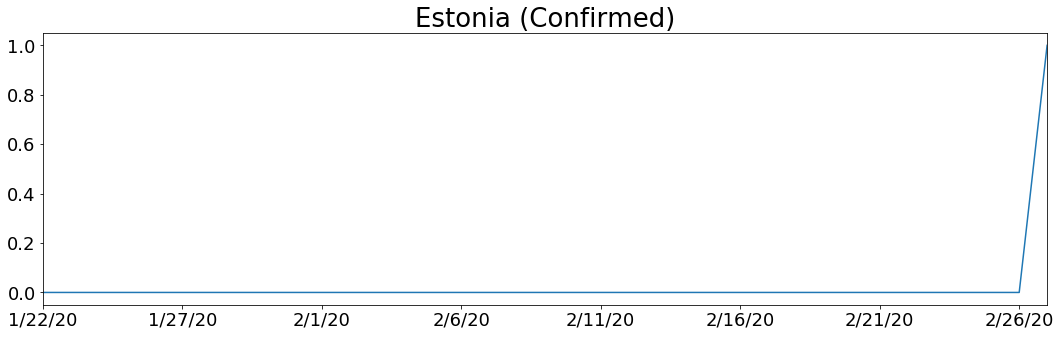

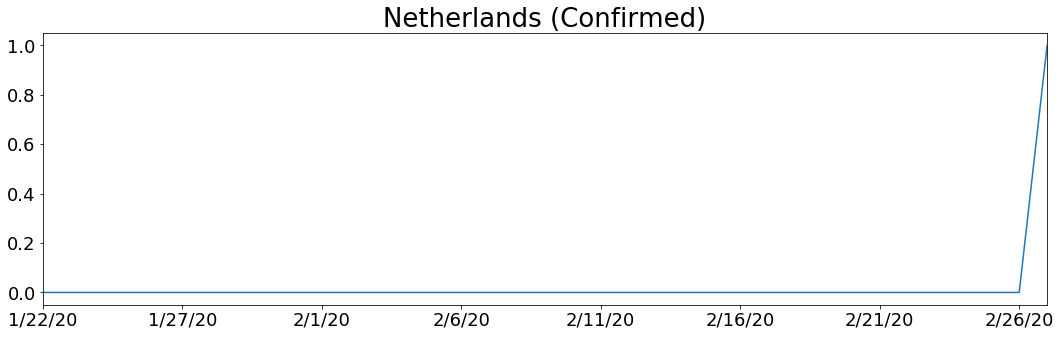

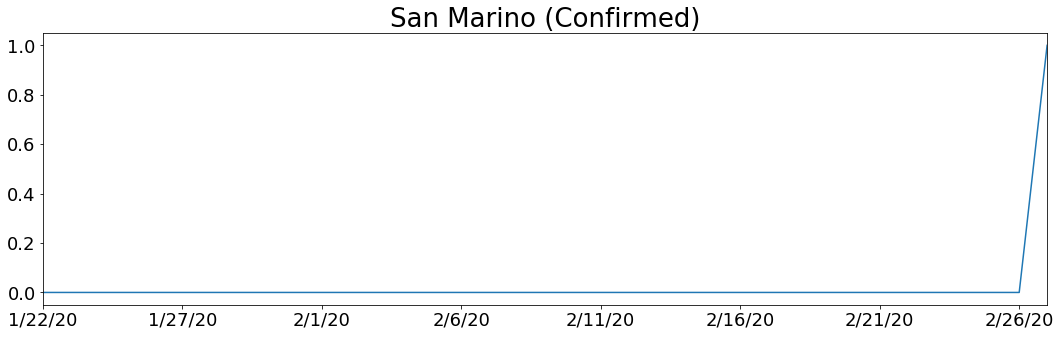

In [22]:
ticksize = 18
titlesize = ticksize + 8
labelsize = ticksize + 5

figsize = (18, 5)
params = {'figure.figsize' : figsize,
          'axes.labelsize' : labelsize,
          'axes.titlesize' : titlesize,
          'xtick.labelsize': ticksize,
          'ytick.labelsize': ticksize}

plt.rcParams.update(params)

title = "Total Number of Confirmed by Date"
for index, row in time_series_covid_19_confirmed.iterrows():
    row[data_cols].plot()
    if not row["Province/State"]=="NA":
        plt.title(row["Province/State"] + ", " + row["Country/Region"] + " (Confirmed)")
    else:
        plt.title(row["Country/Region"] + " (Confirmed)")
        
    plt.show()

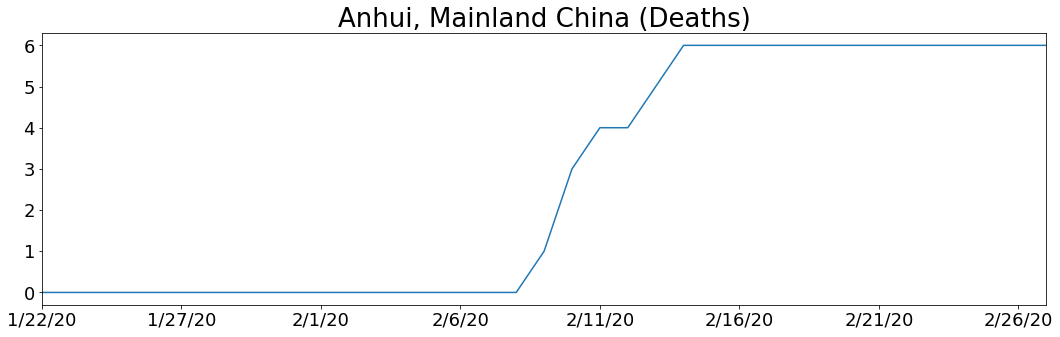

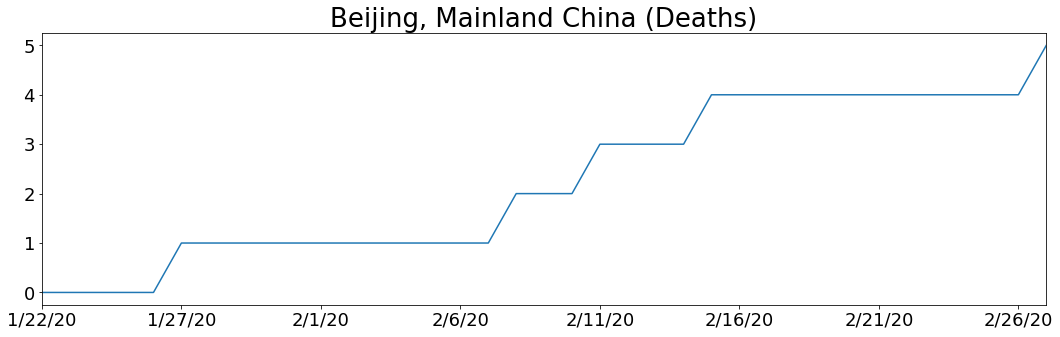

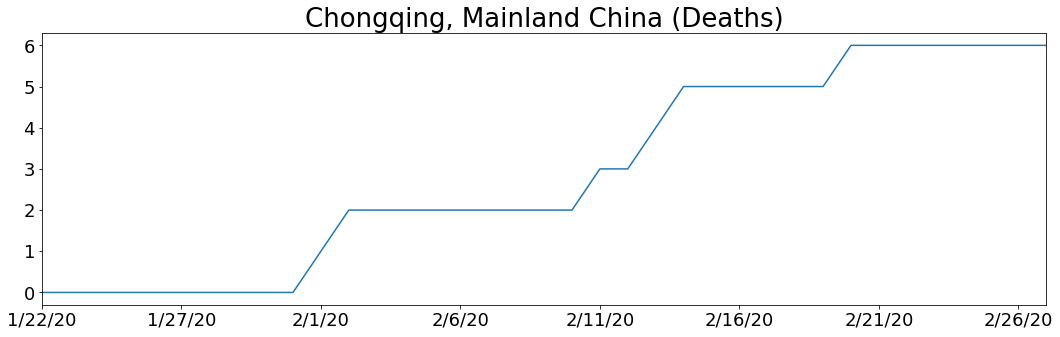

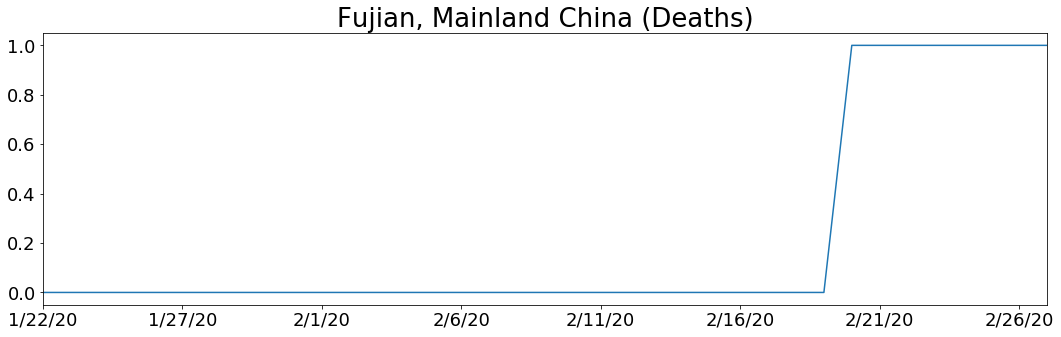

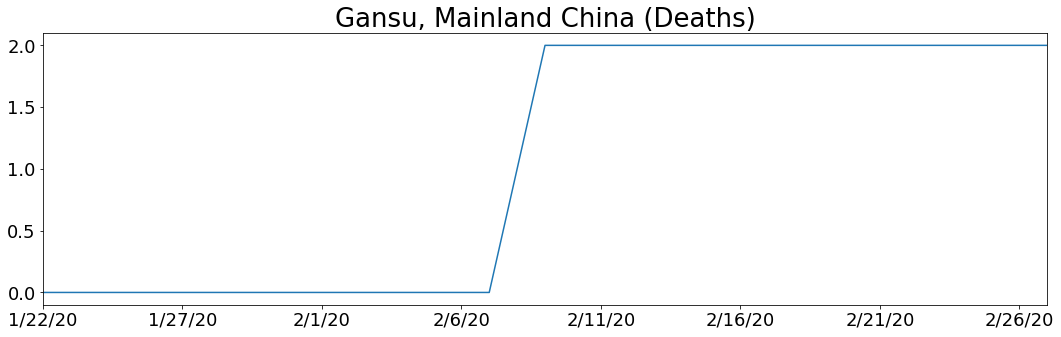

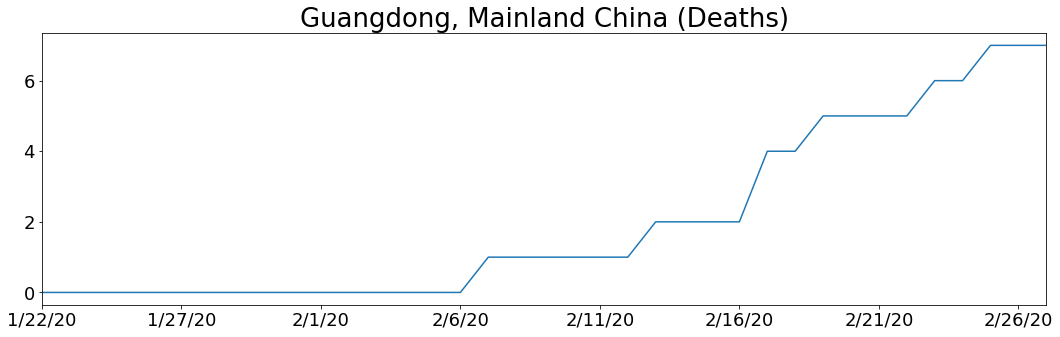

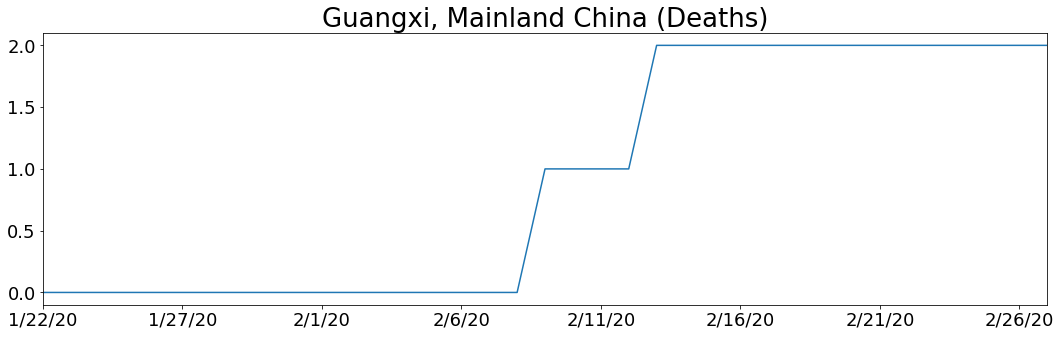

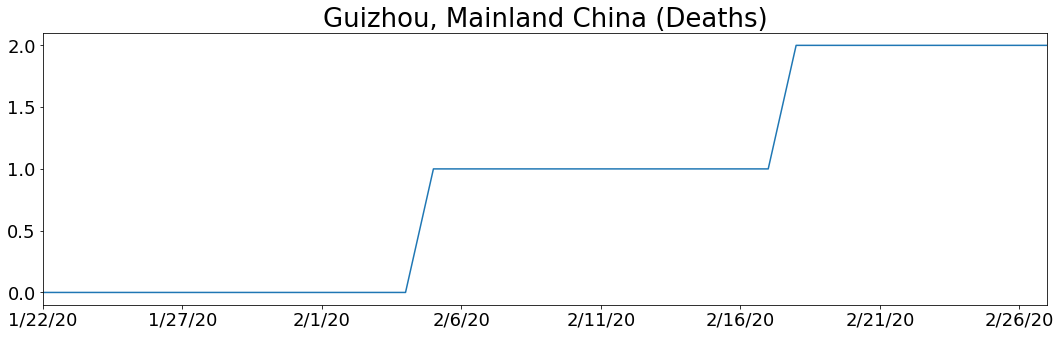

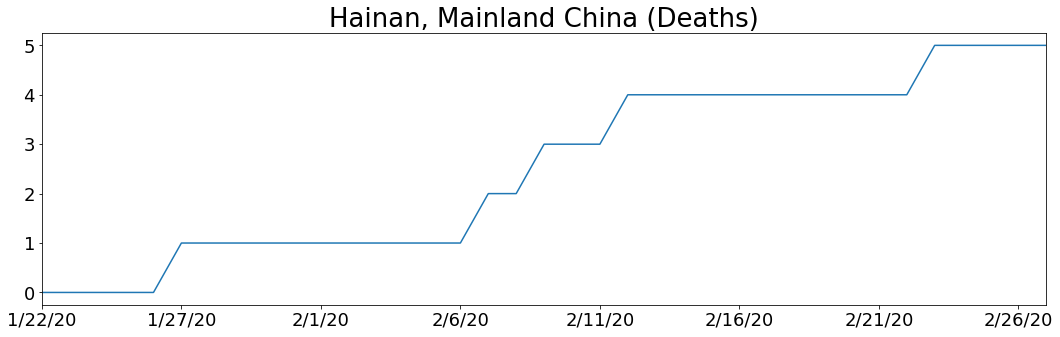

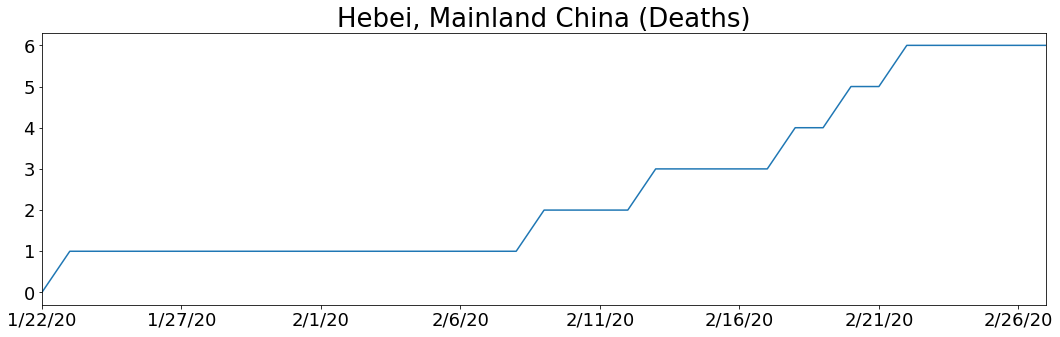

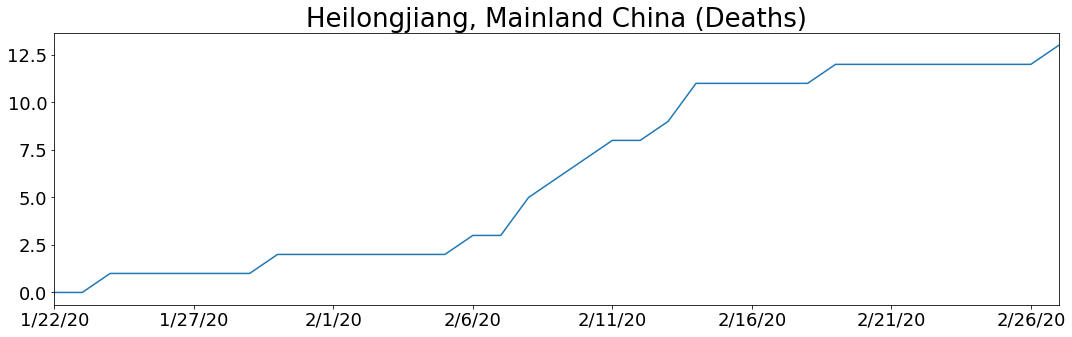

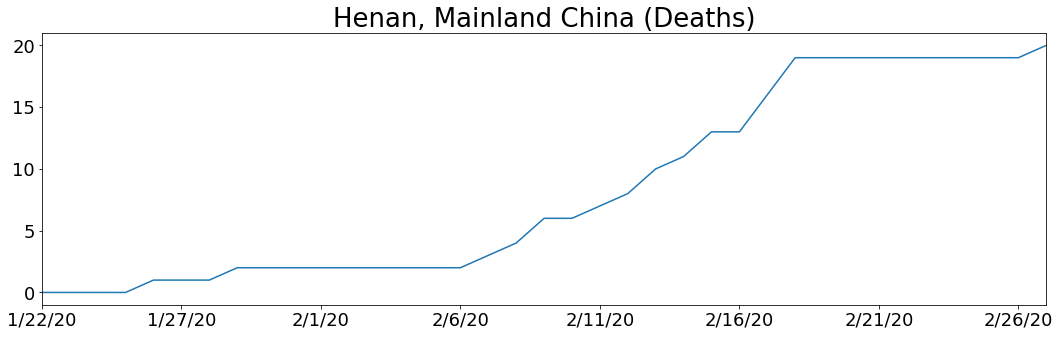

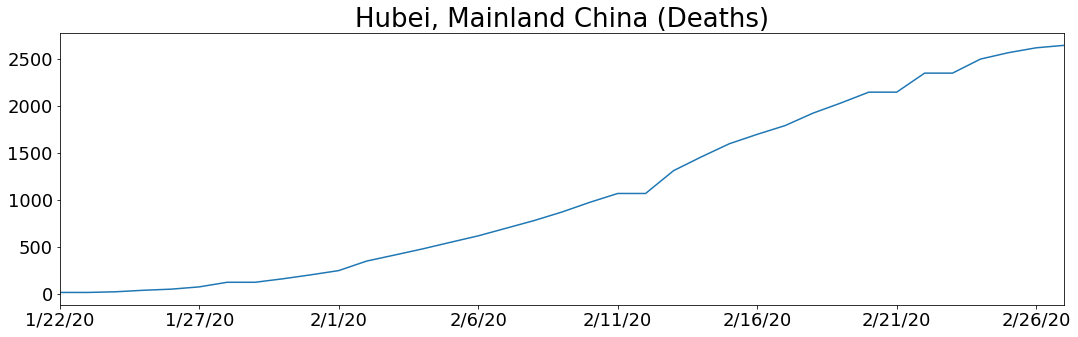

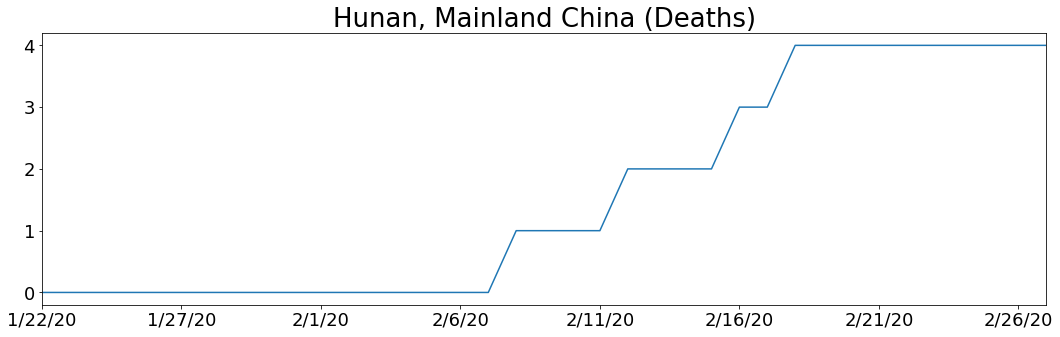

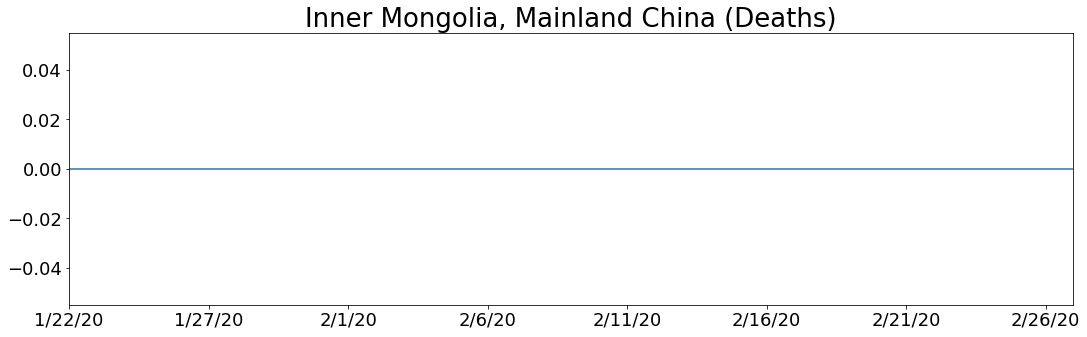

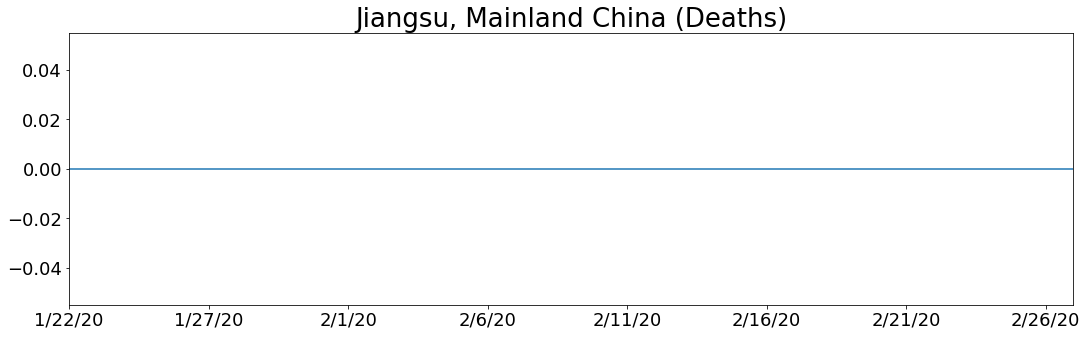

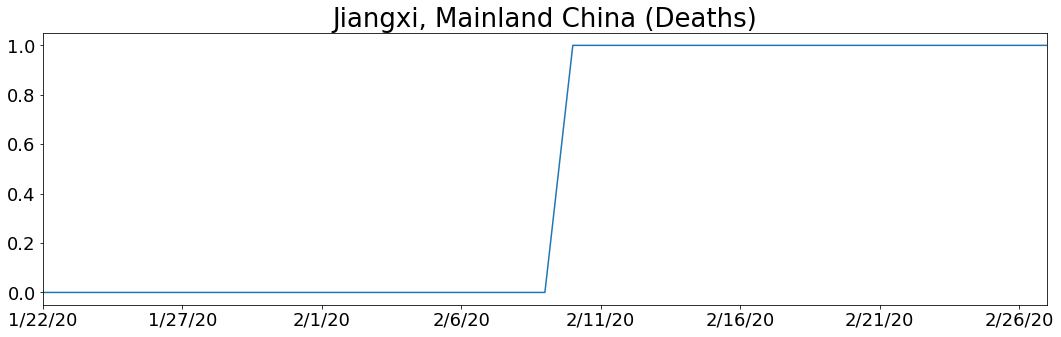

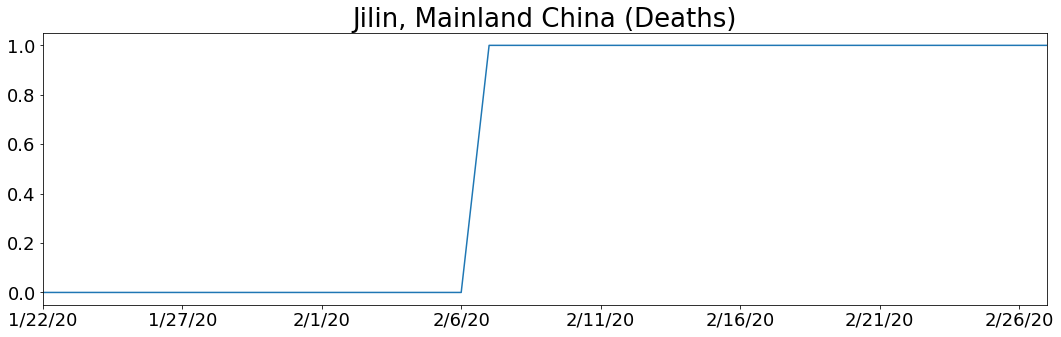

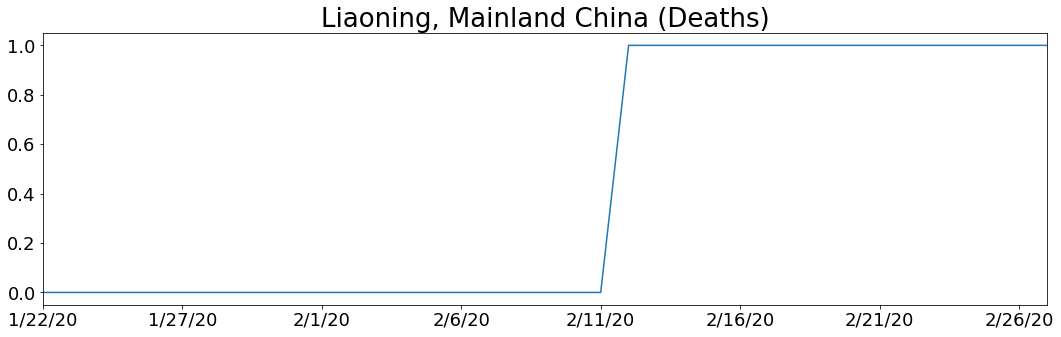

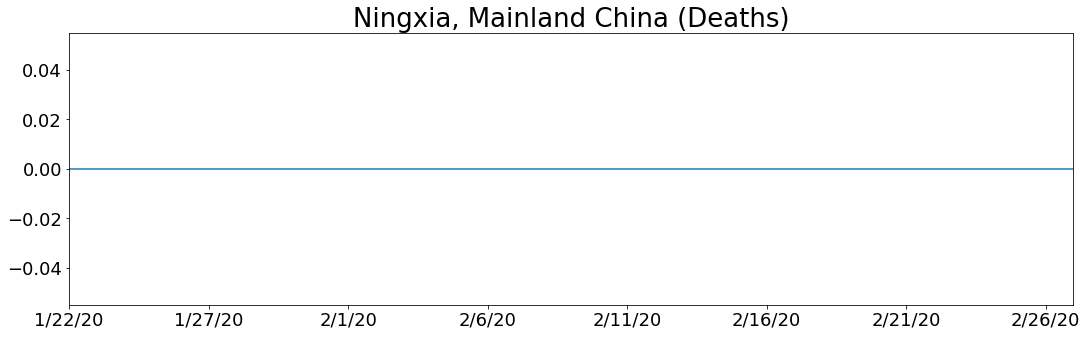

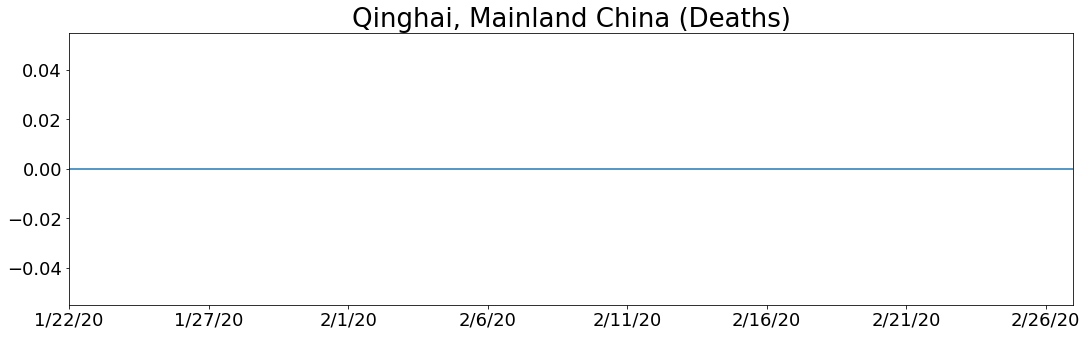

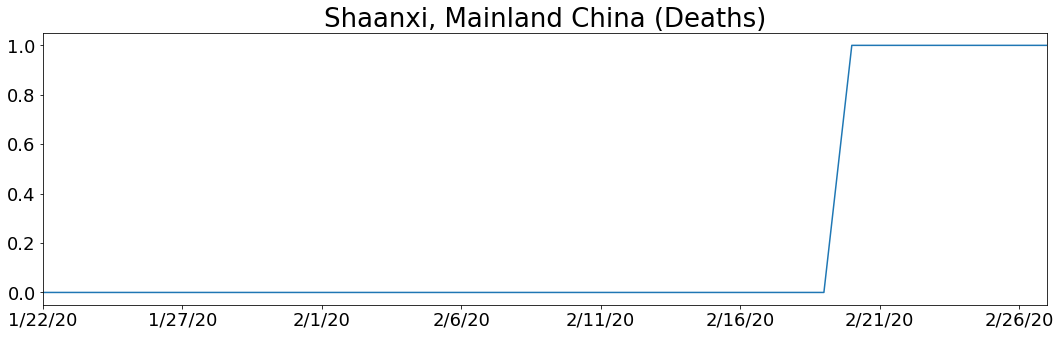

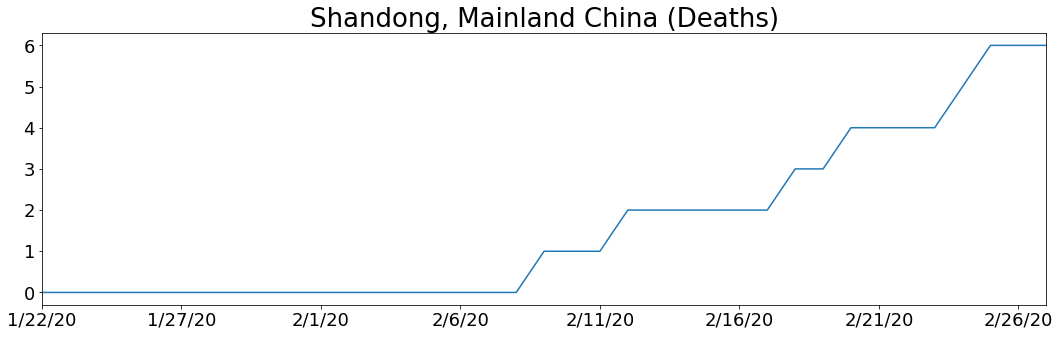

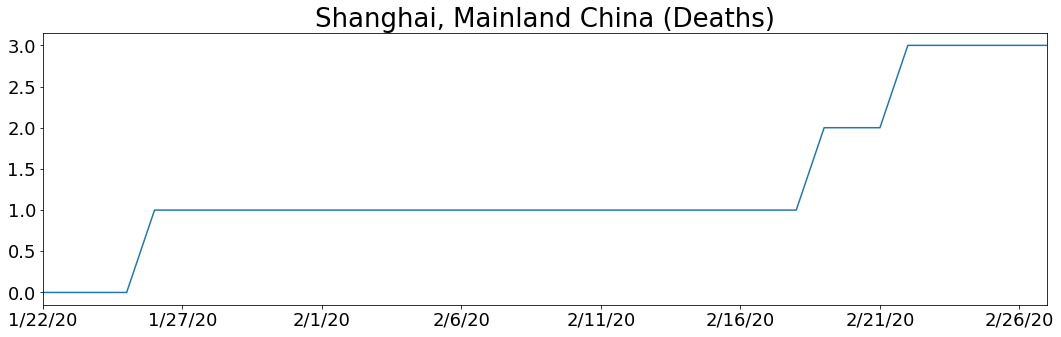

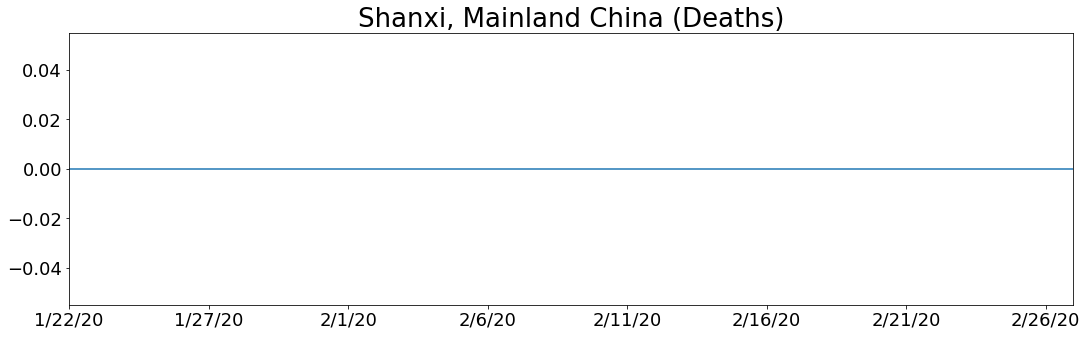

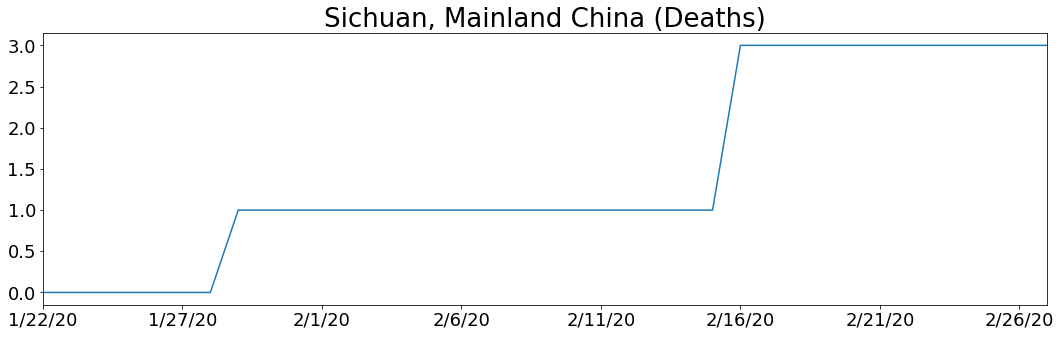

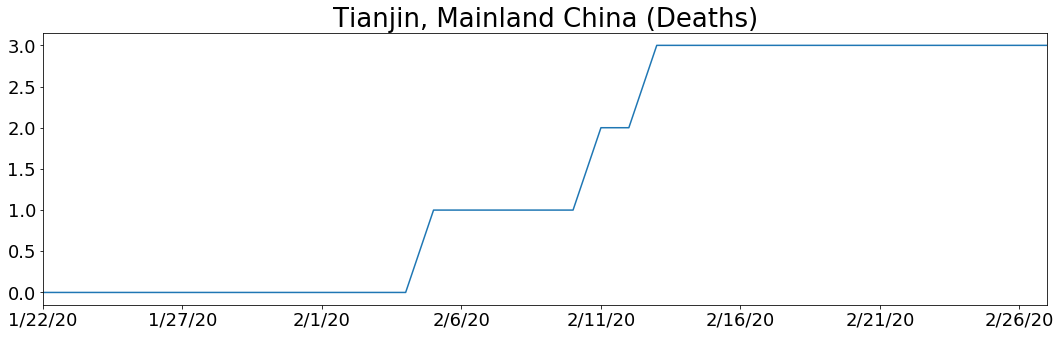

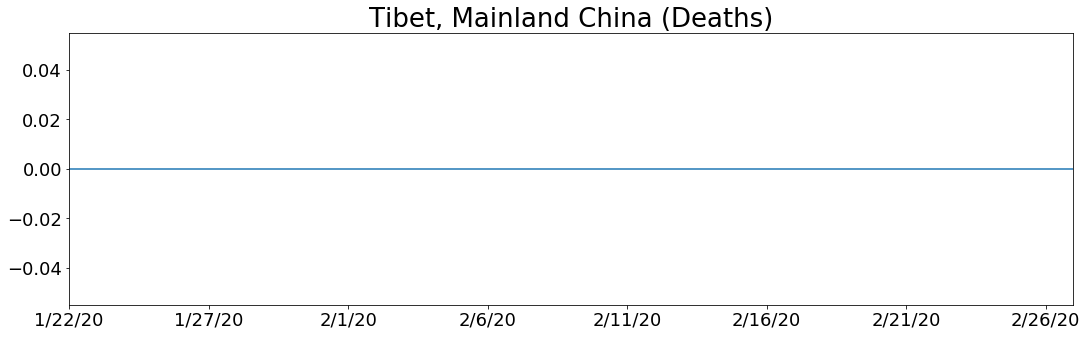

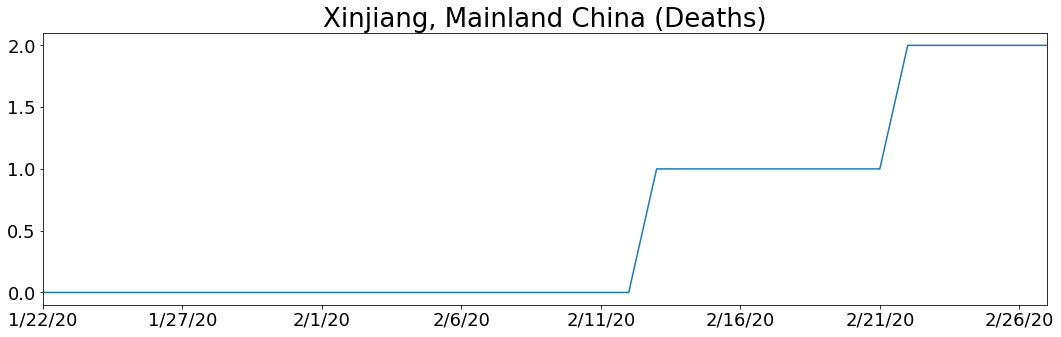

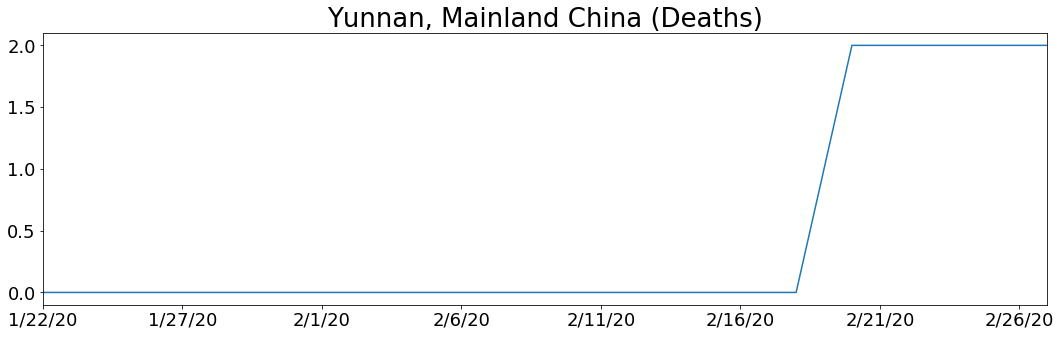

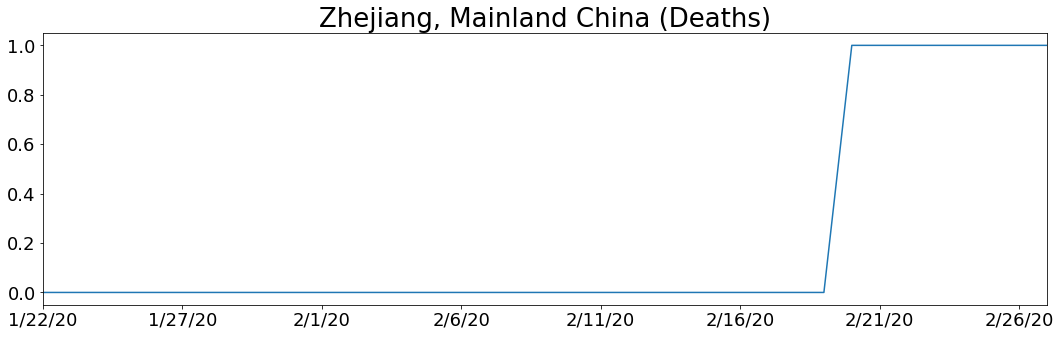

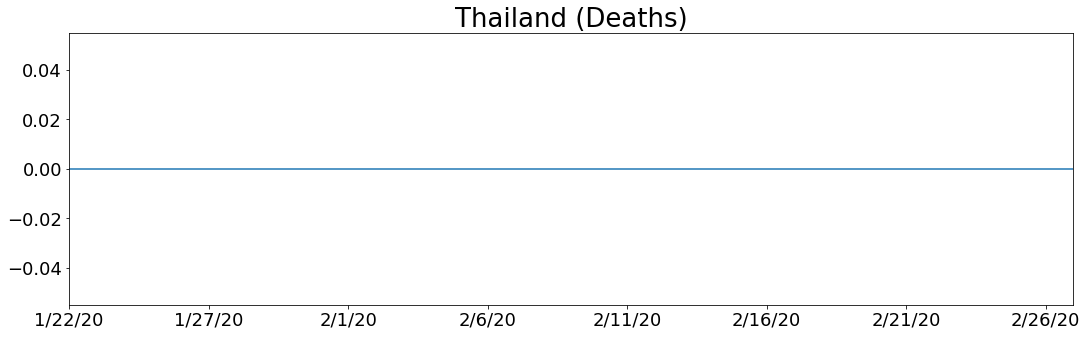

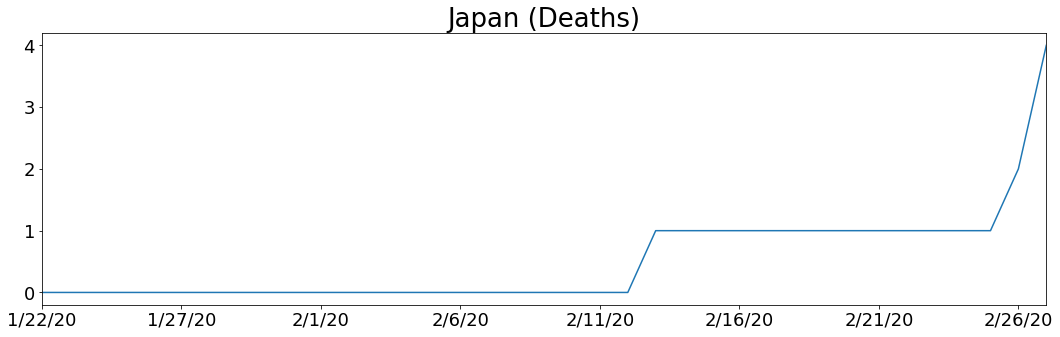

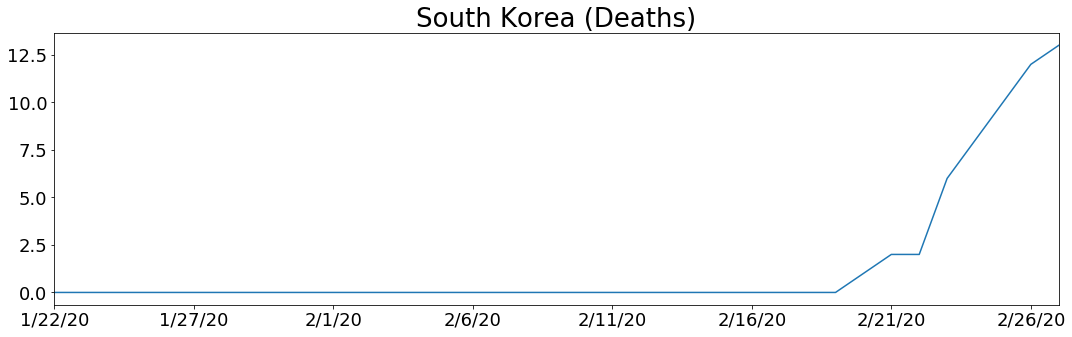

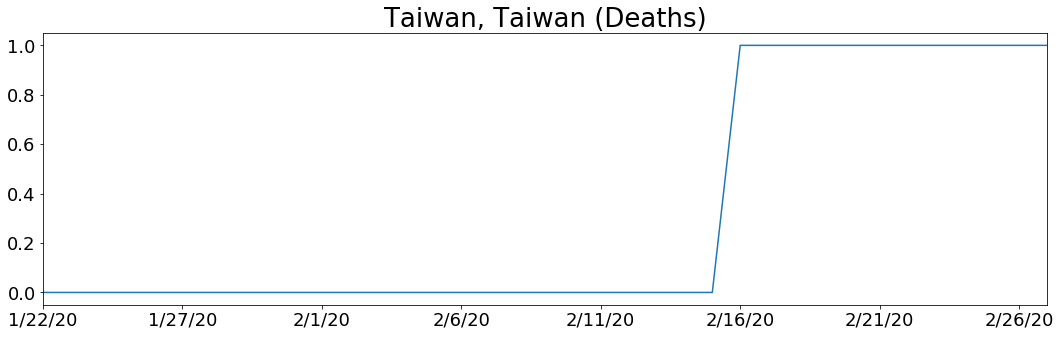

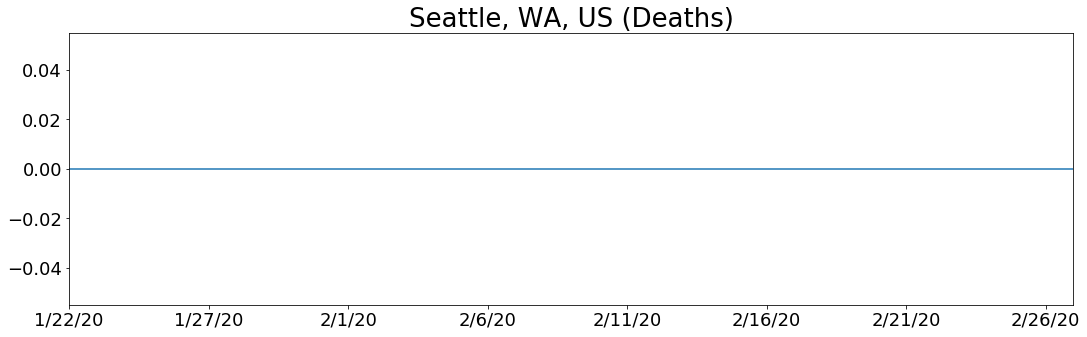

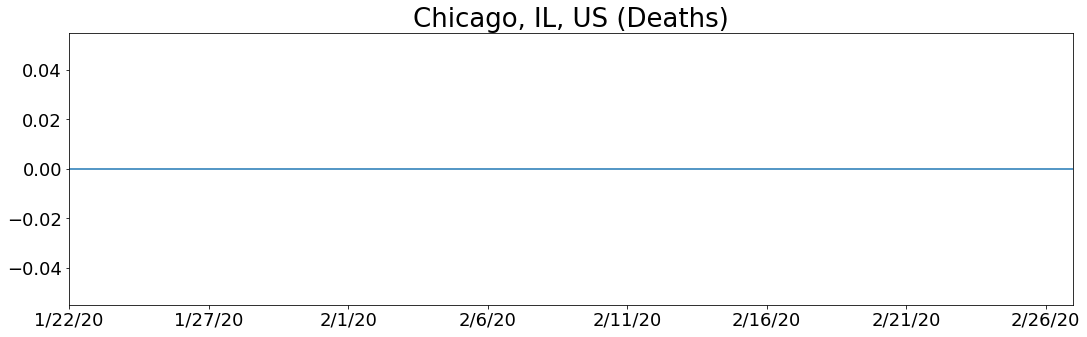

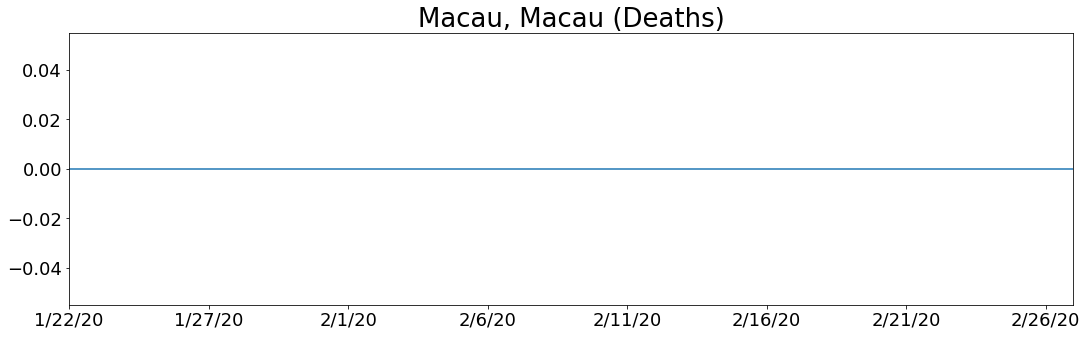

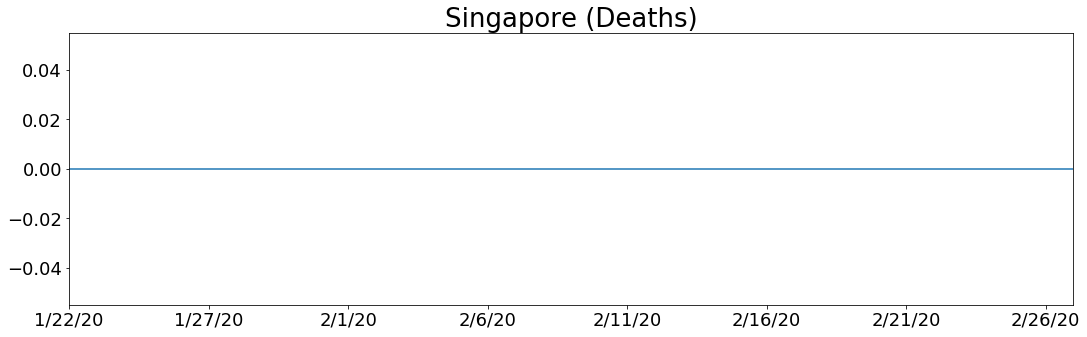

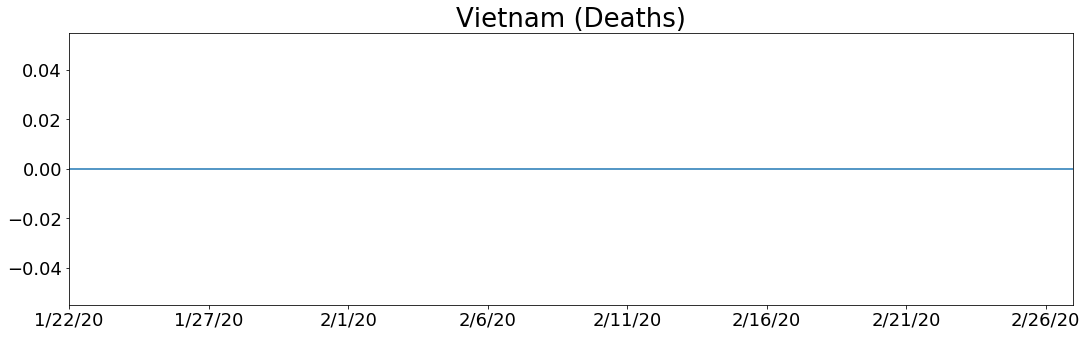

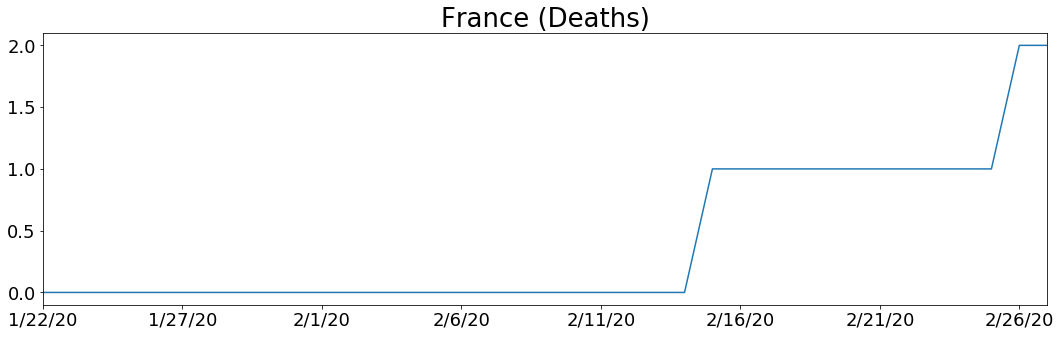

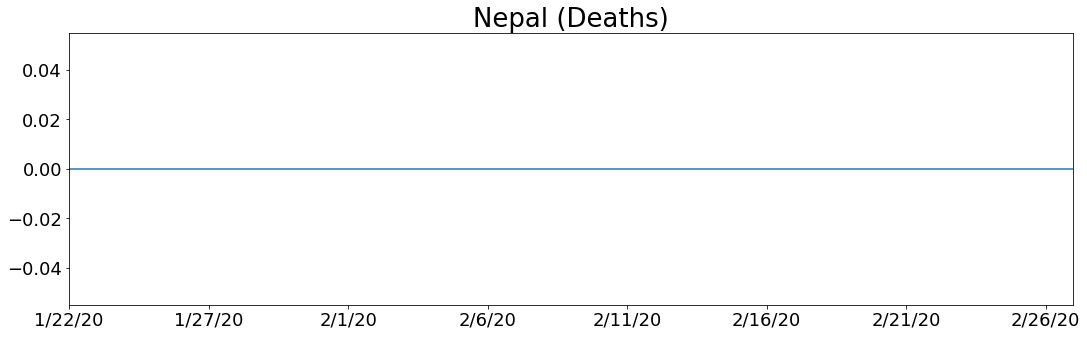

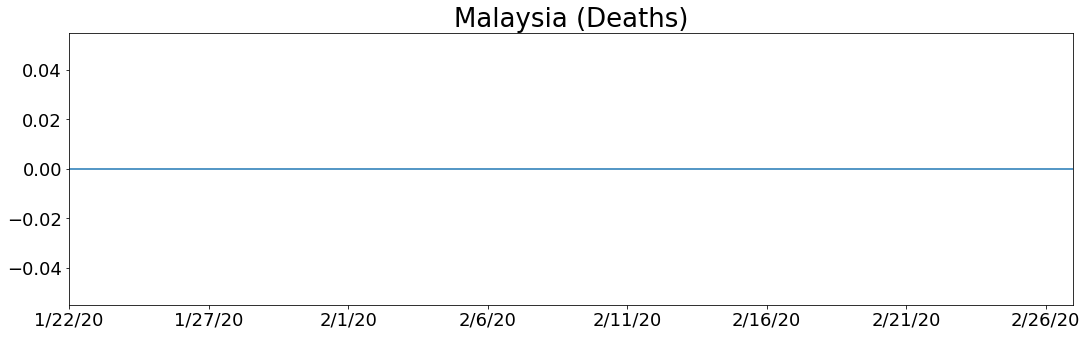

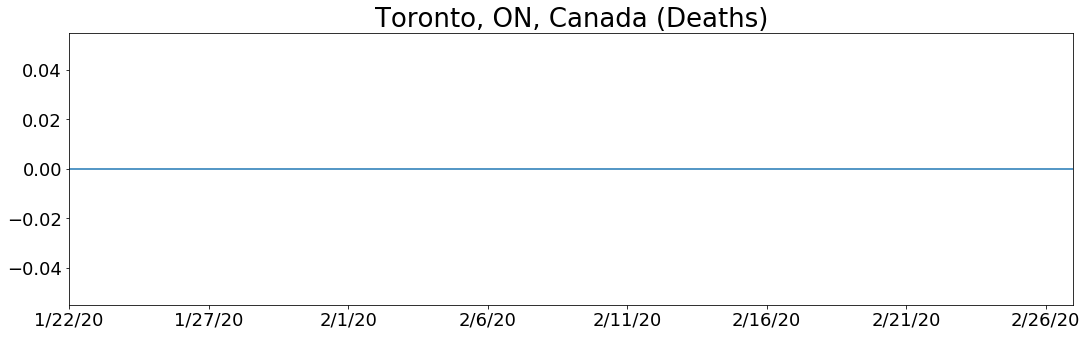

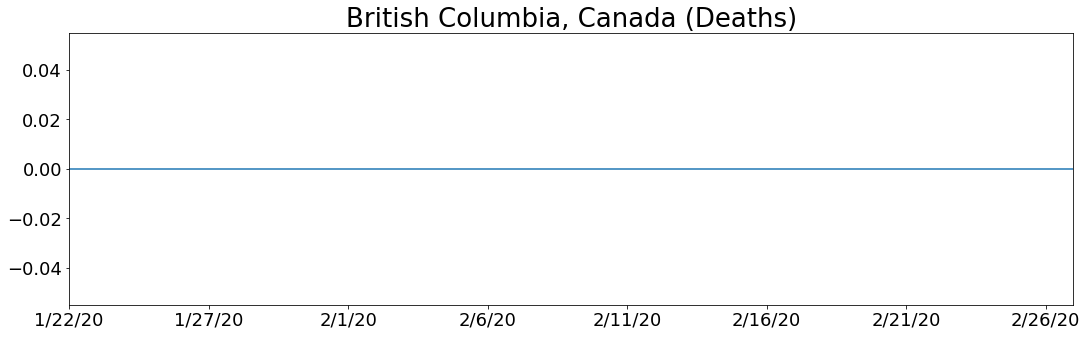

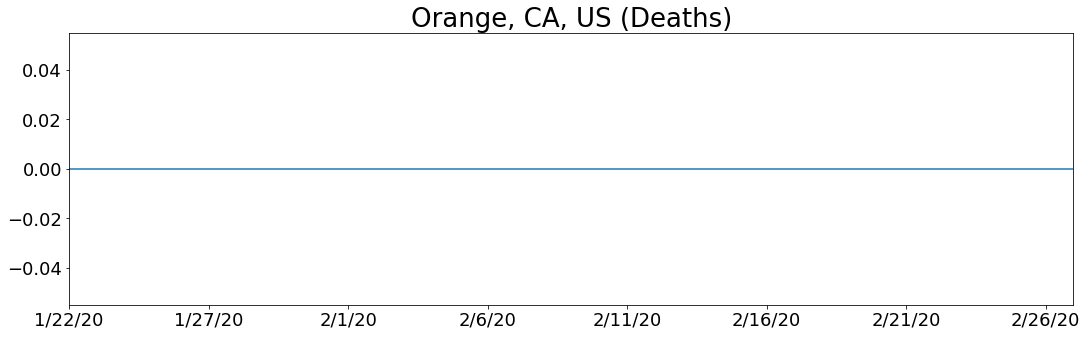

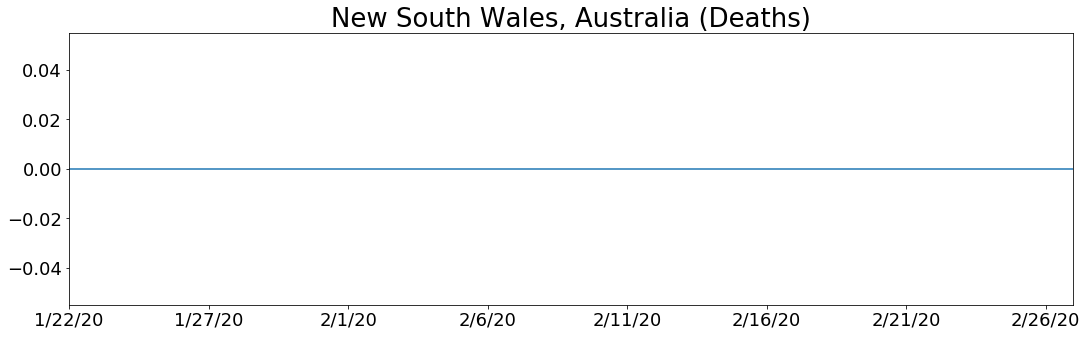

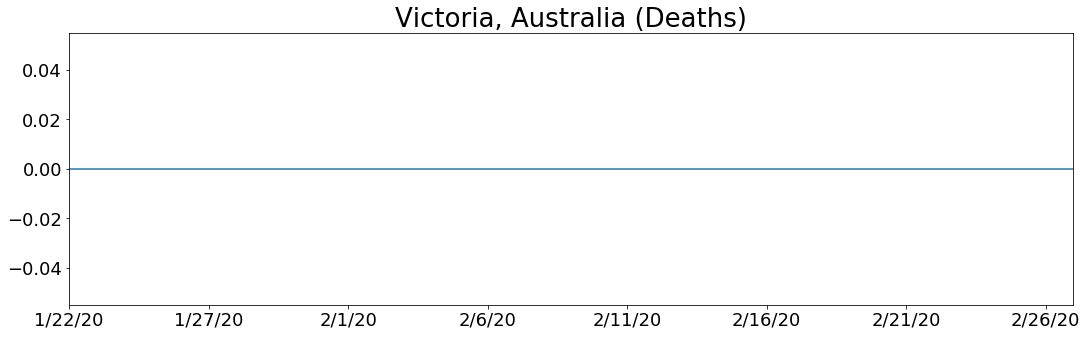

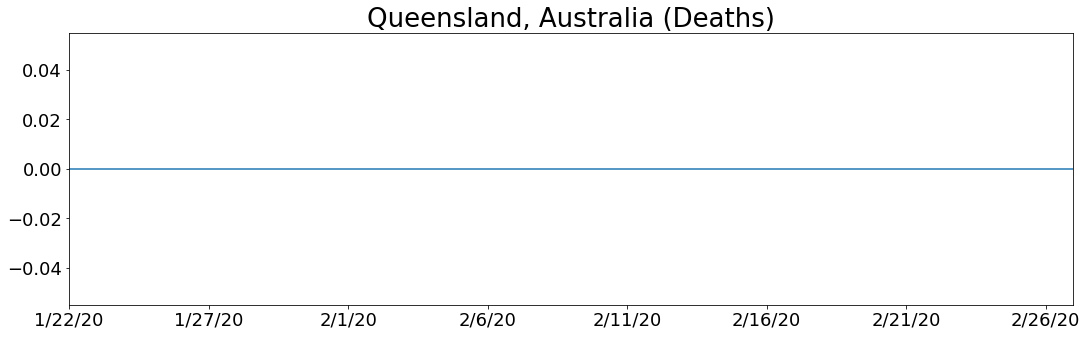

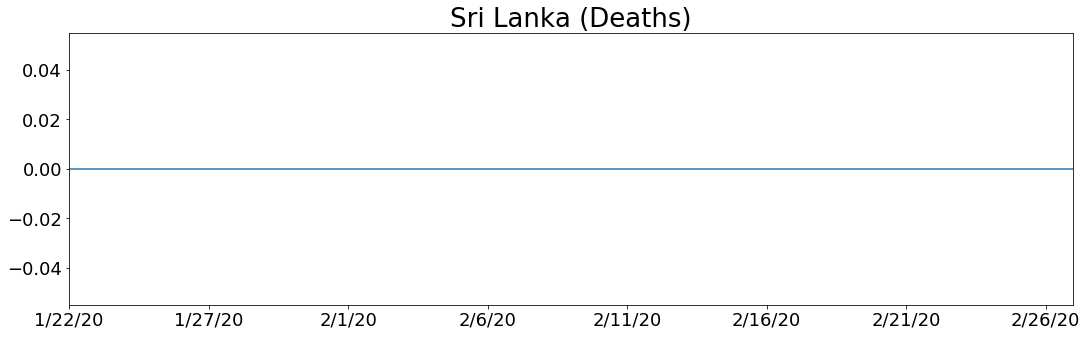

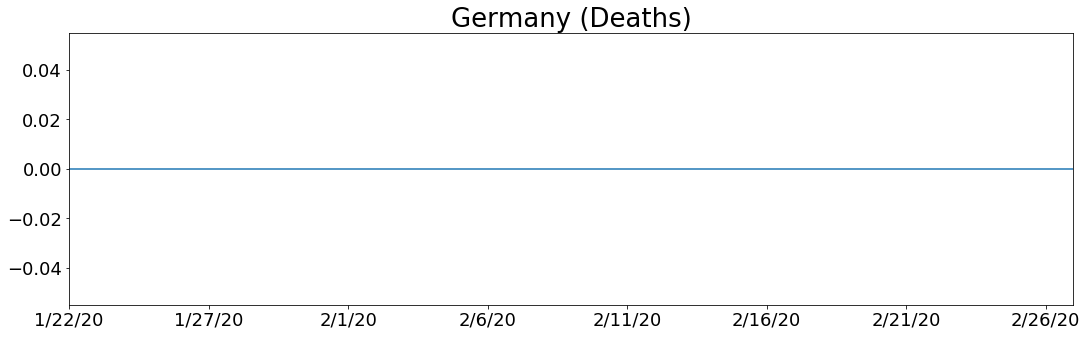

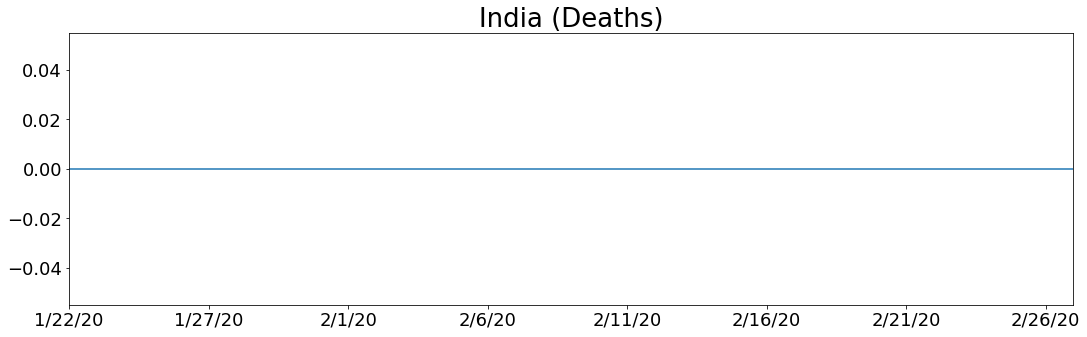

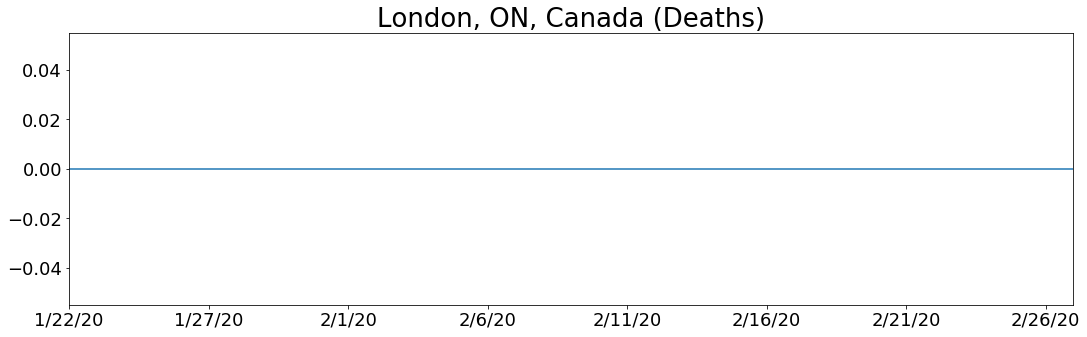

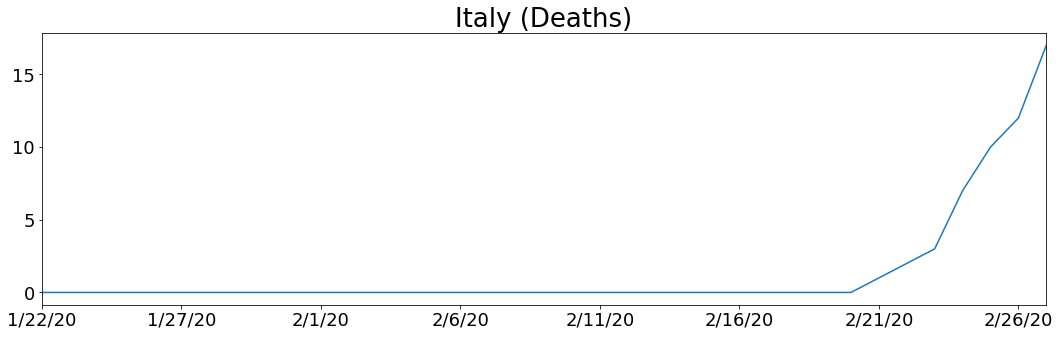

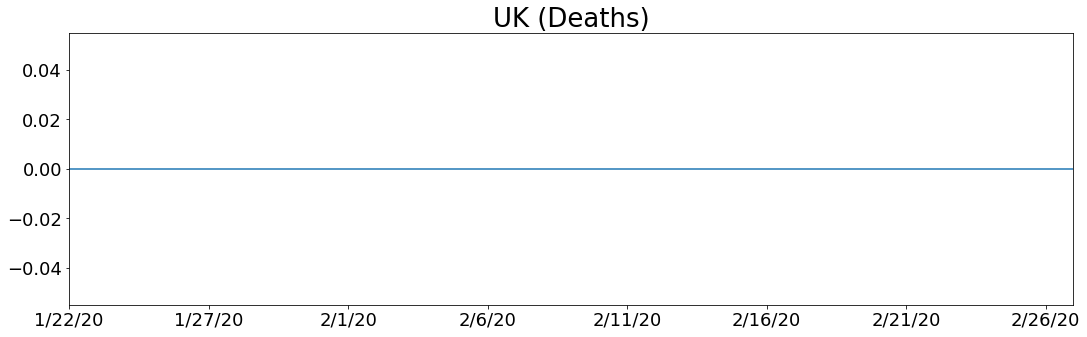

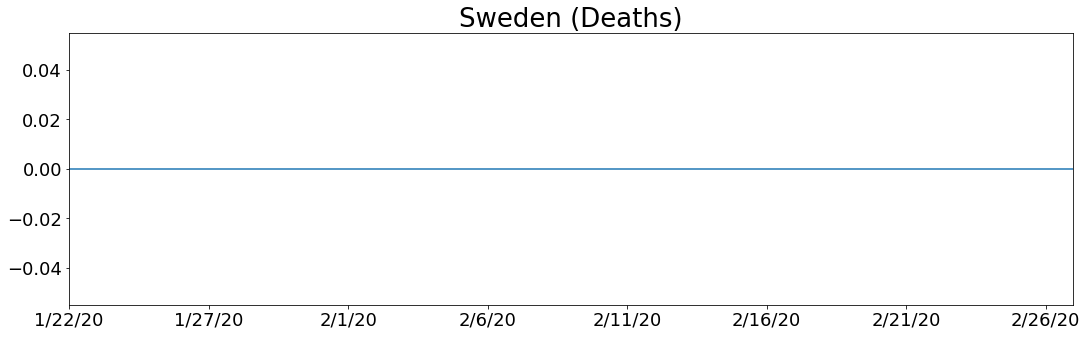

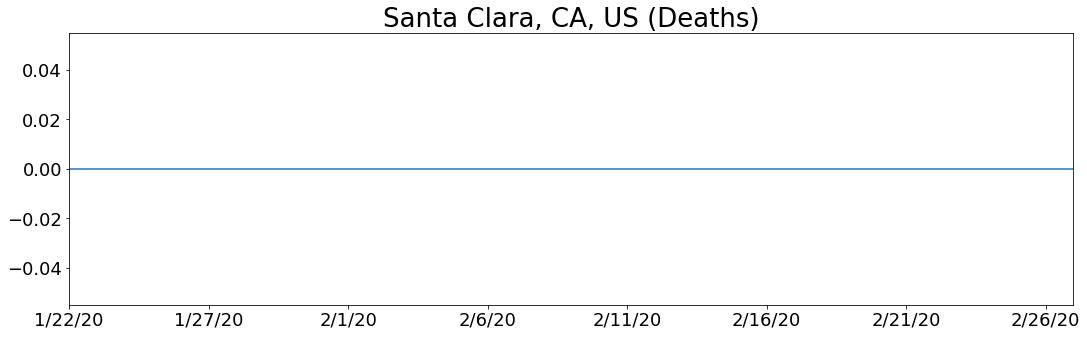

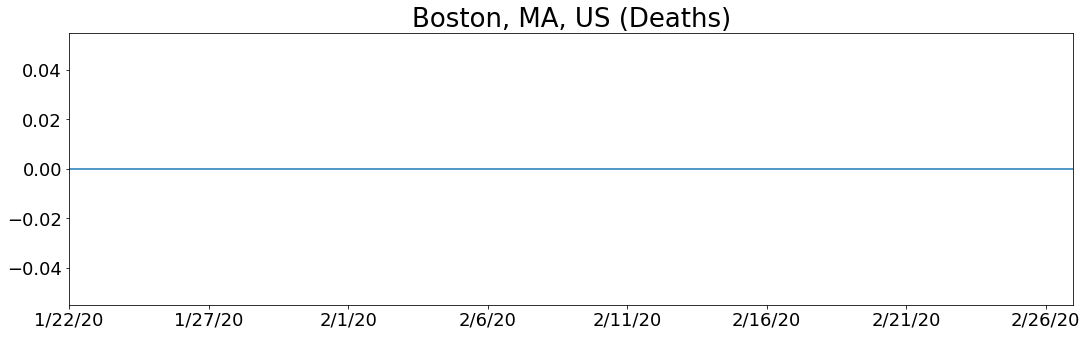

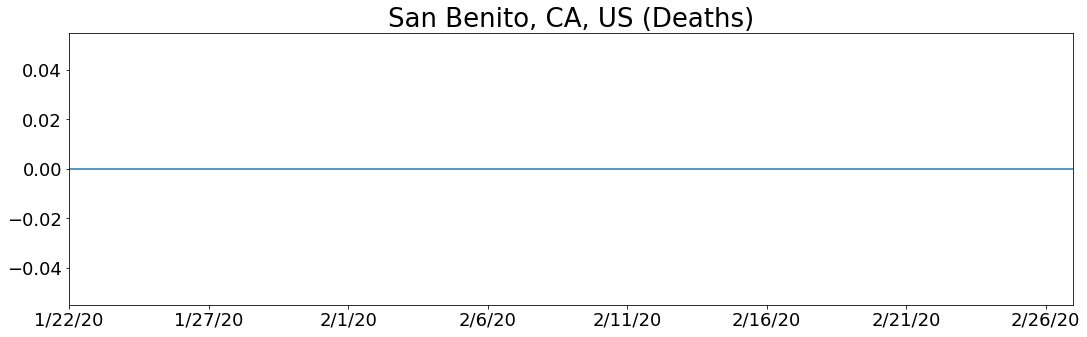

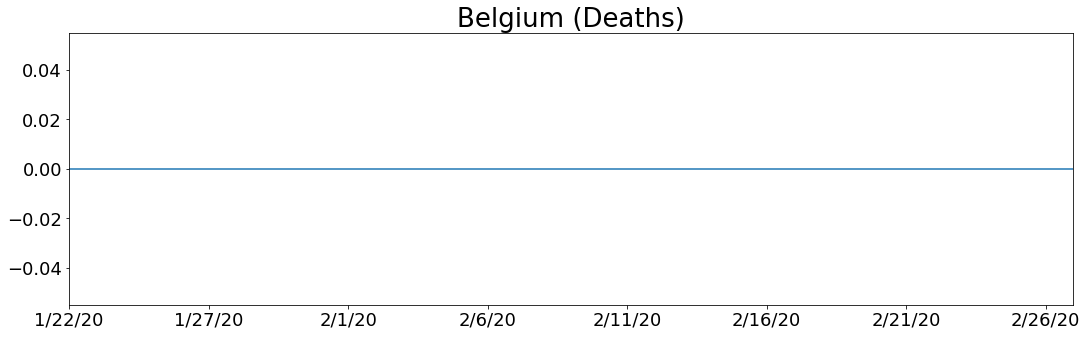

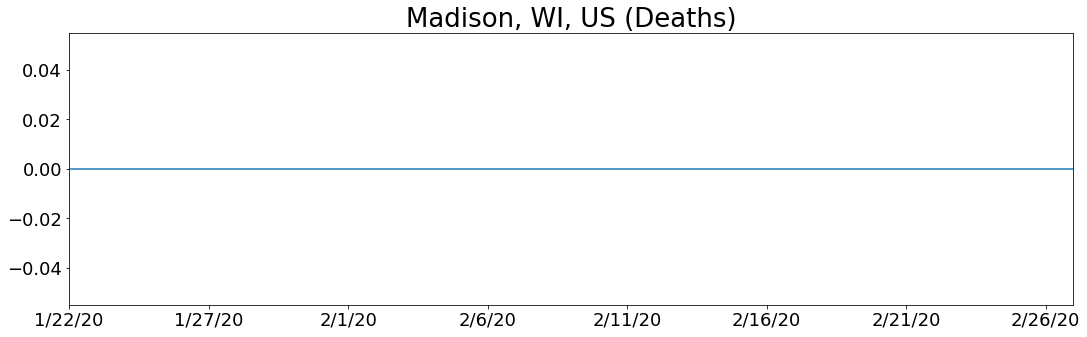

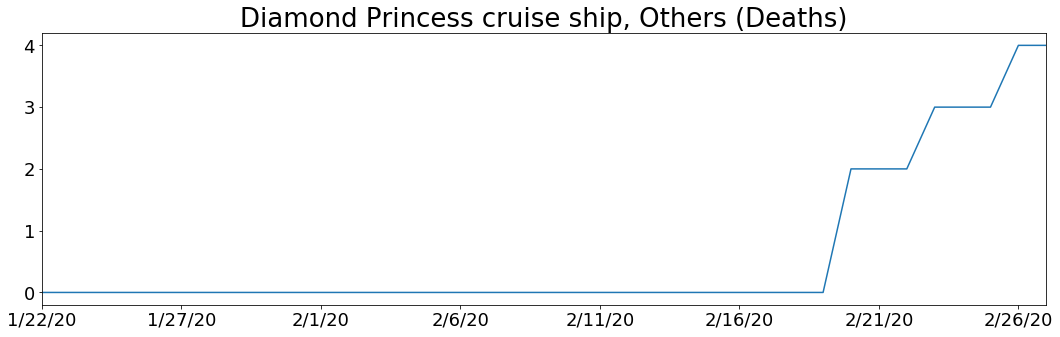

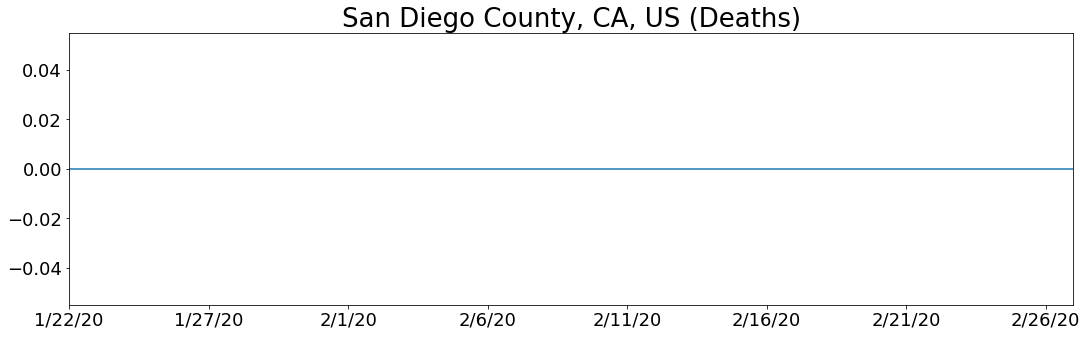

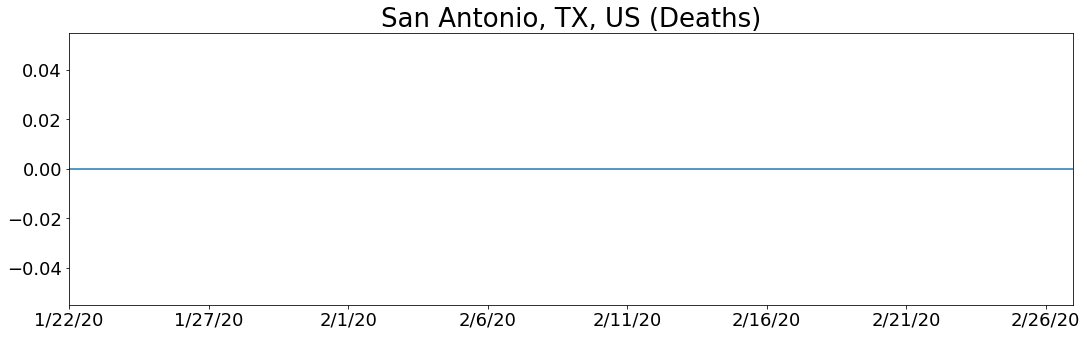

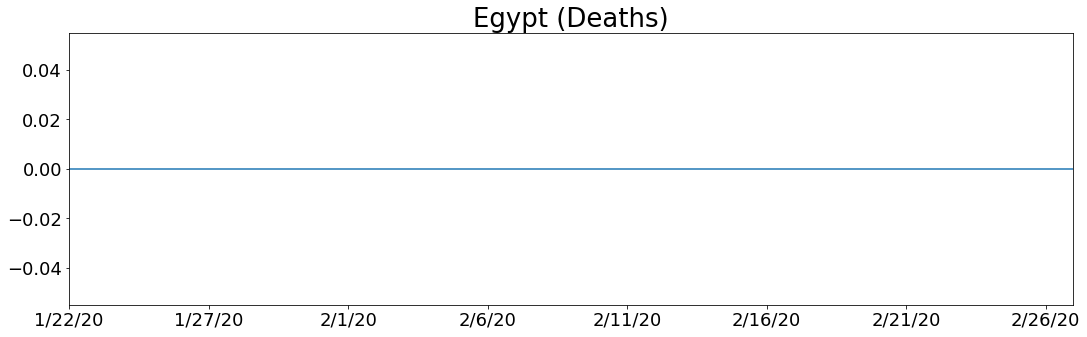

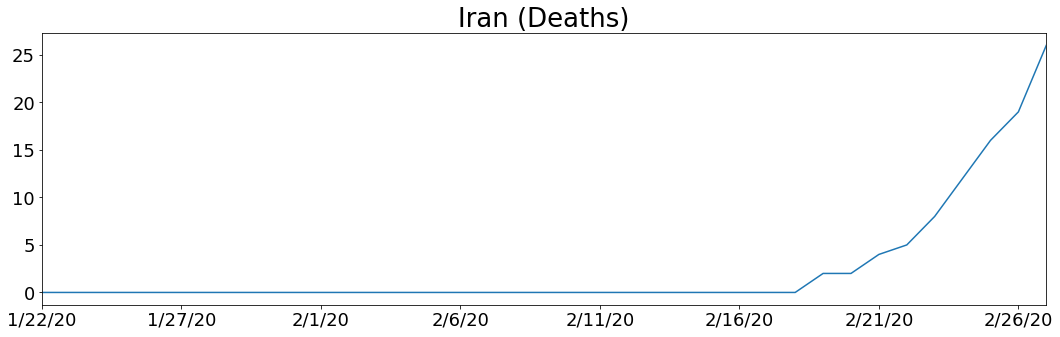

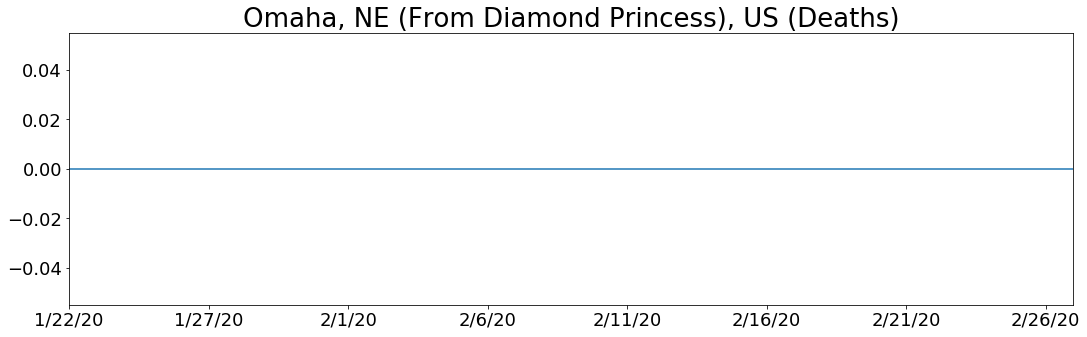

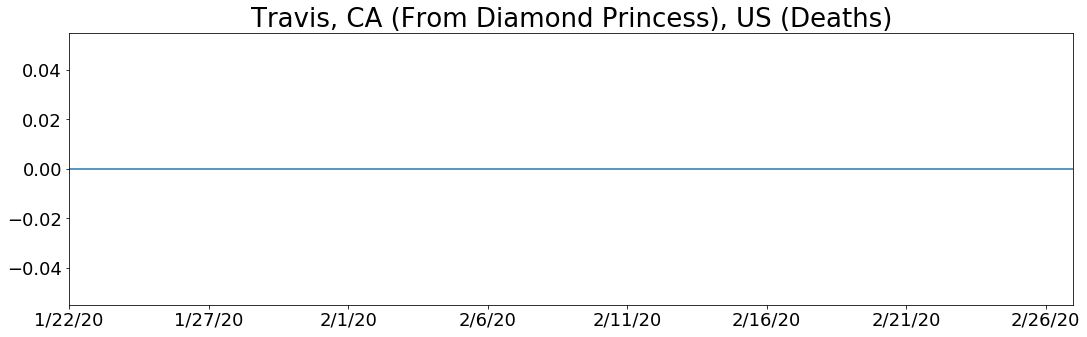

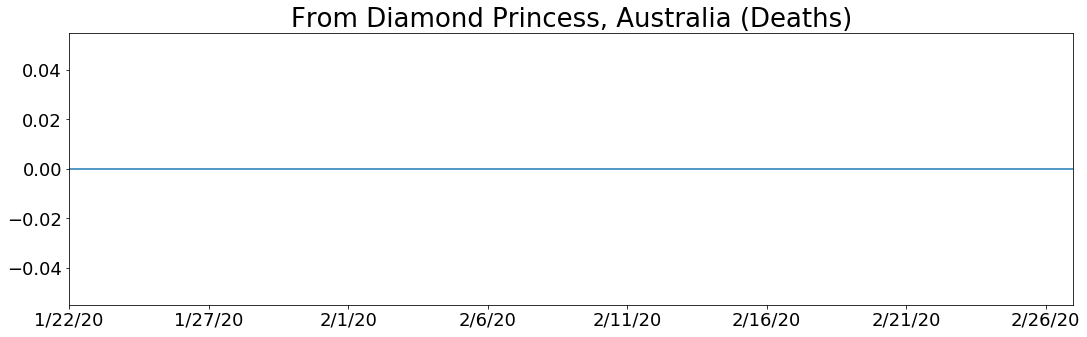

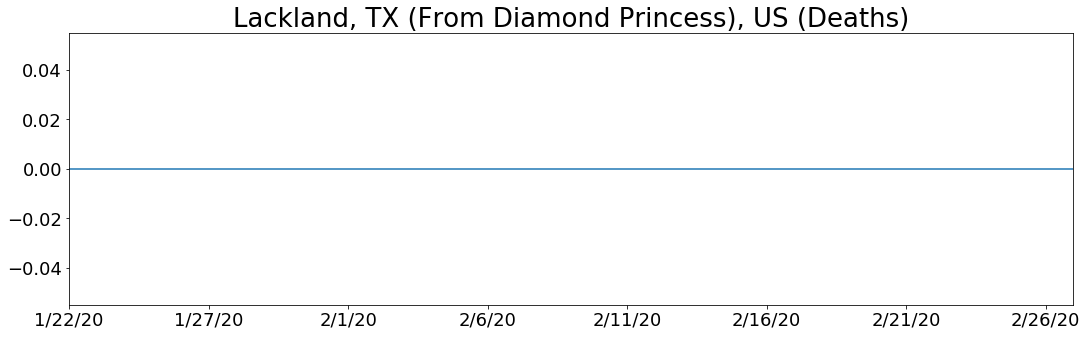

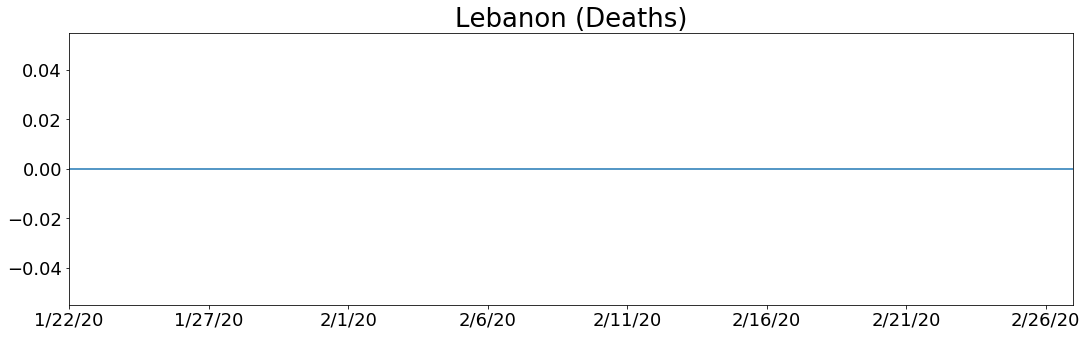

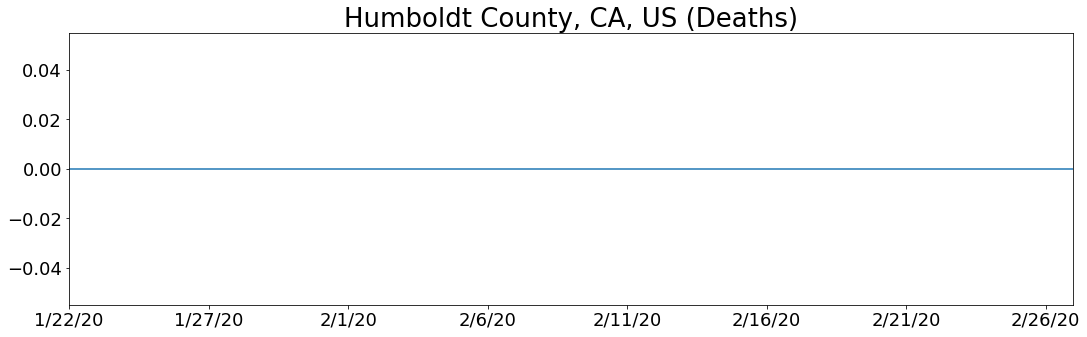

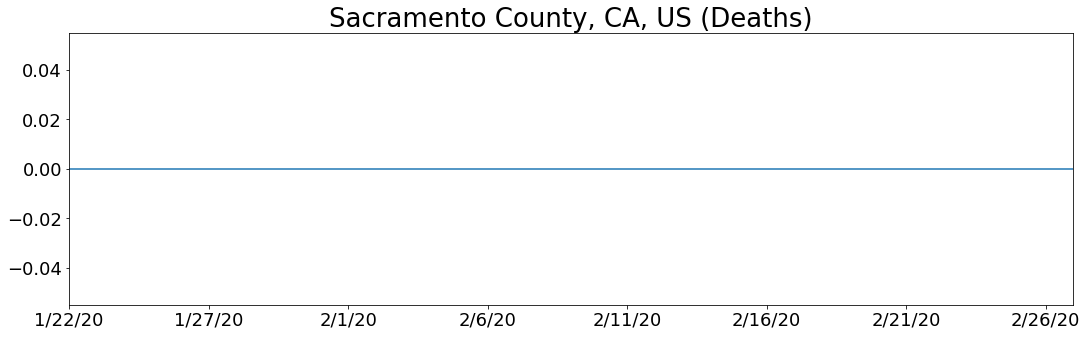

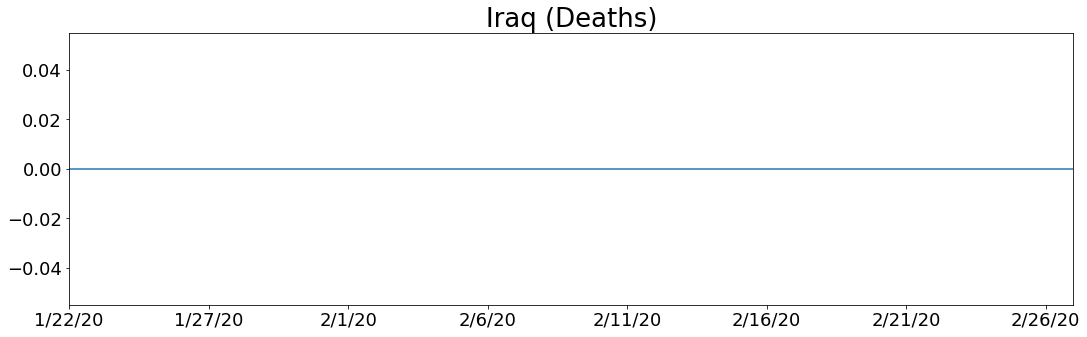

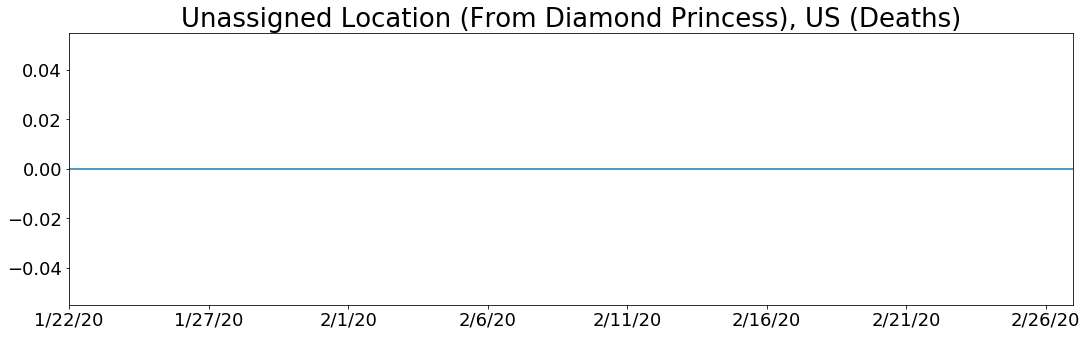

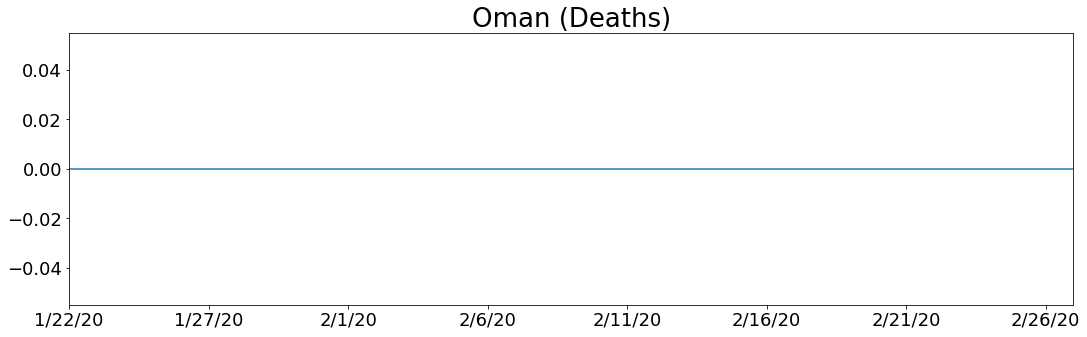

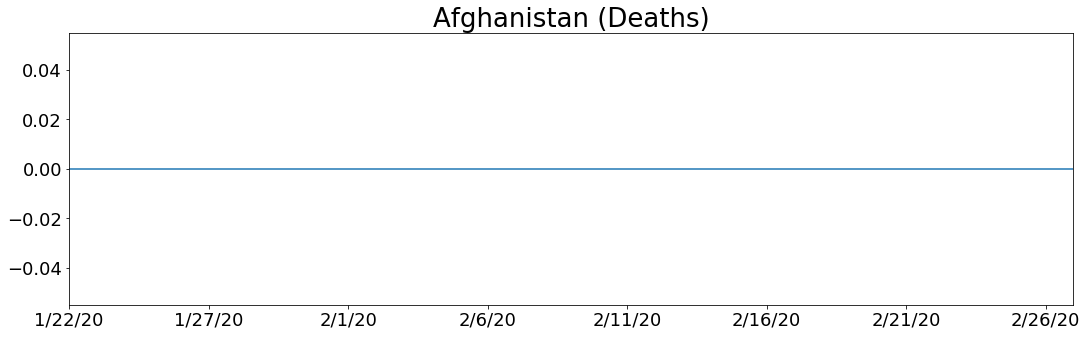

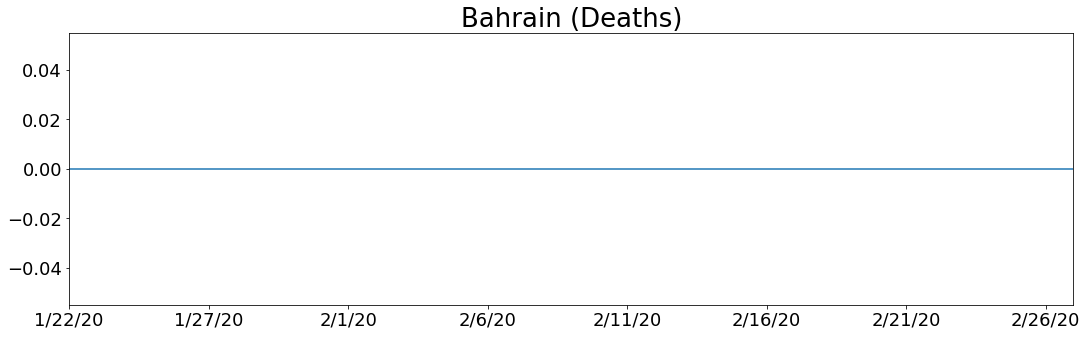

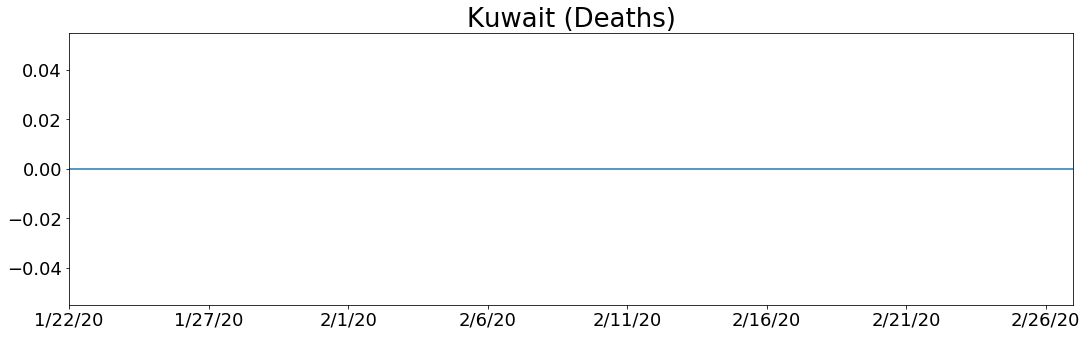

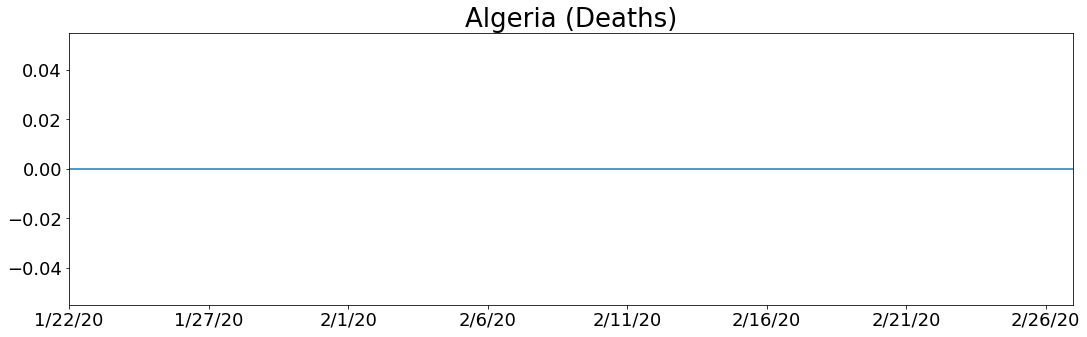

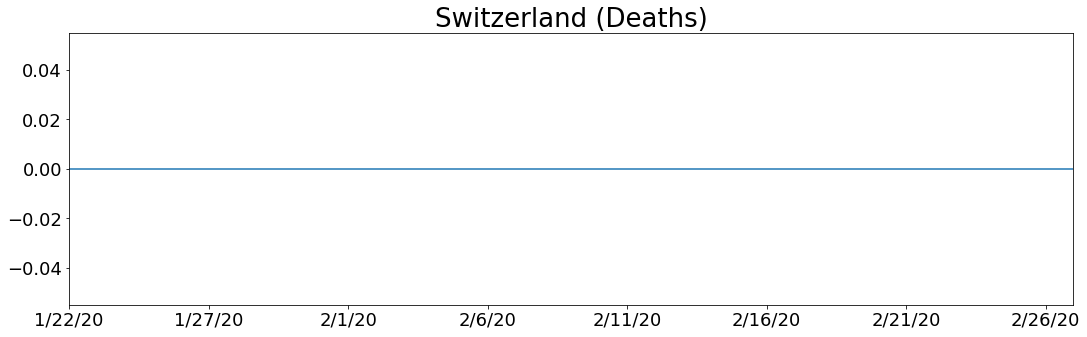

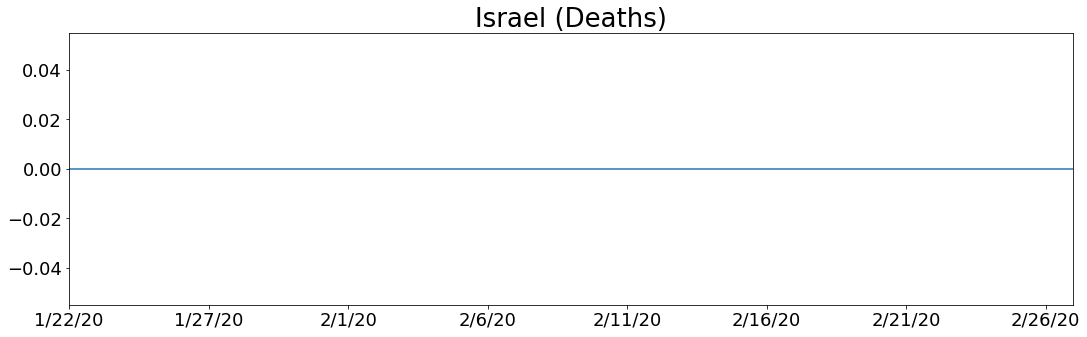

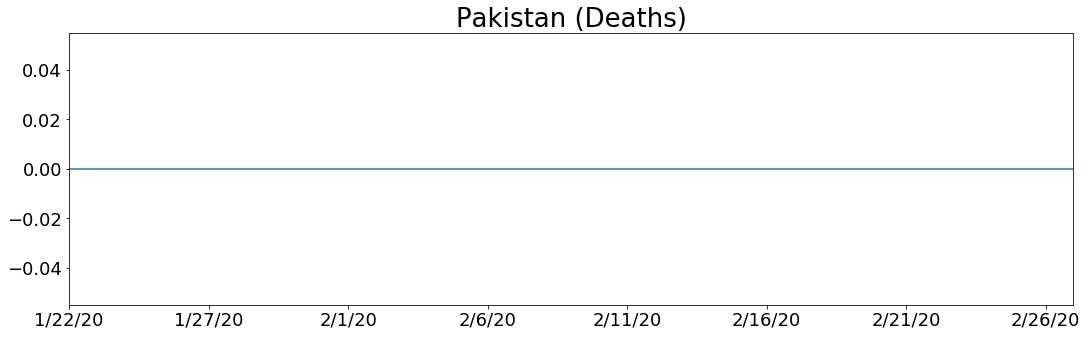

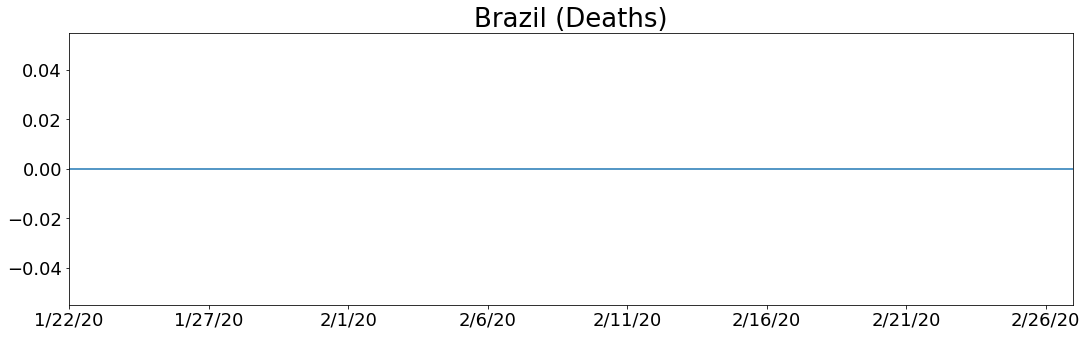

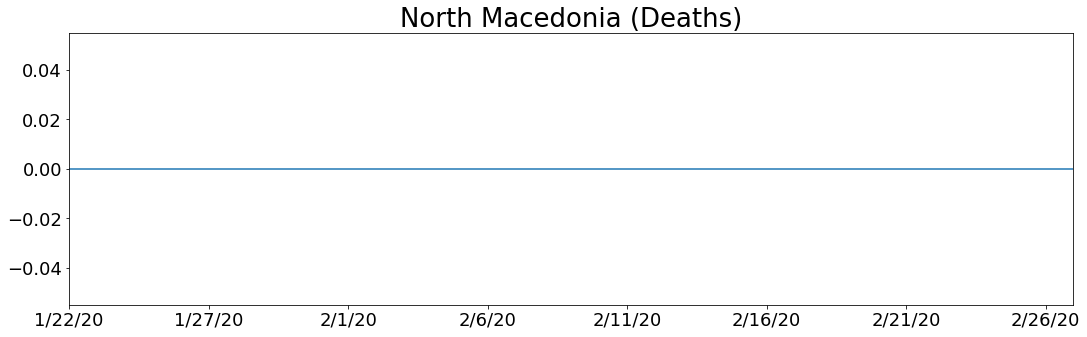

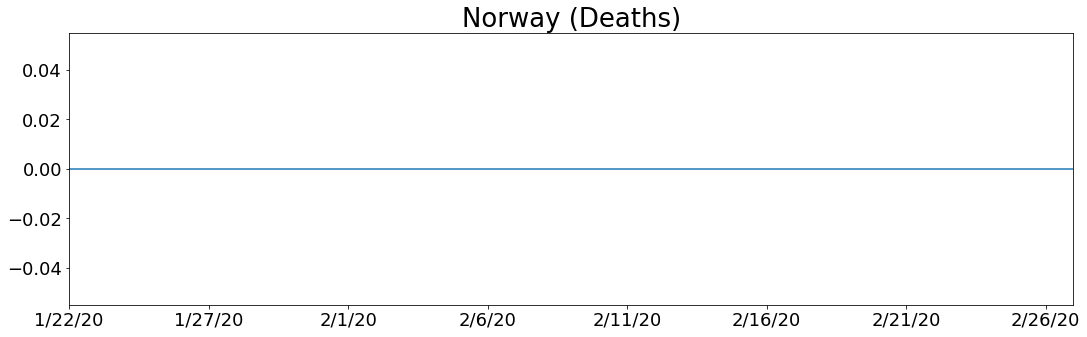

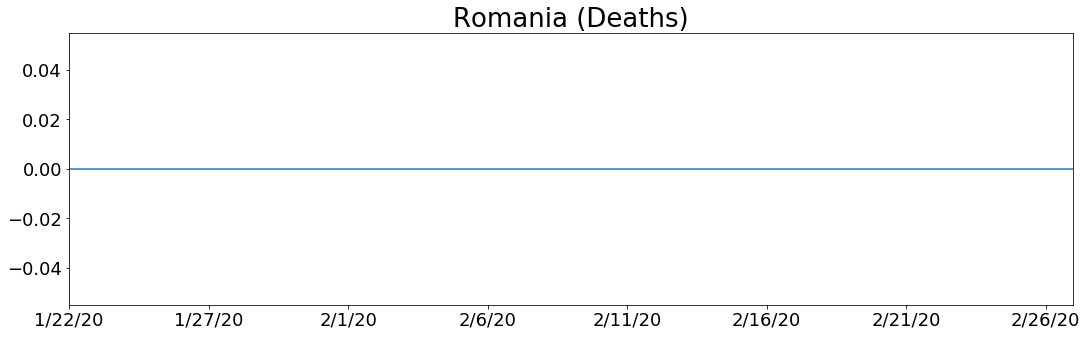

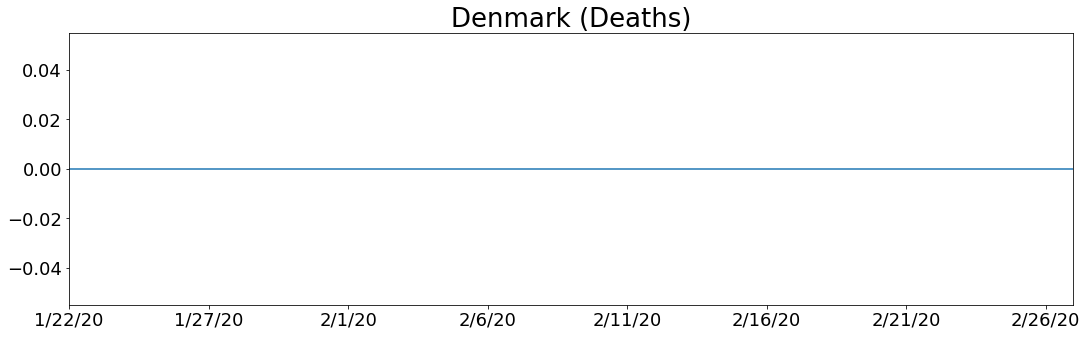

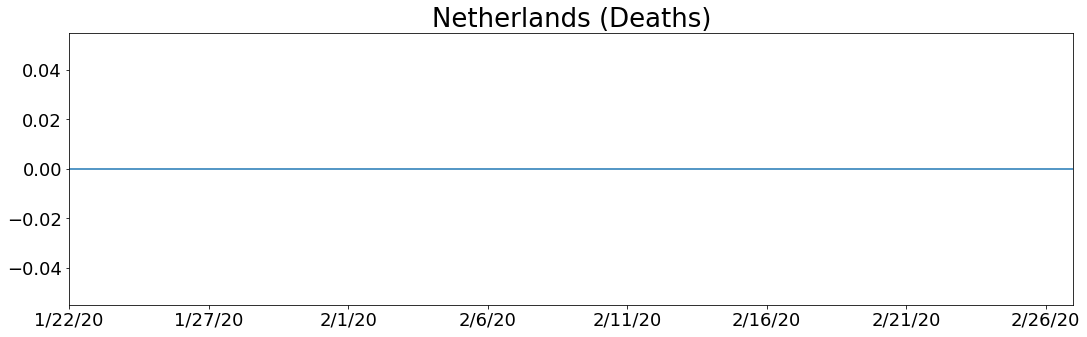

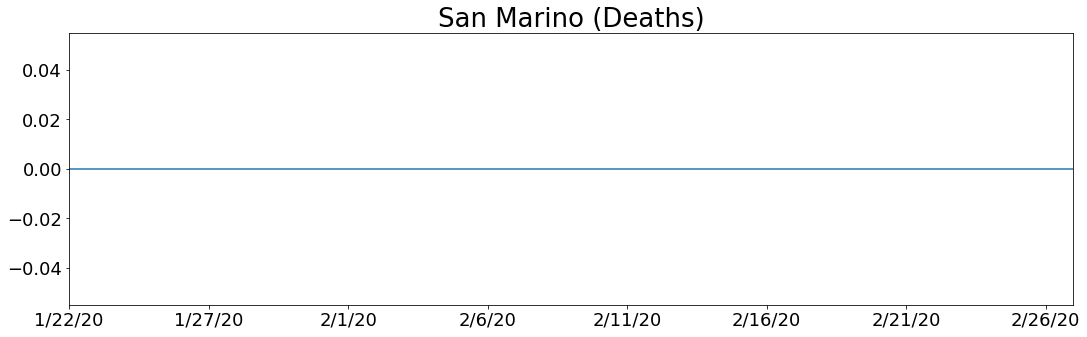

In [23]:
ticksize = 18
titlesize = ticksize + 8
labelsize = ticksize + 5

figsize = (18, 5)
params = {'figure.figsize' : figsize,
          'axes.labelsize' : labelsize,
          'axes.titlesize' : titlesize,
          'xtick.labelsize': ticksize,
          'ytick.labelsize': ticksize}

plt.rcParams.update(params)

title = "Total Number of Deaths by Date"
for index, row in time_series_covid_19_deaths.iterrows():
    row[data_cols].plot()
    if not row["Province/State"]=="NA":
        plt.title(row["Province/State"] + ", " + row["Country/Region"] + " (Deaths)")
    else:
        plt.title(row["Country/Region"] + " (Deaths)")
    plt.show()

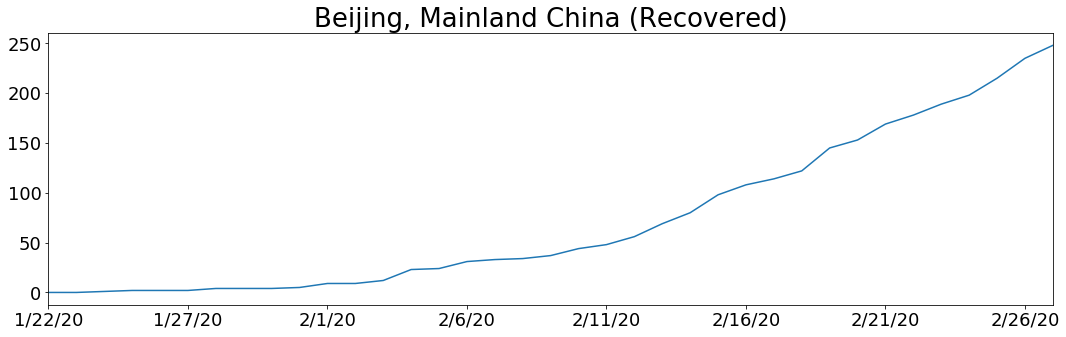

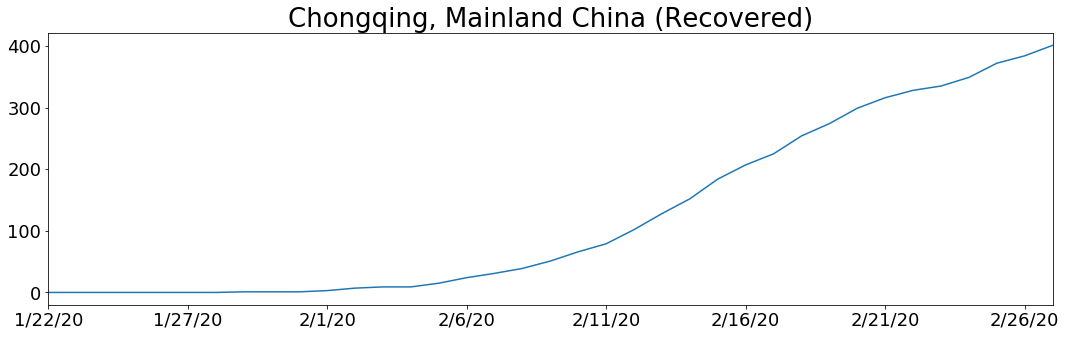

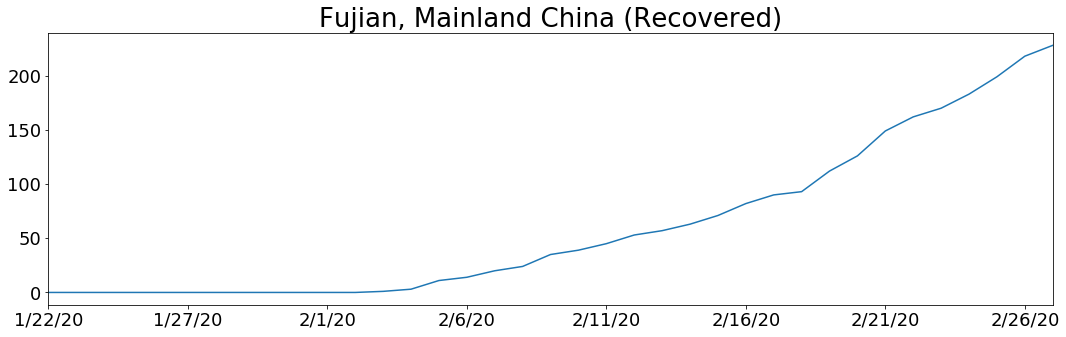

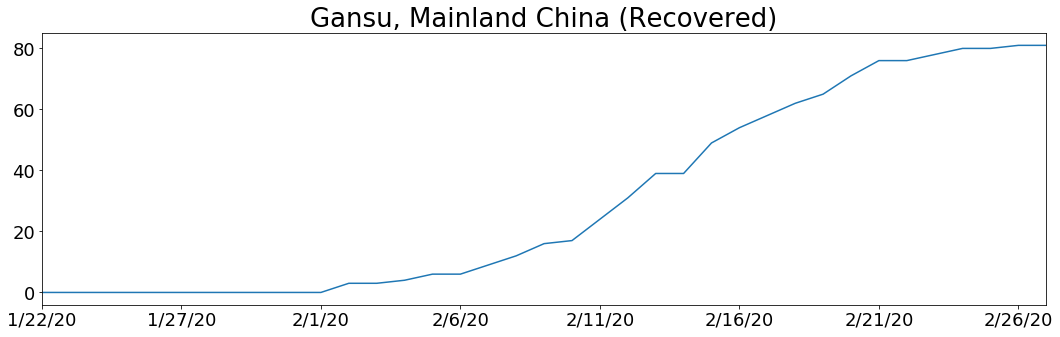

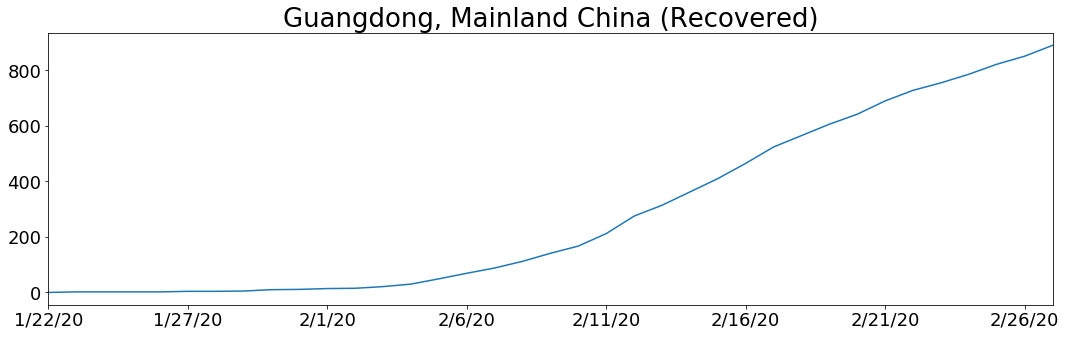

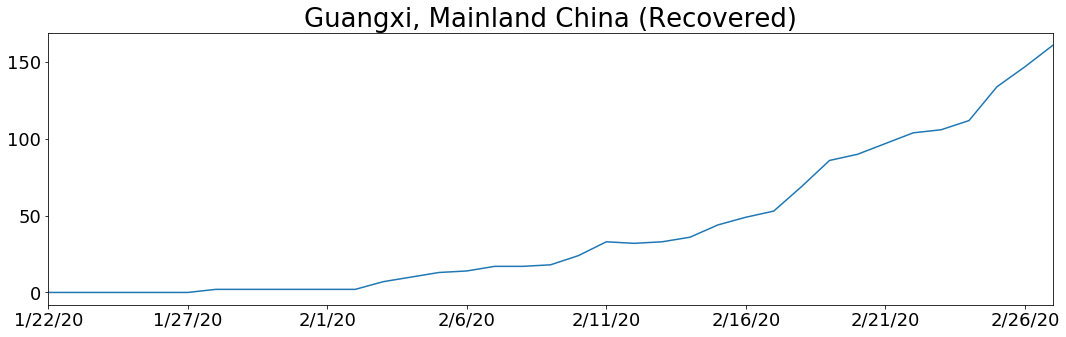

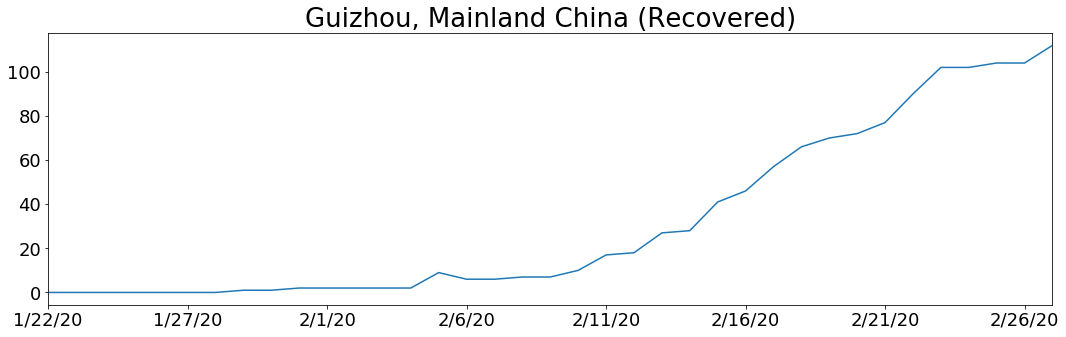

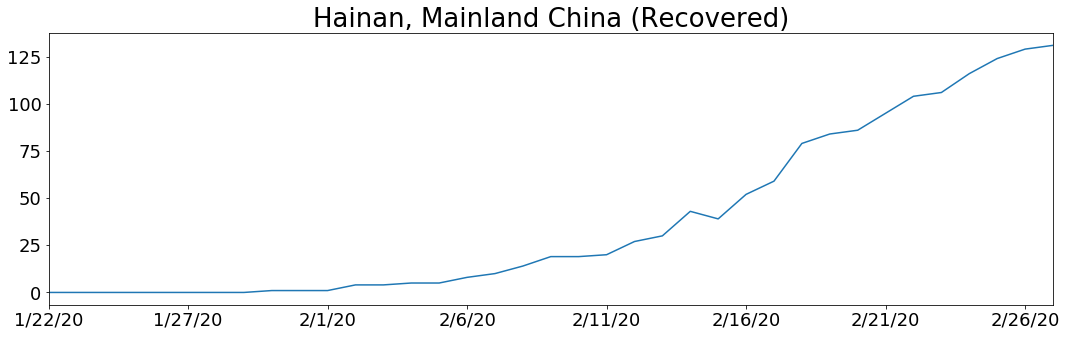

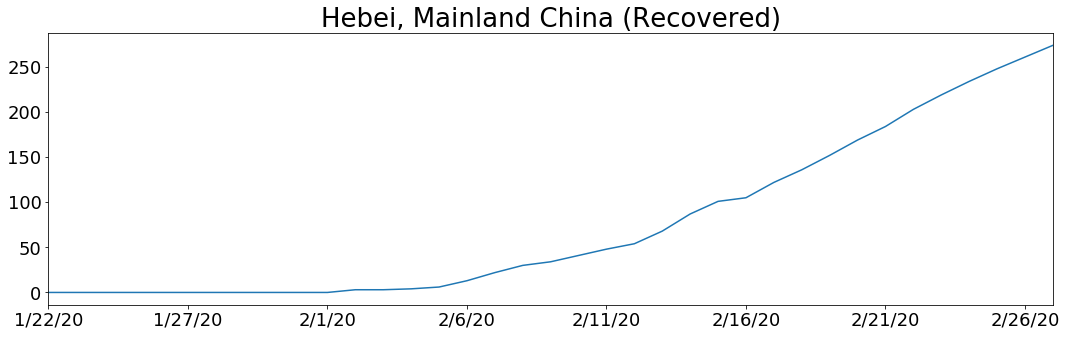

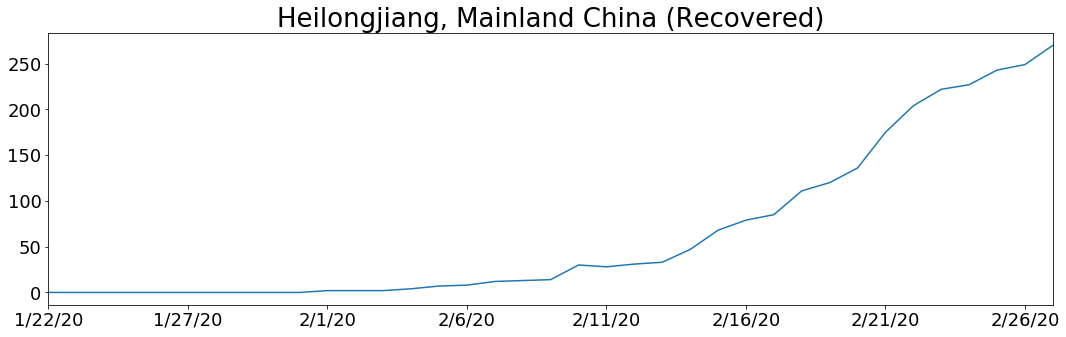

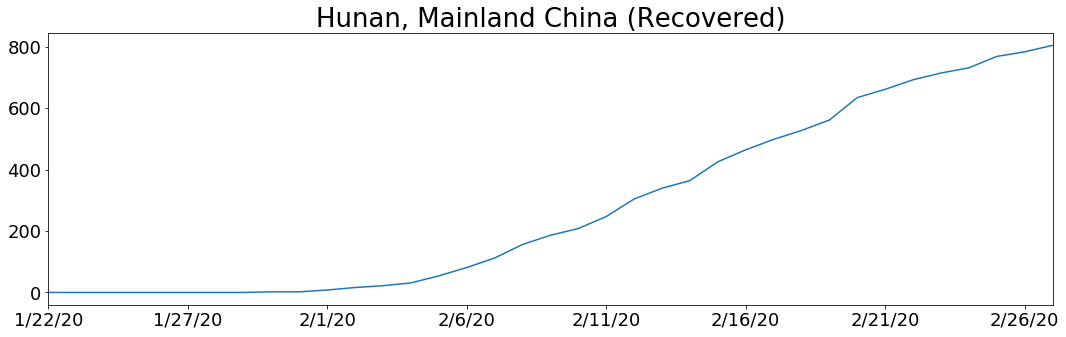

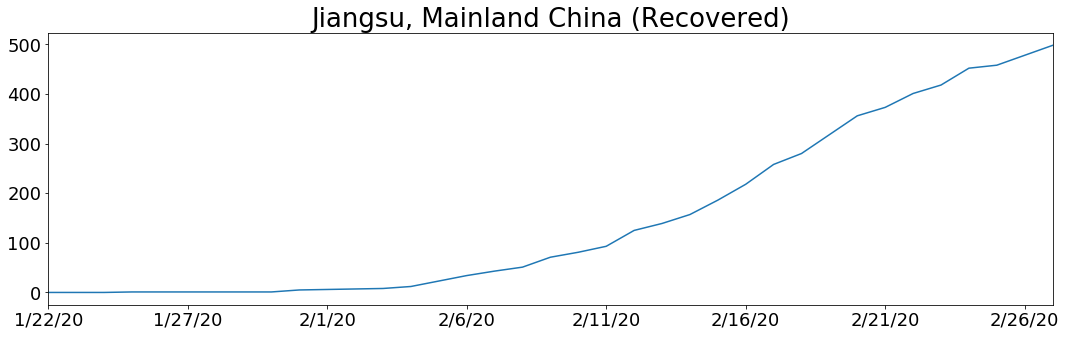

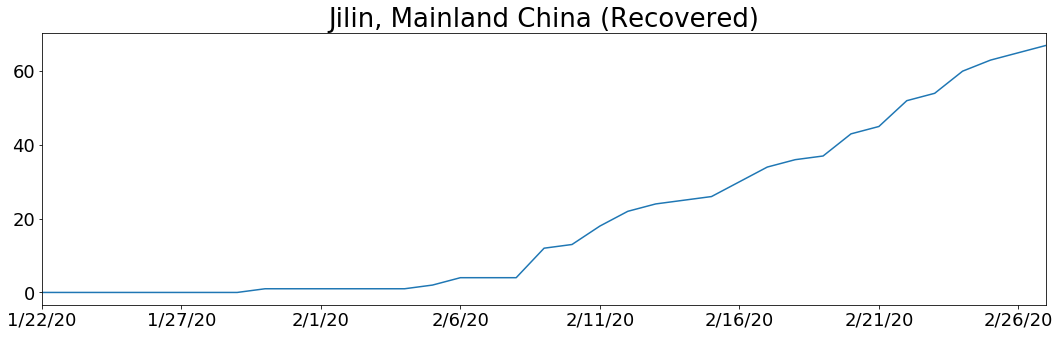

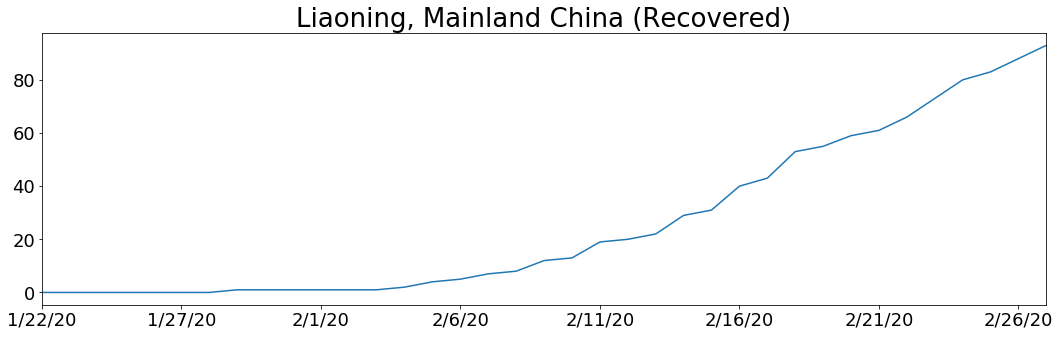

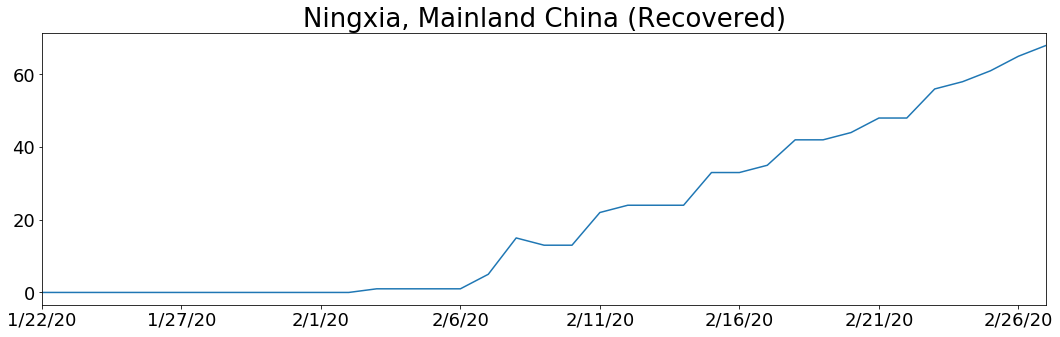

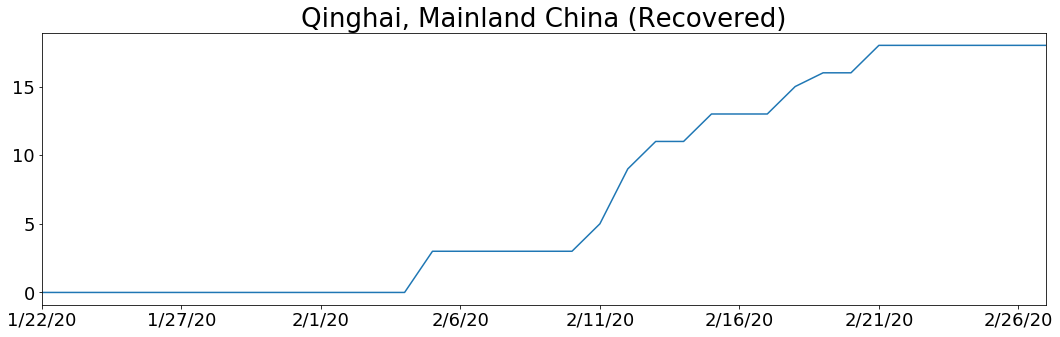

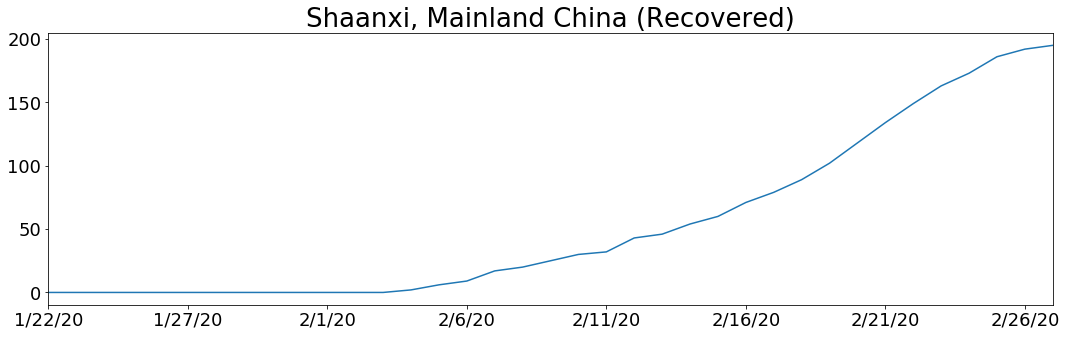

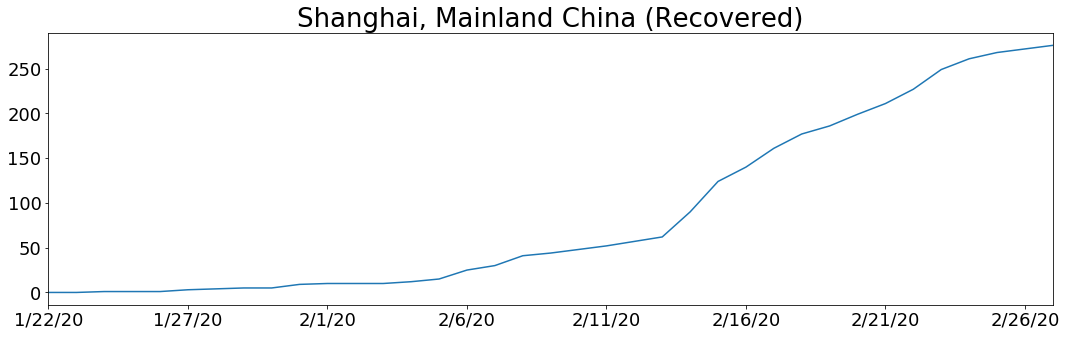

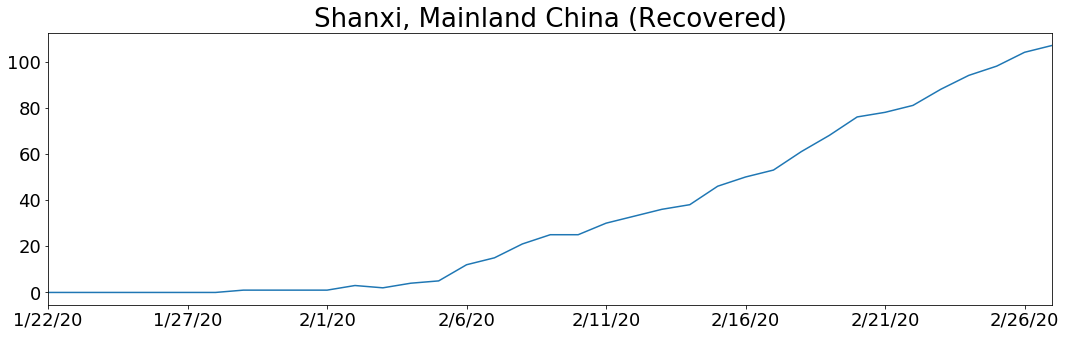

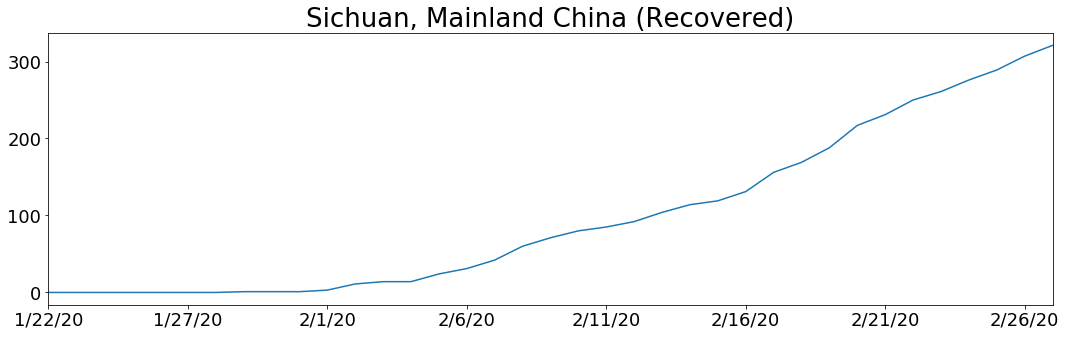

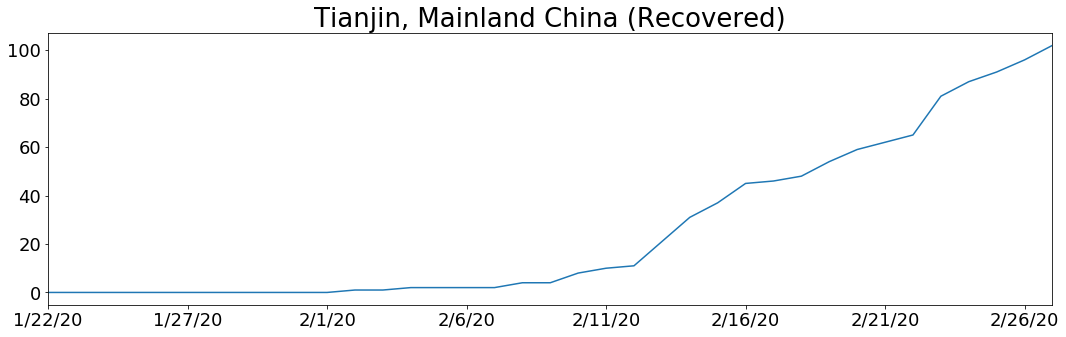

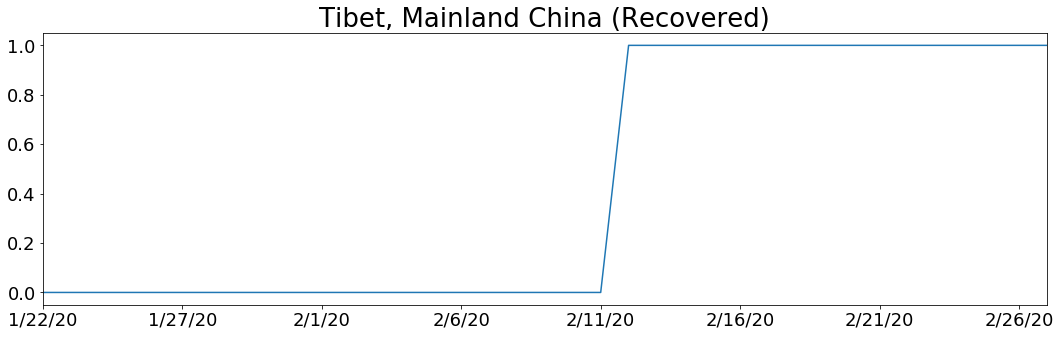

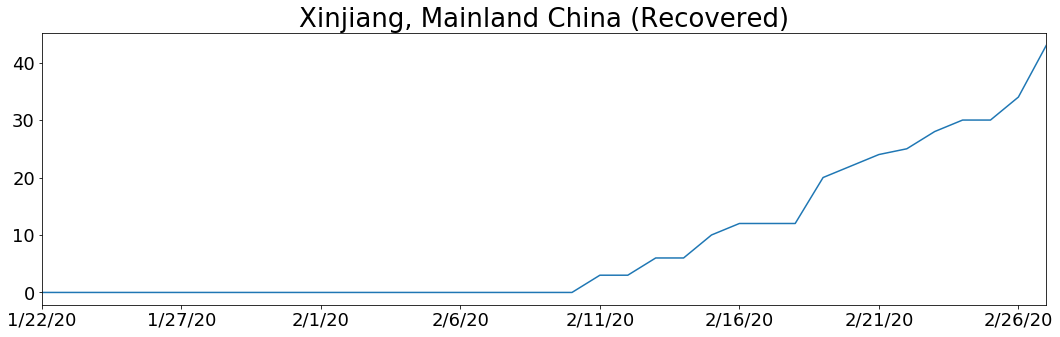

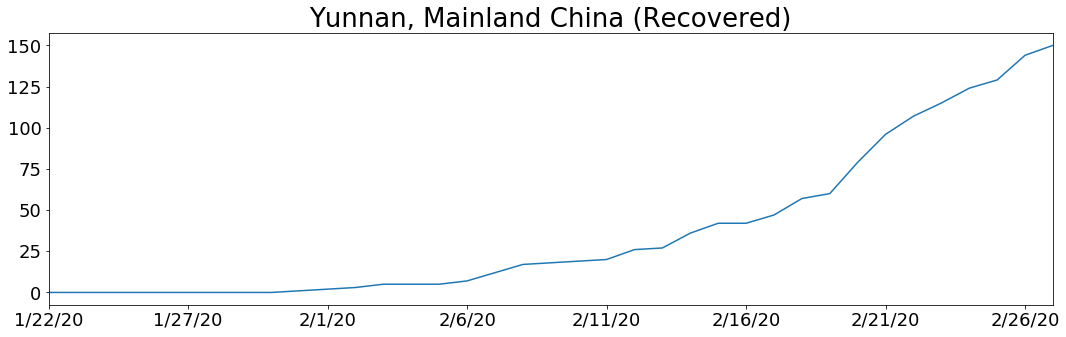

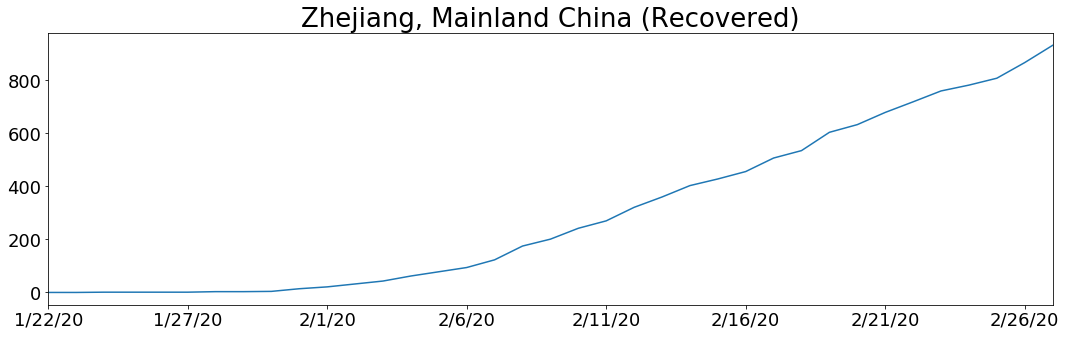

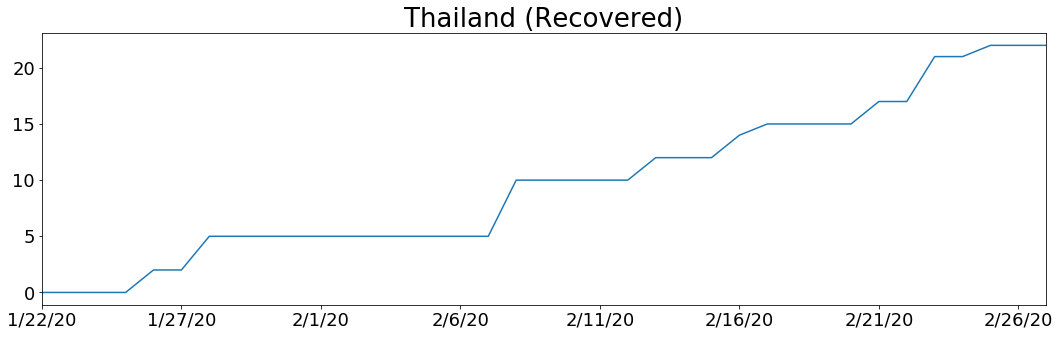

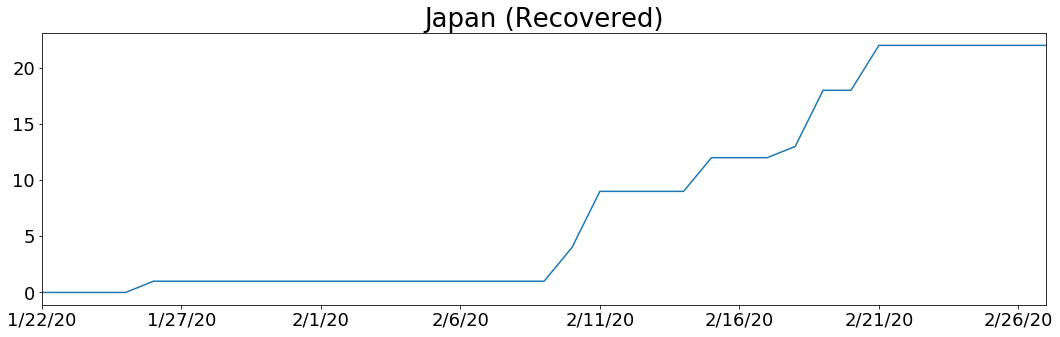

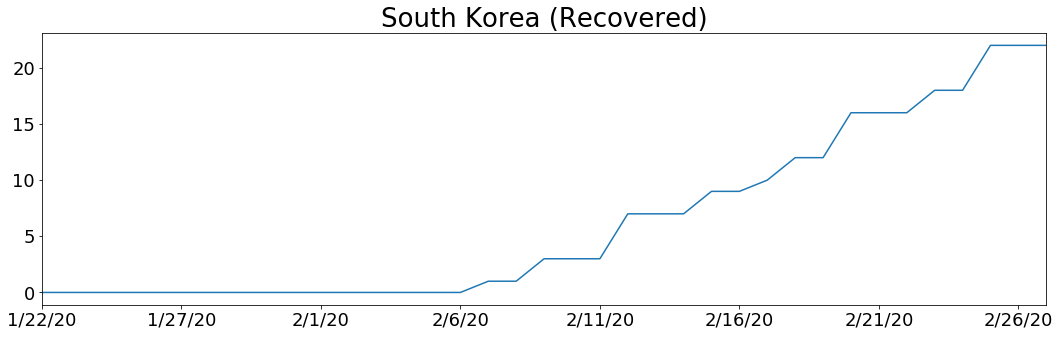

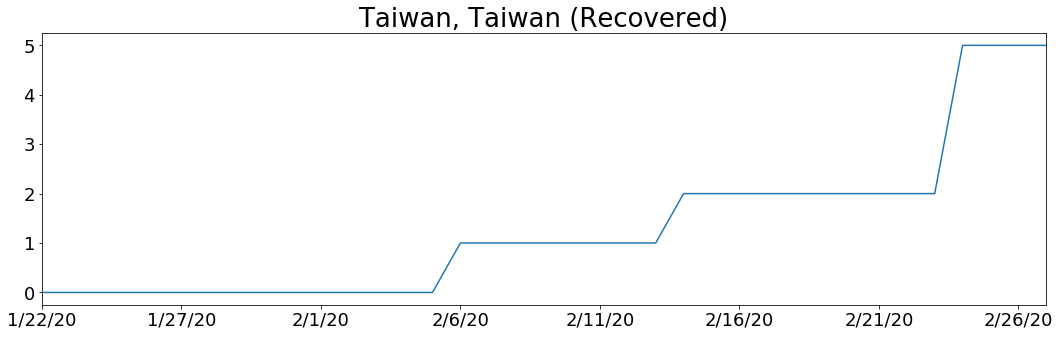

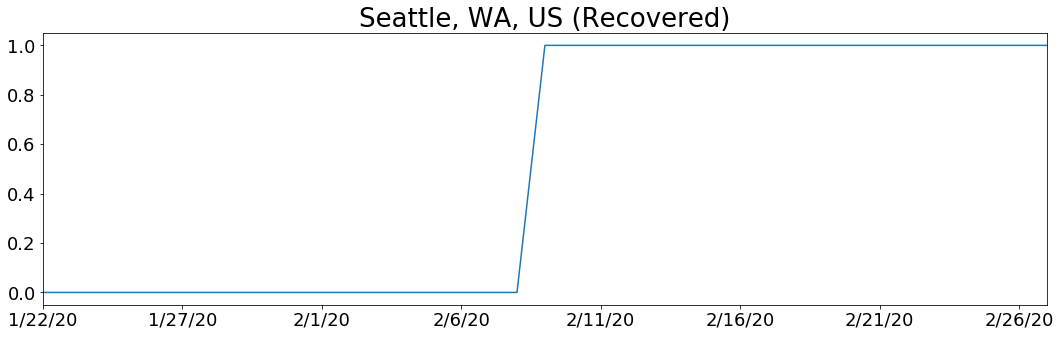

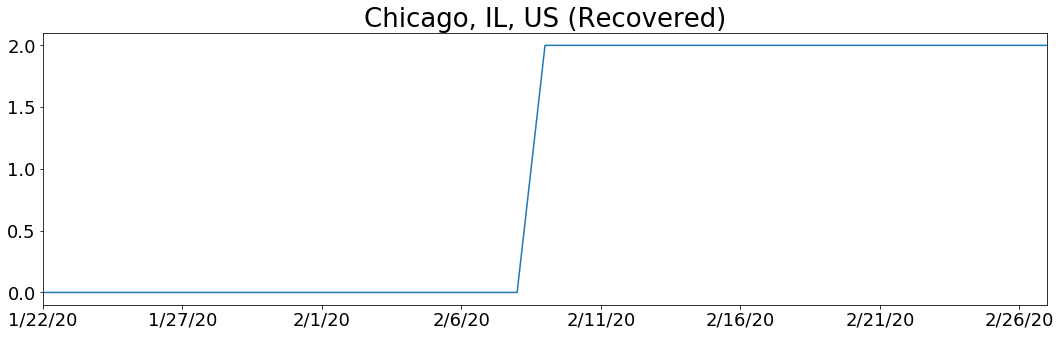

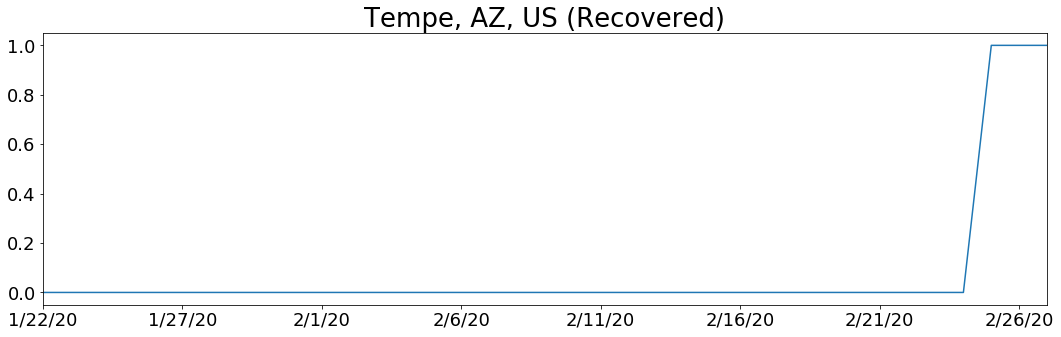

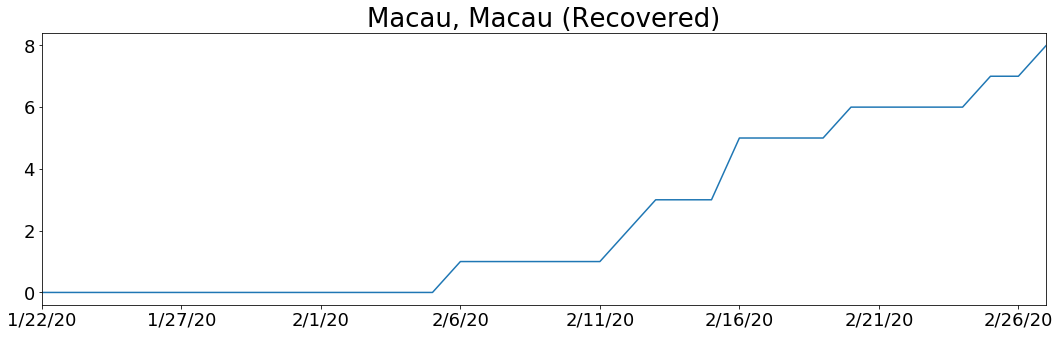

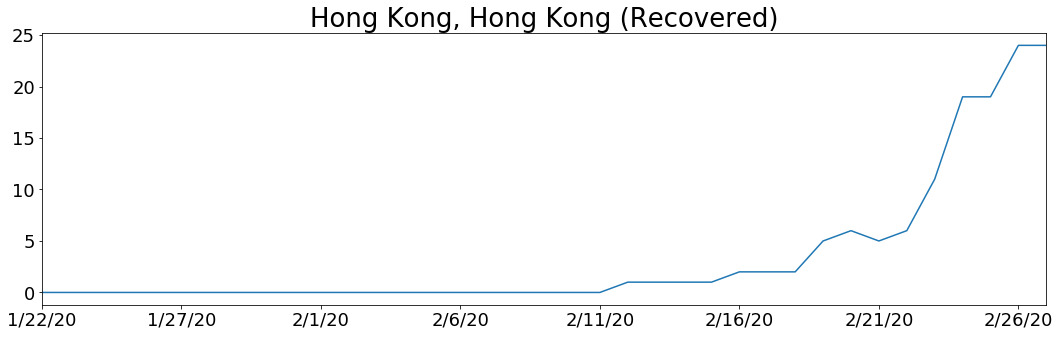

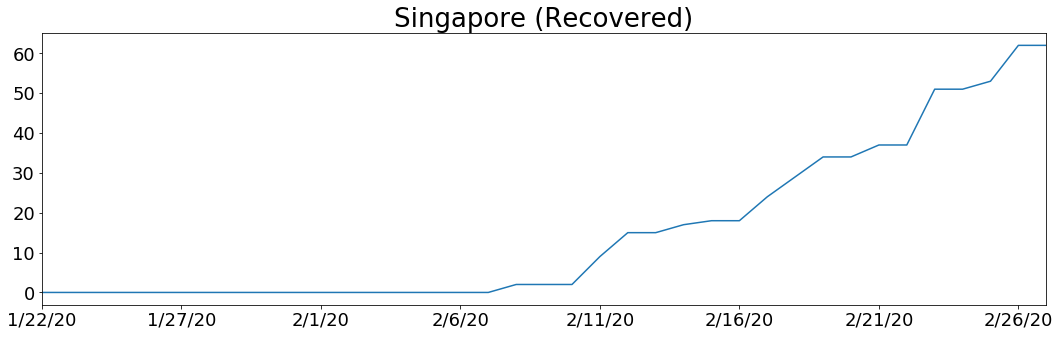

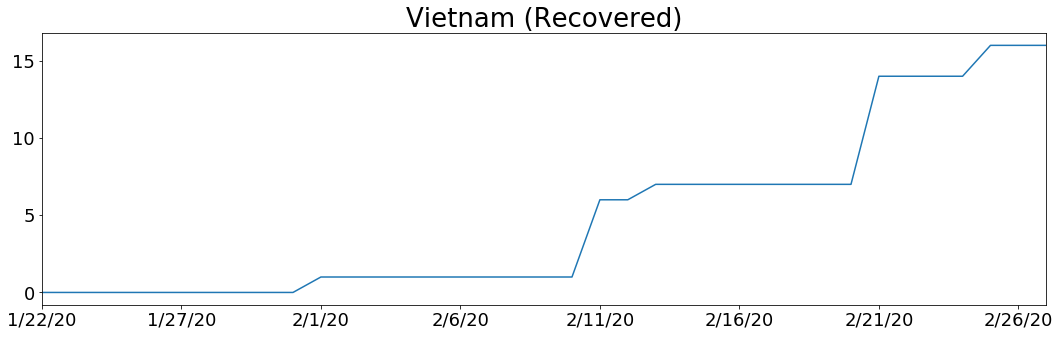

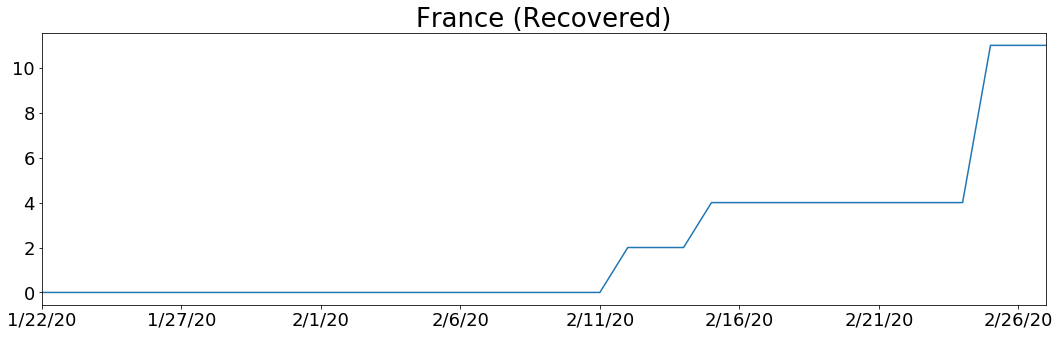

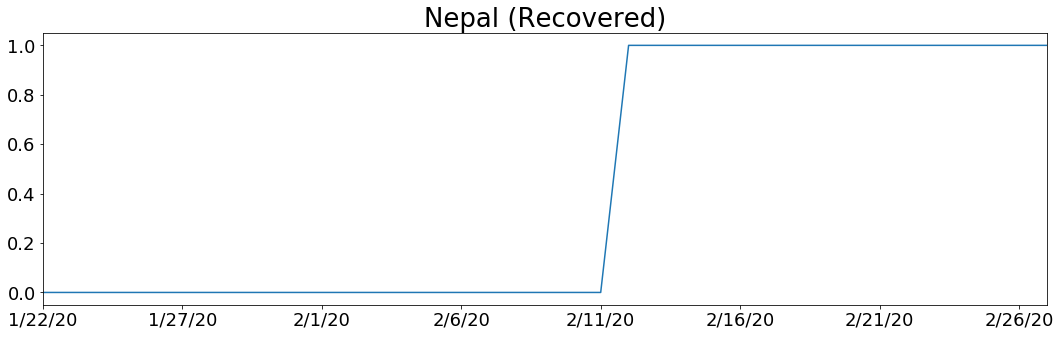

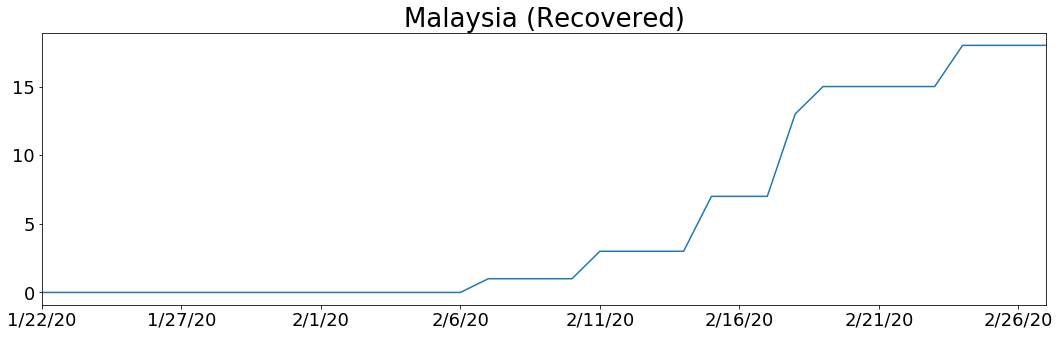

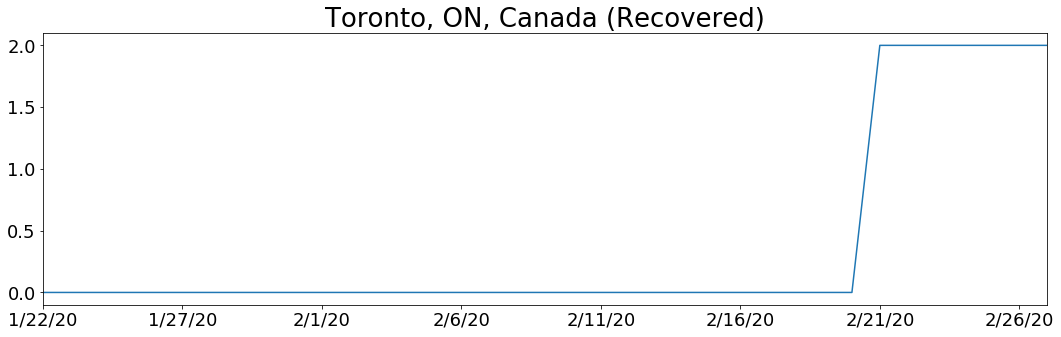

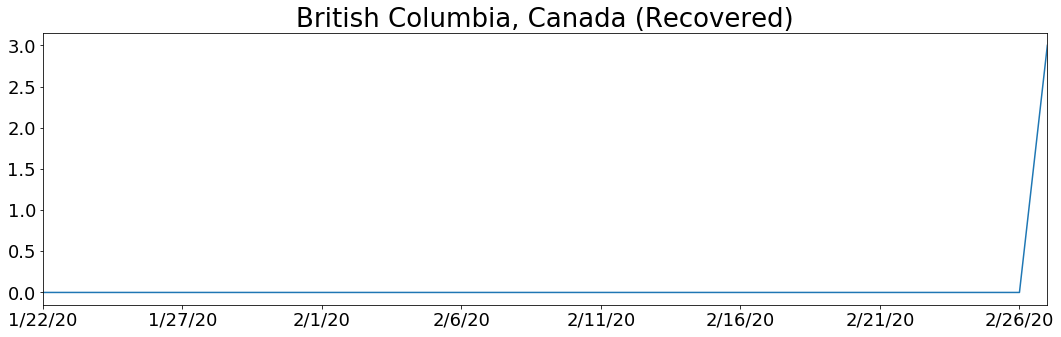

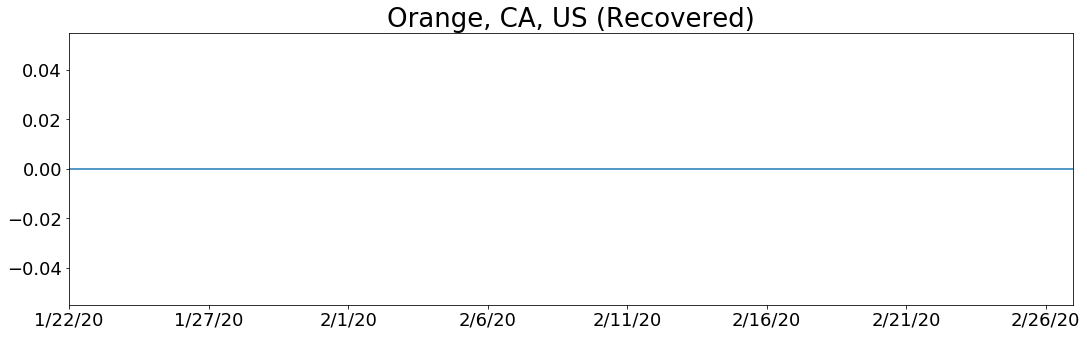

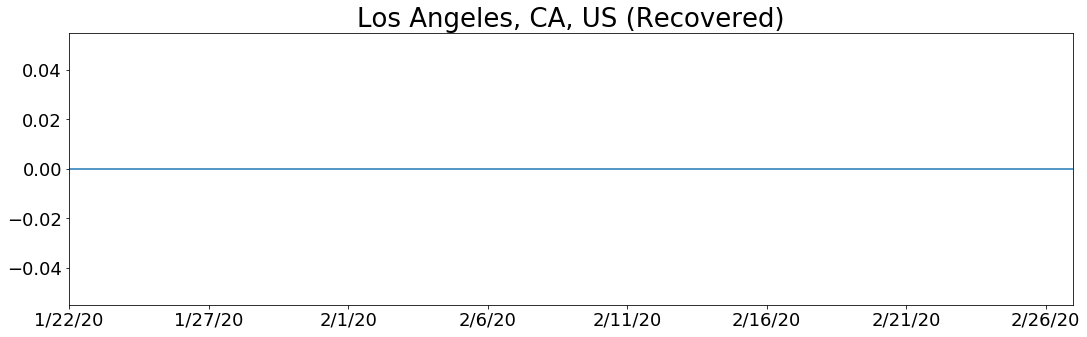

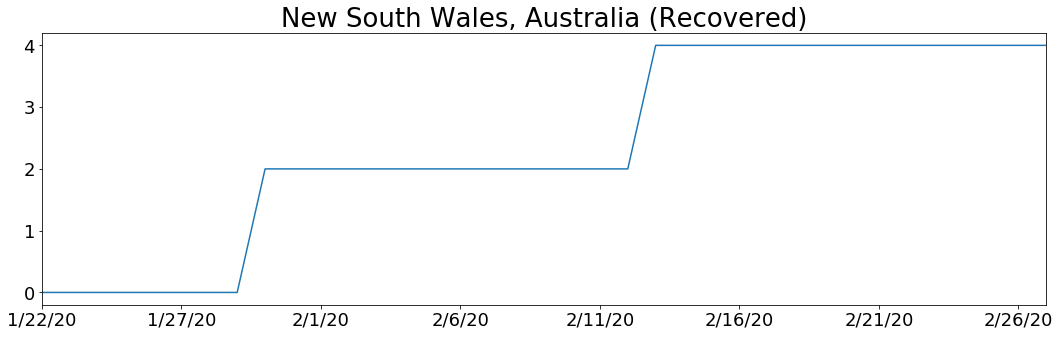

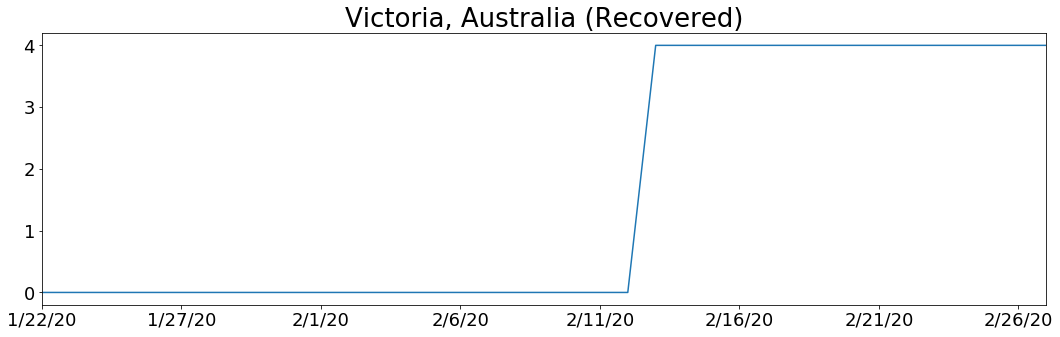

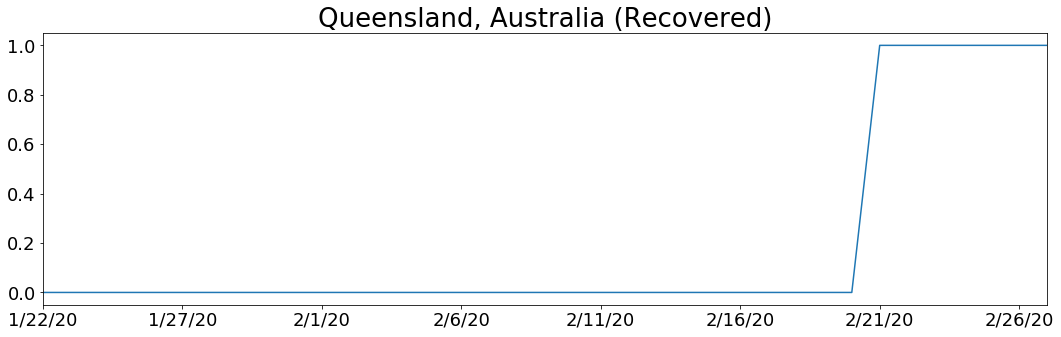

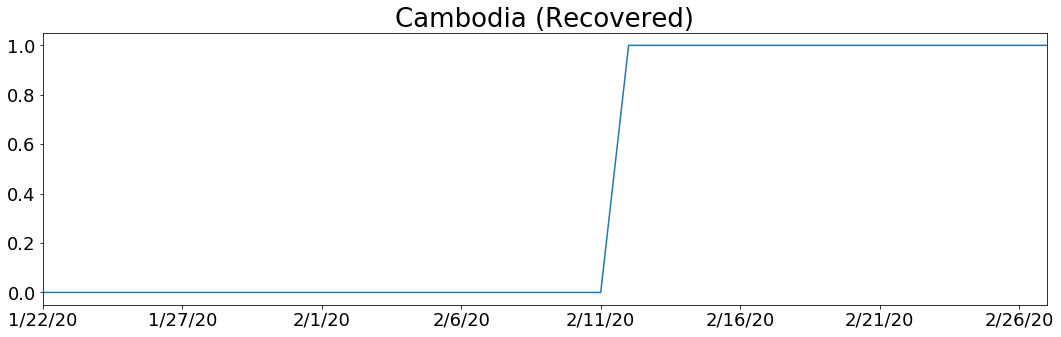

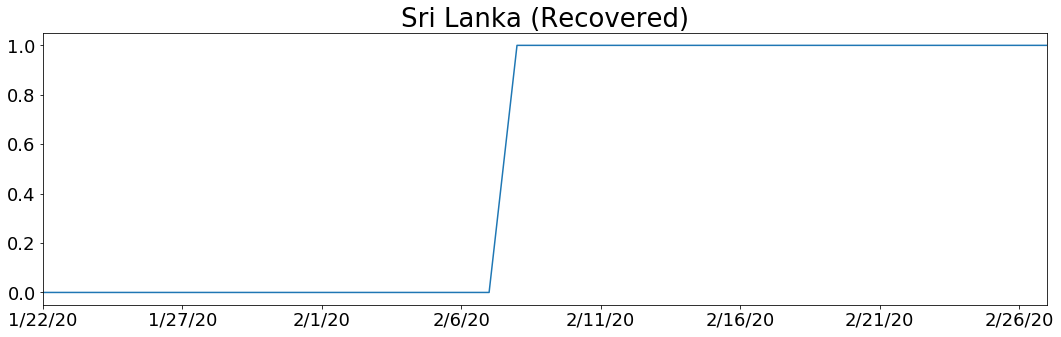

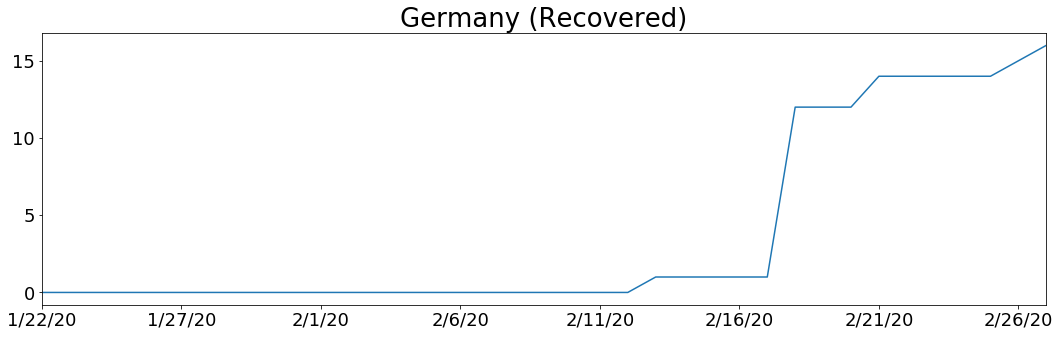

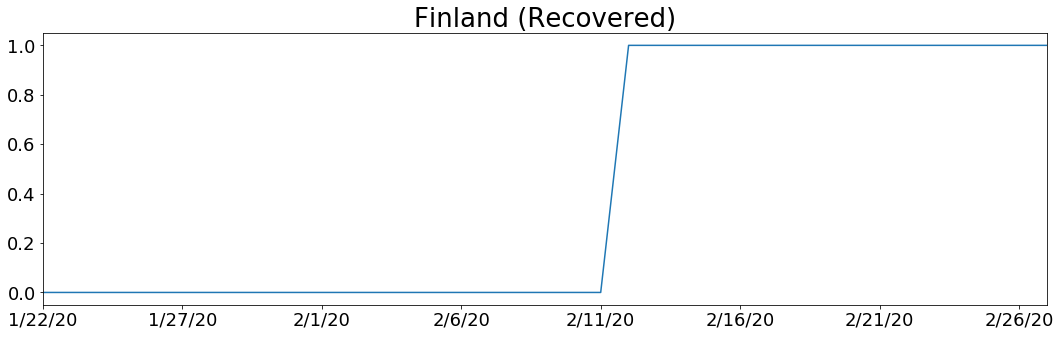

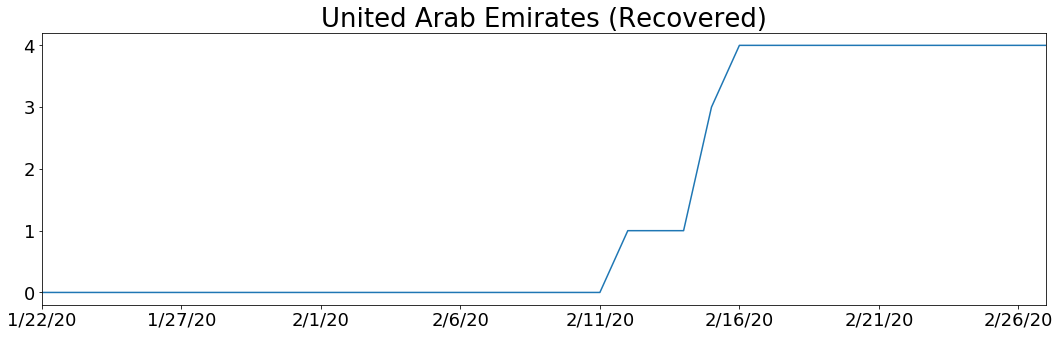

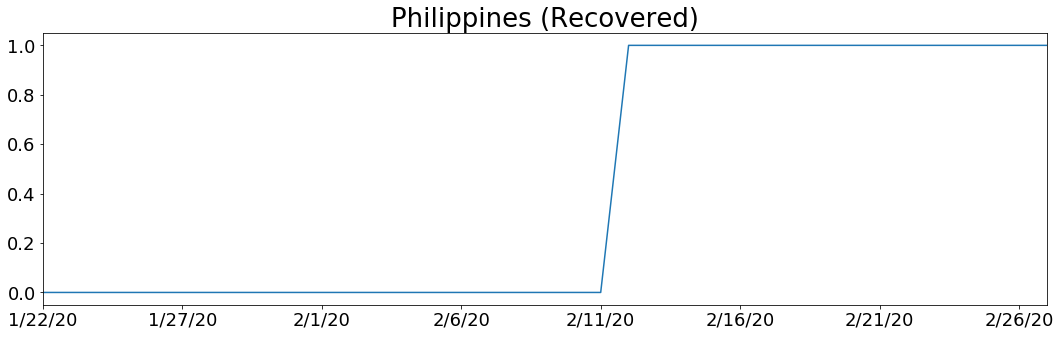

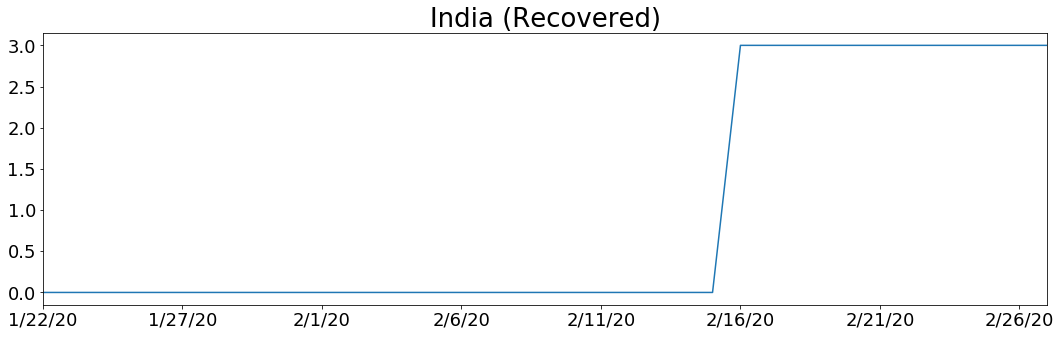

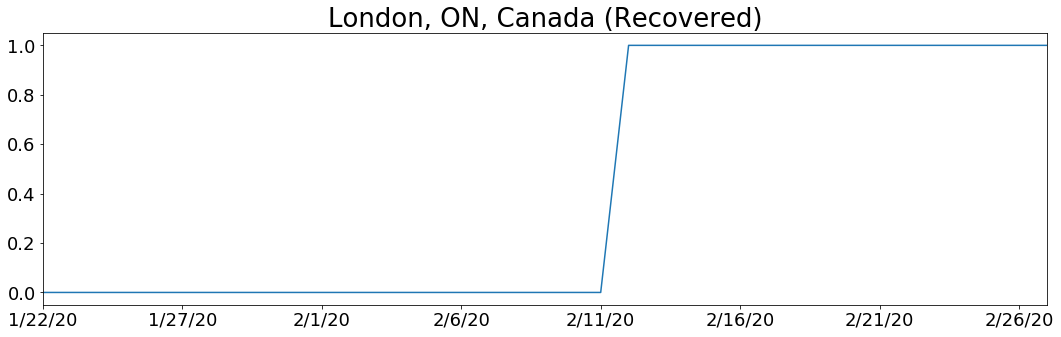

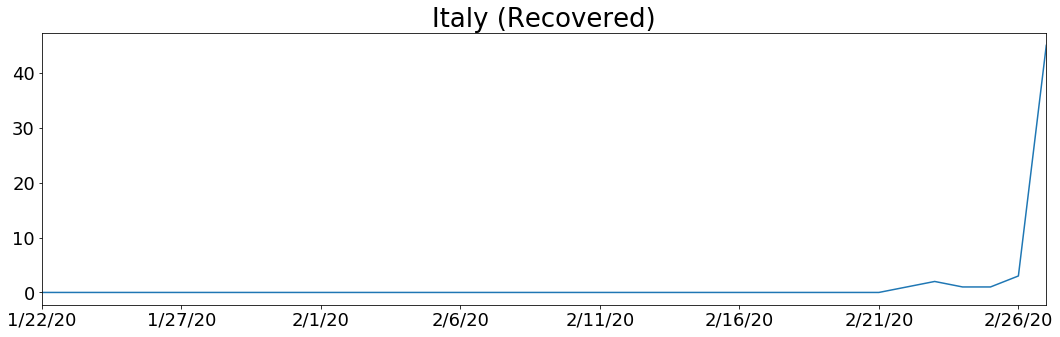

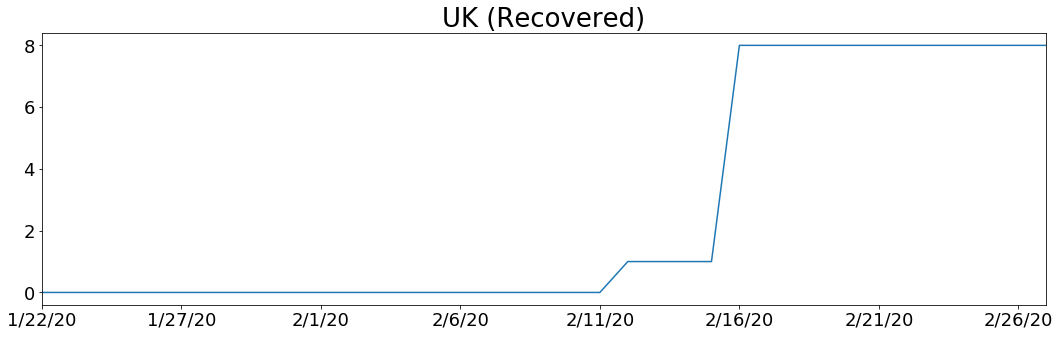

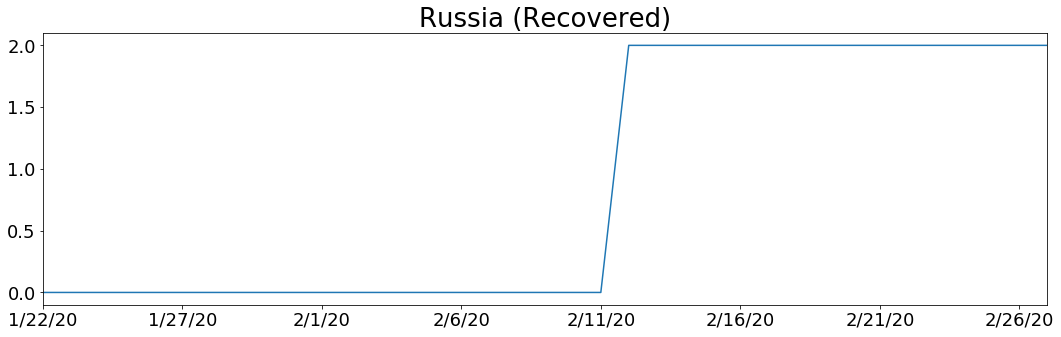

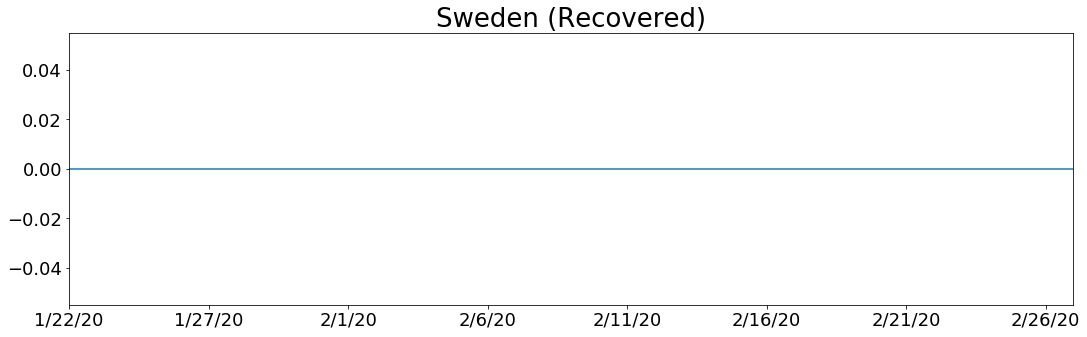

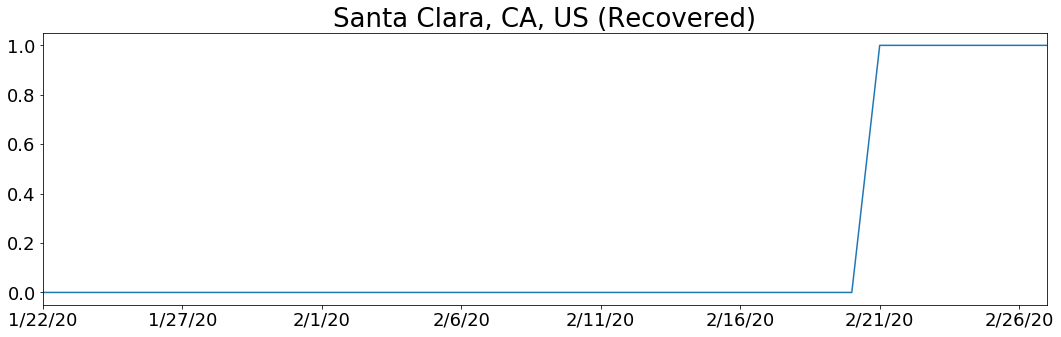

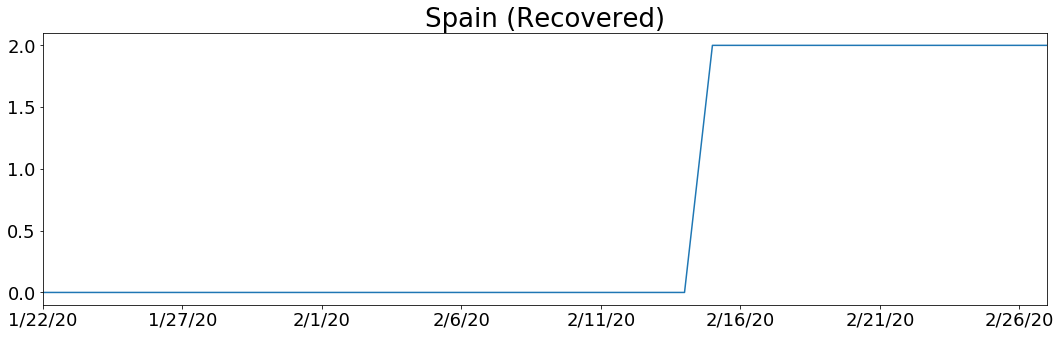

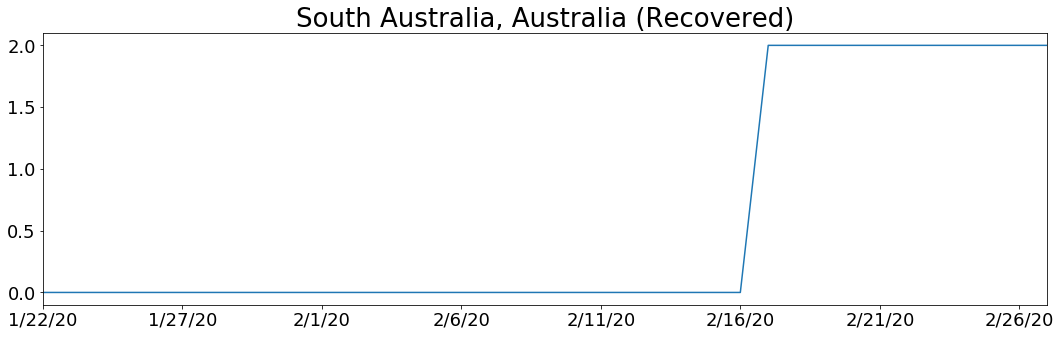

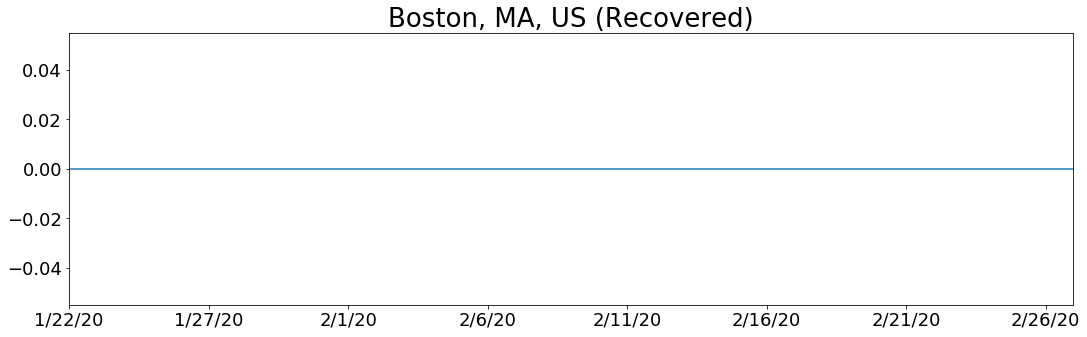

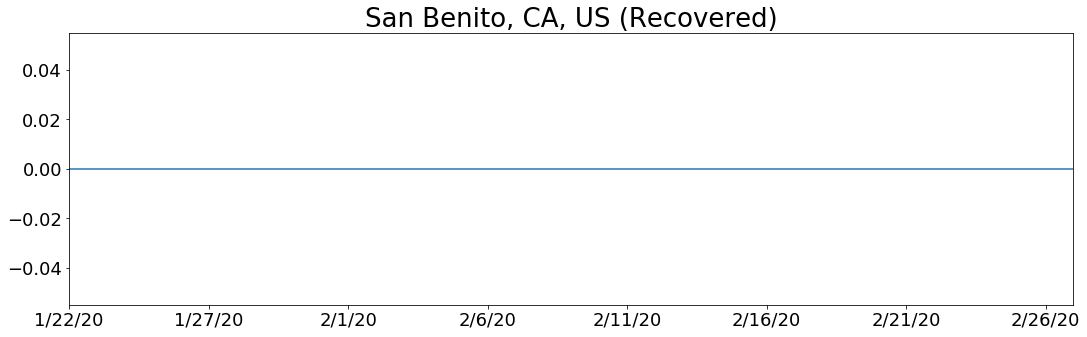

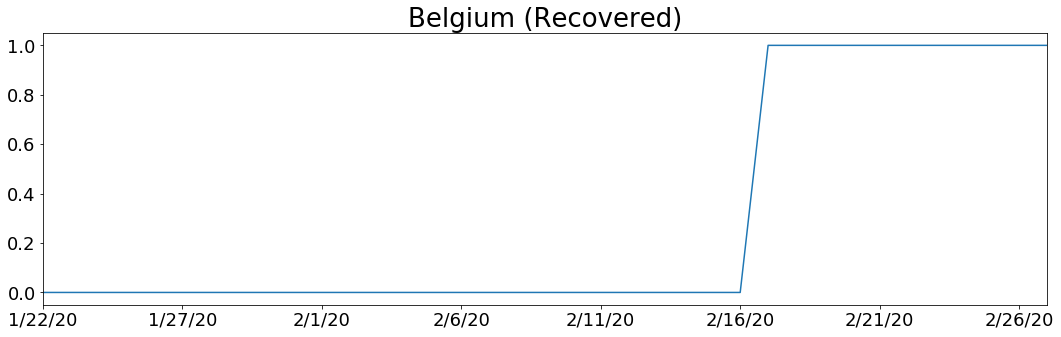

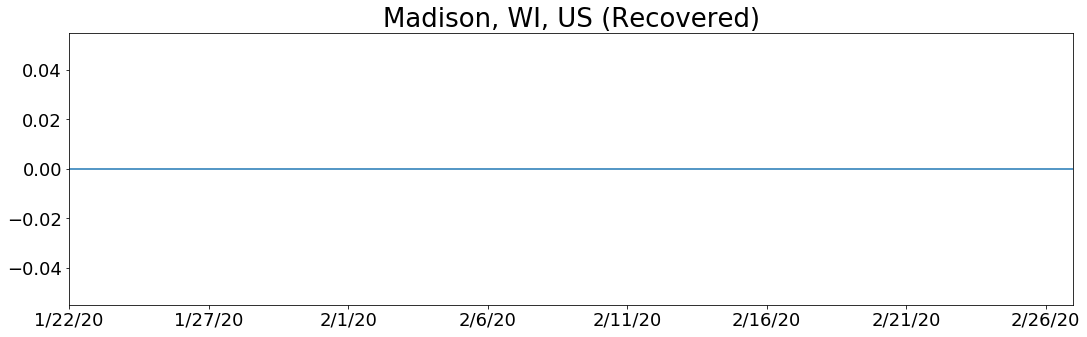

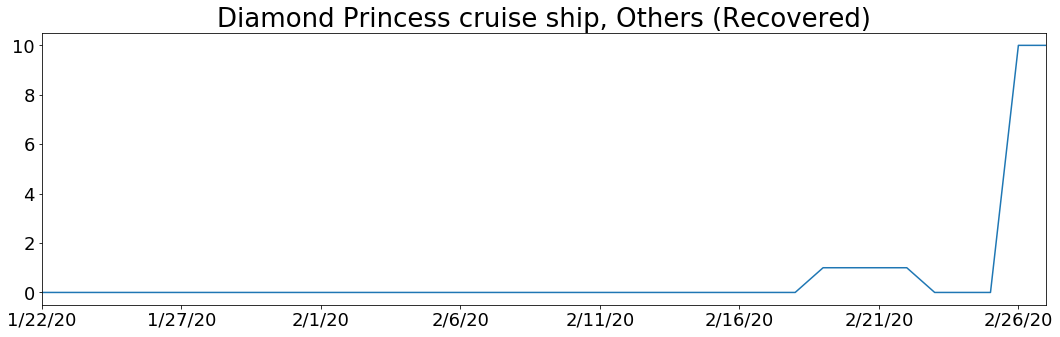

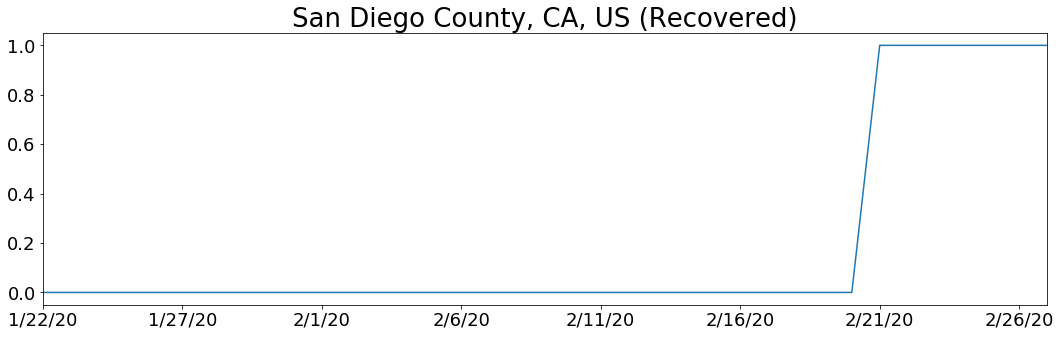

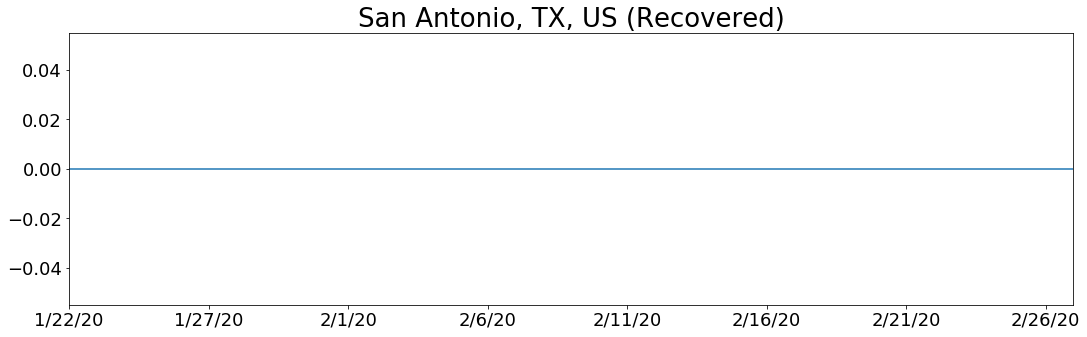

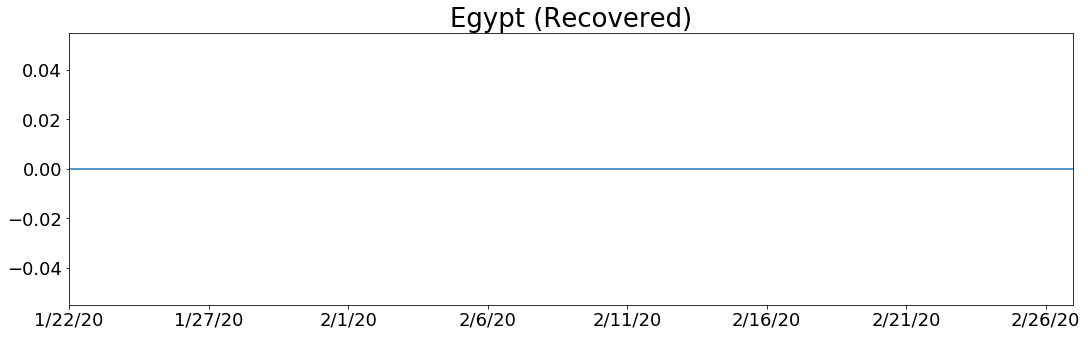

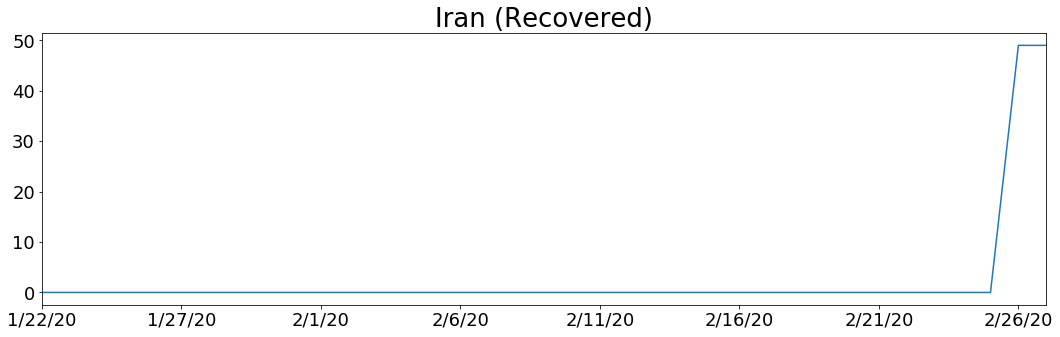

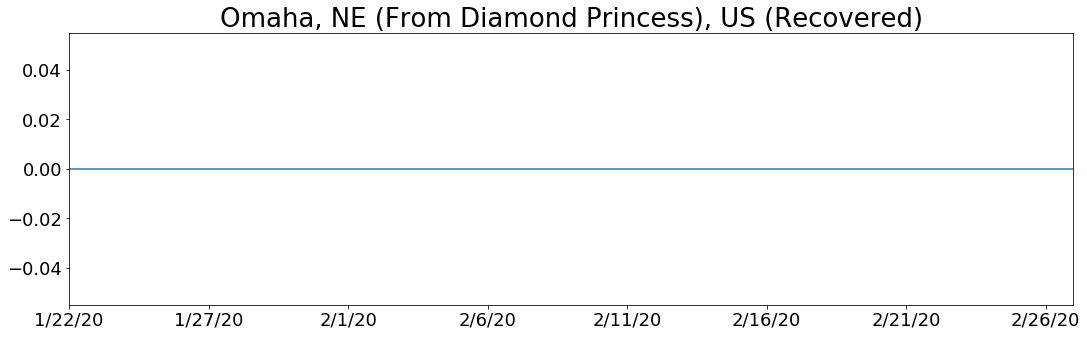

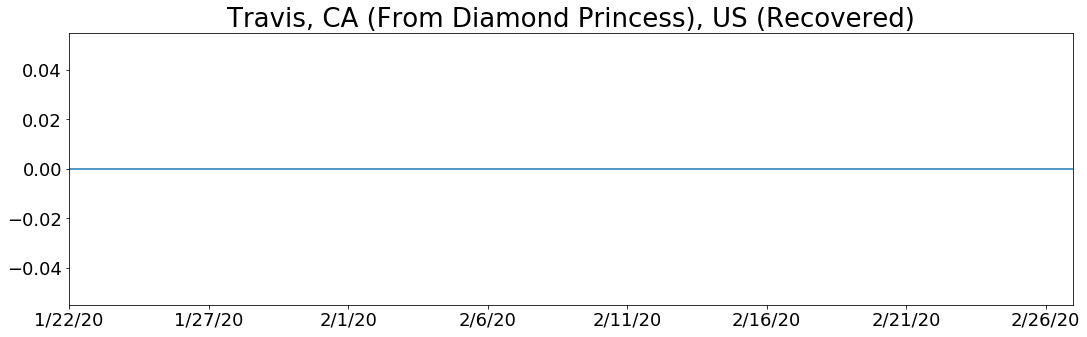

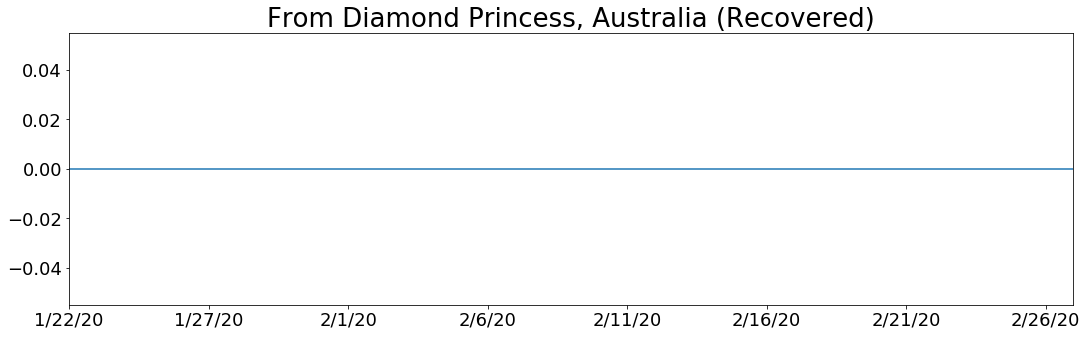

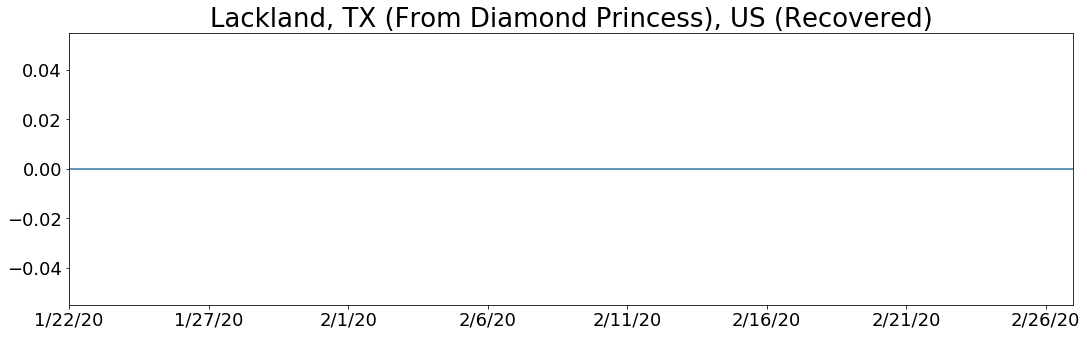

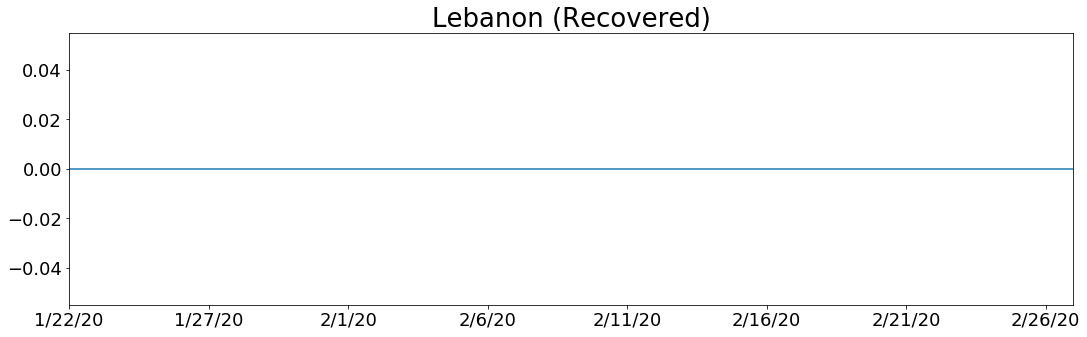

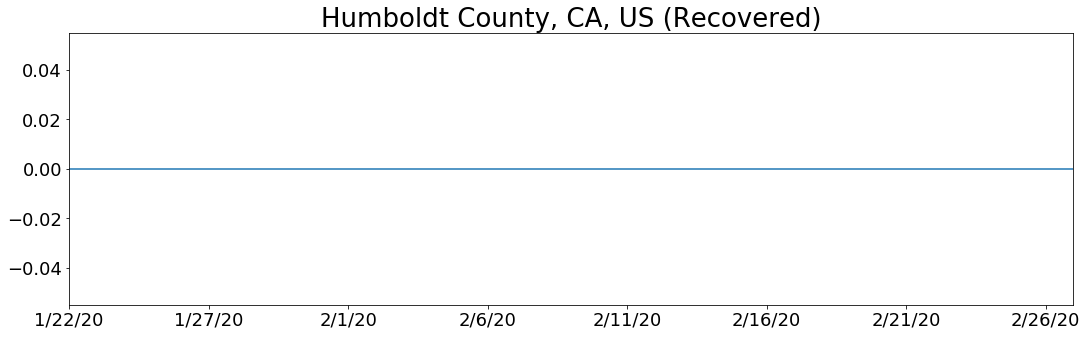

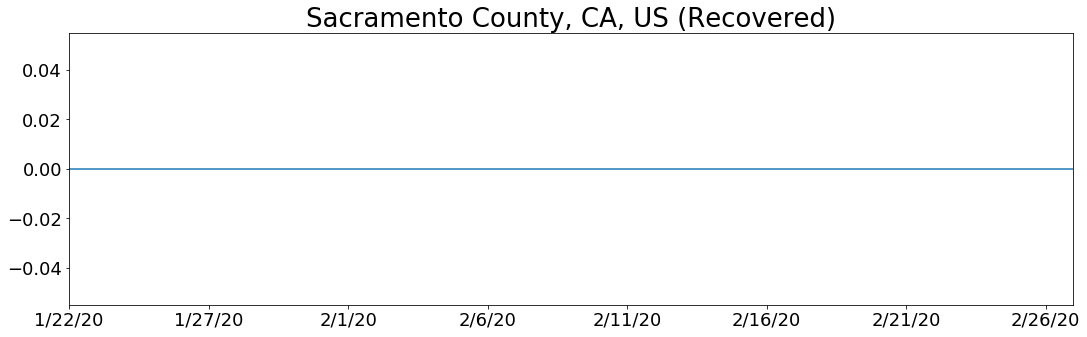

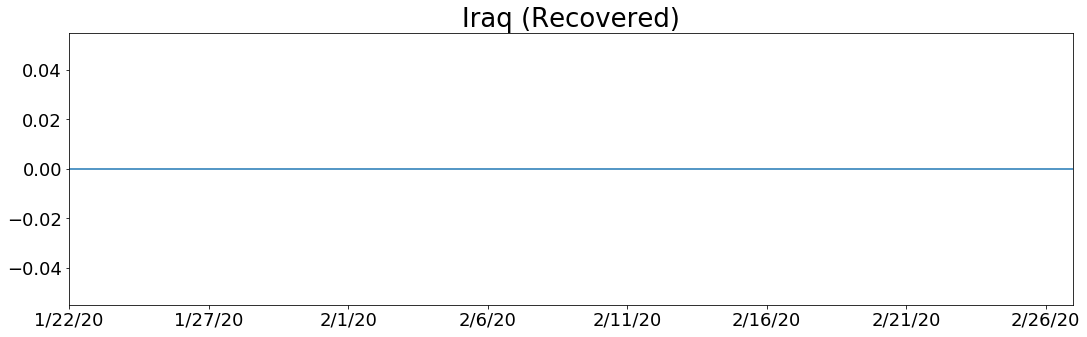

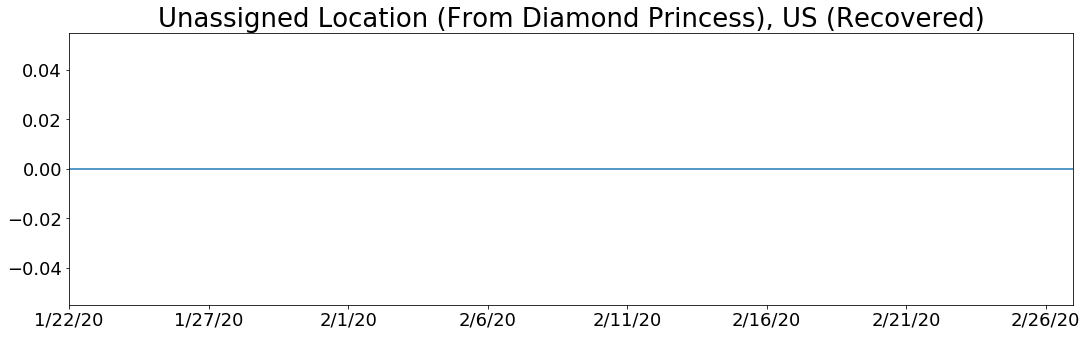

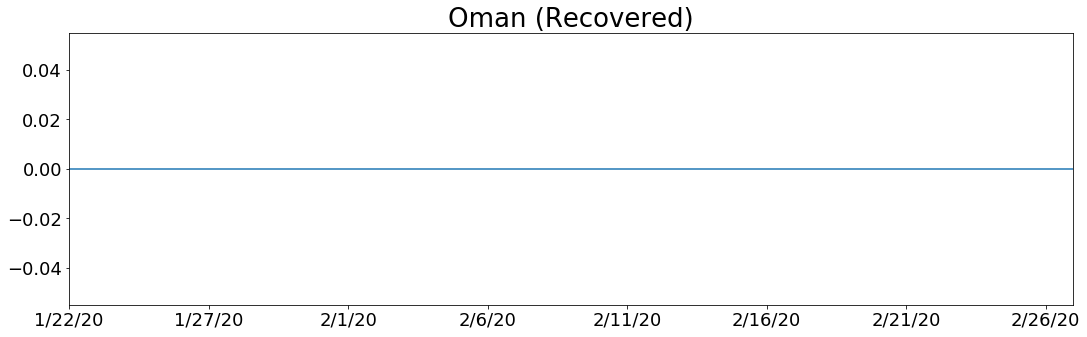

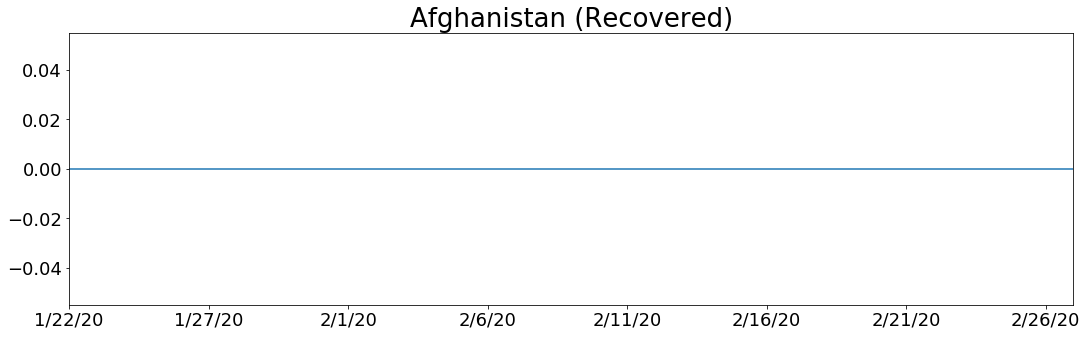

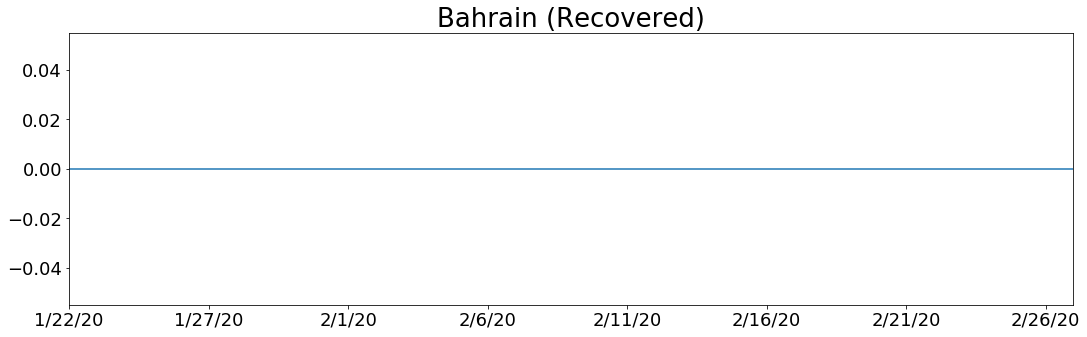

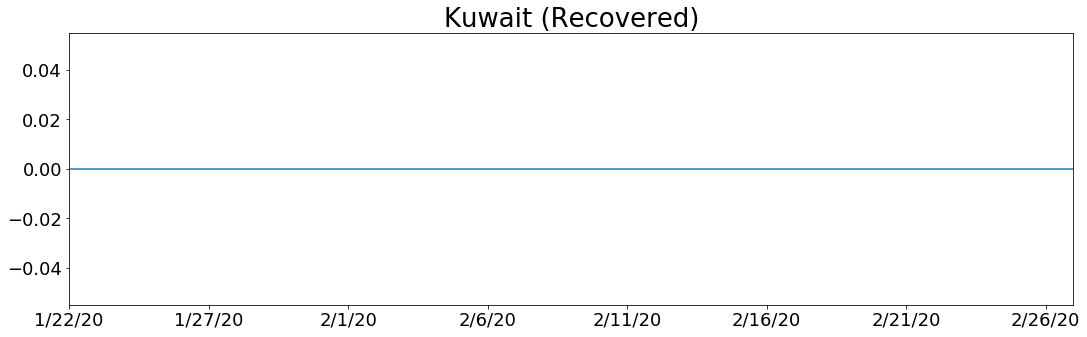

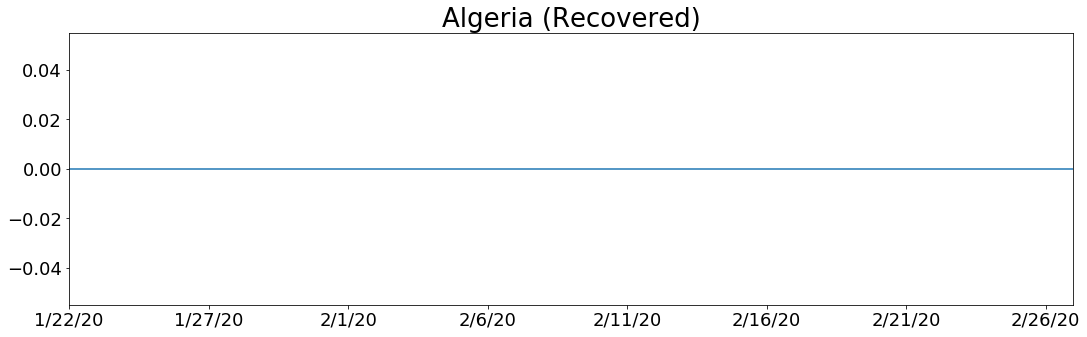

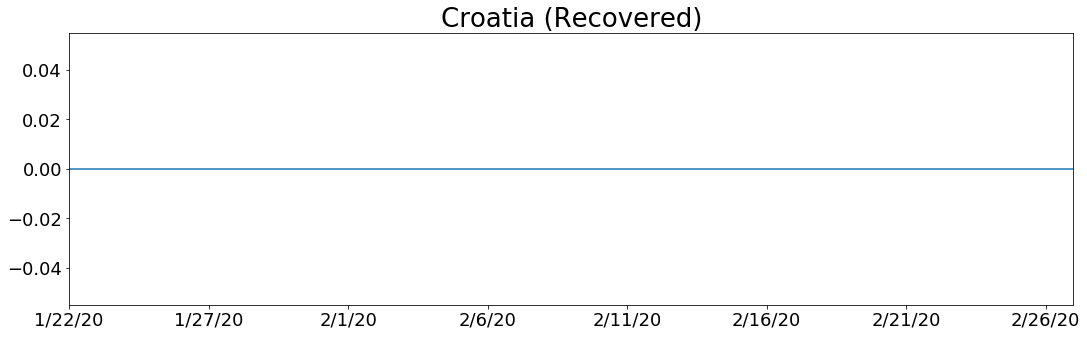

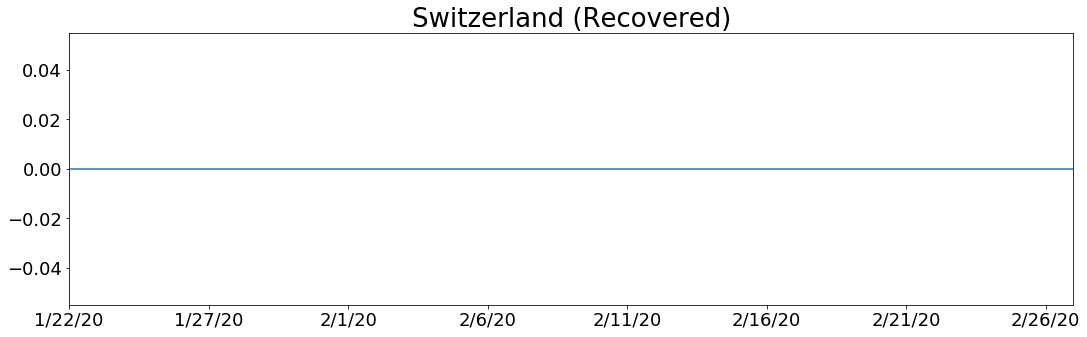

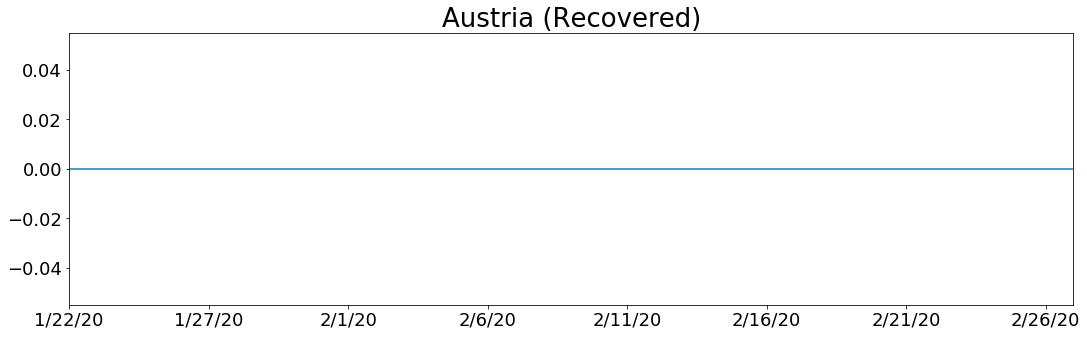

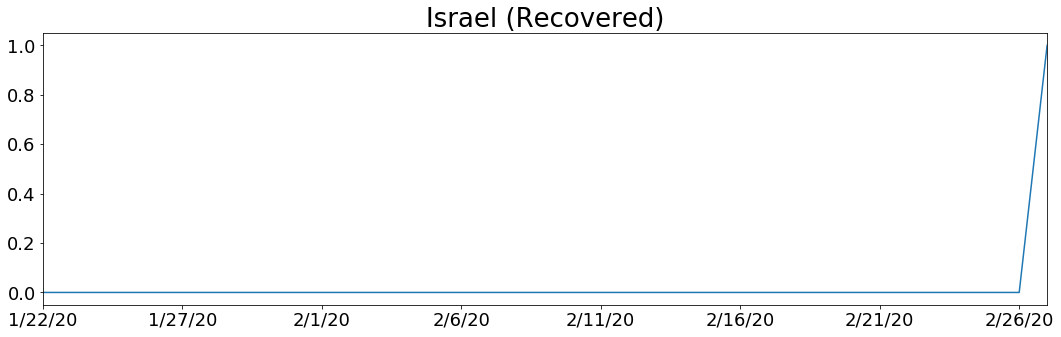

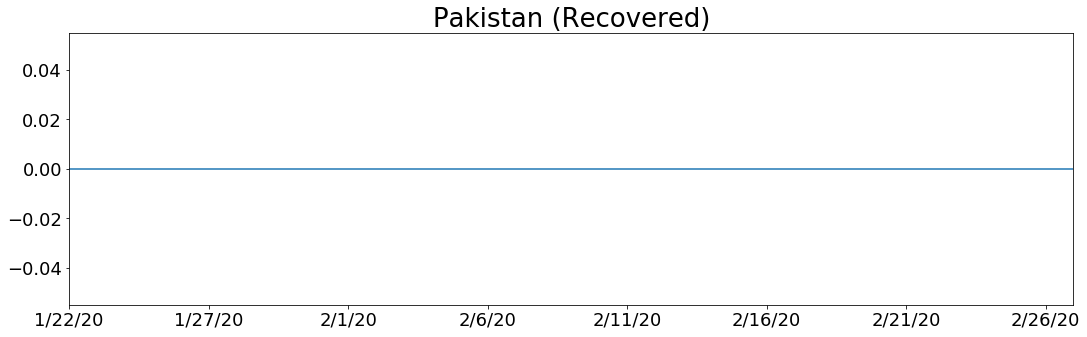

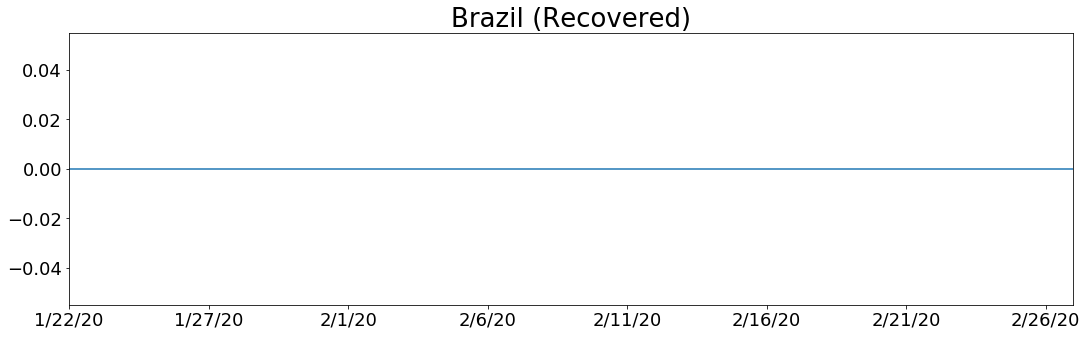

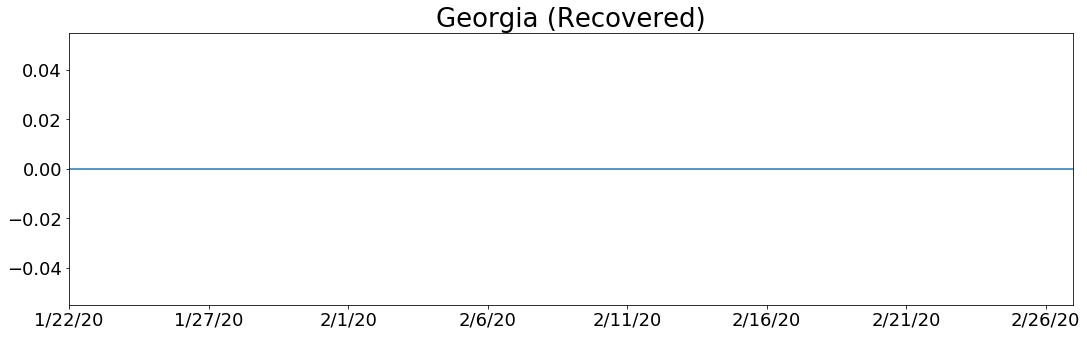

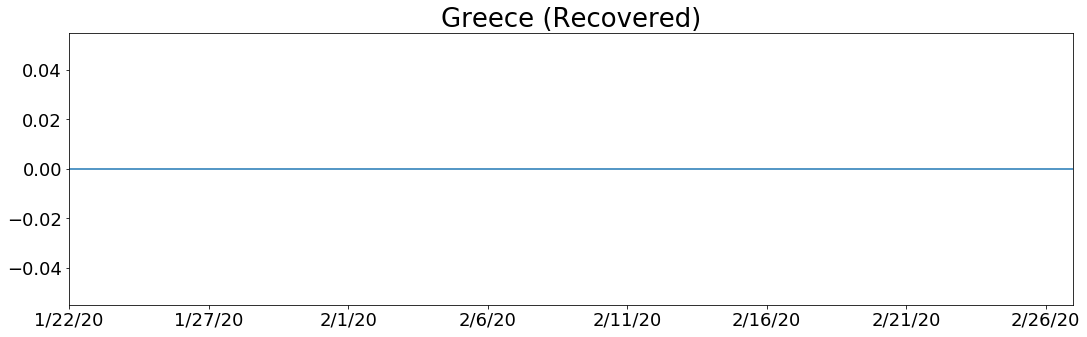

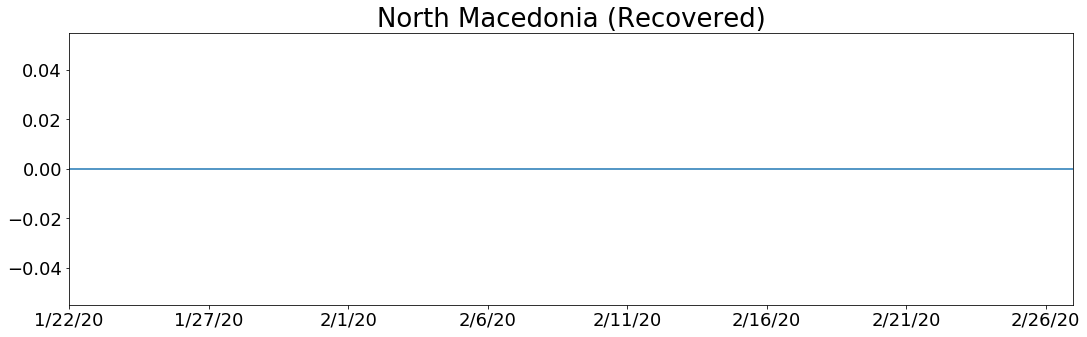

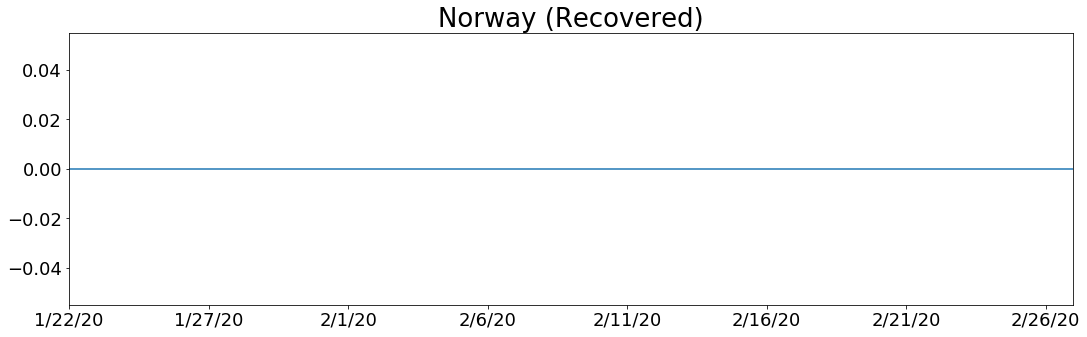

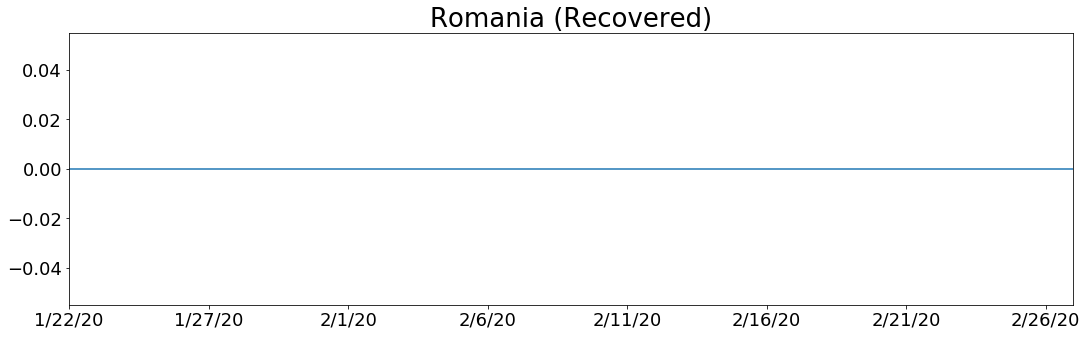

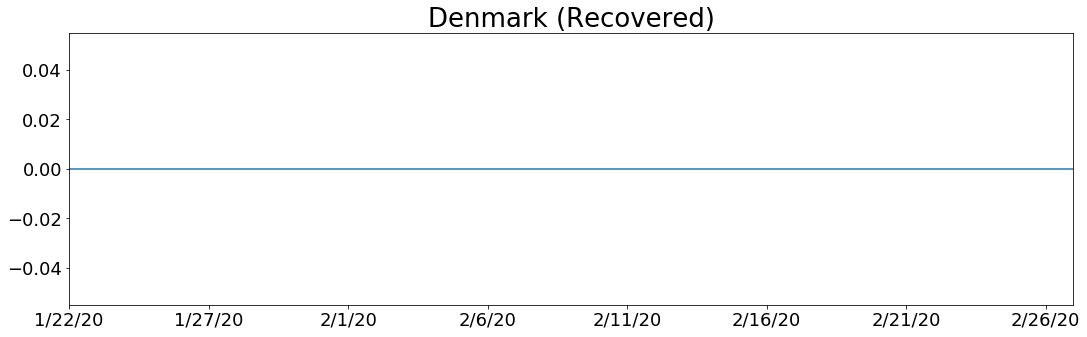

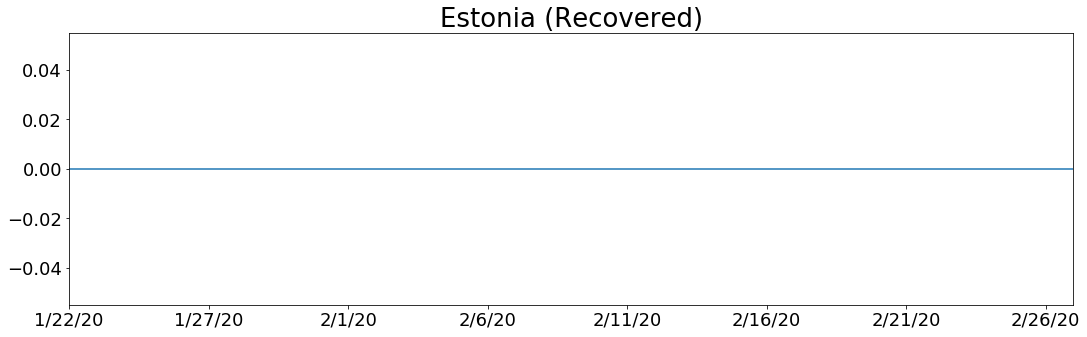

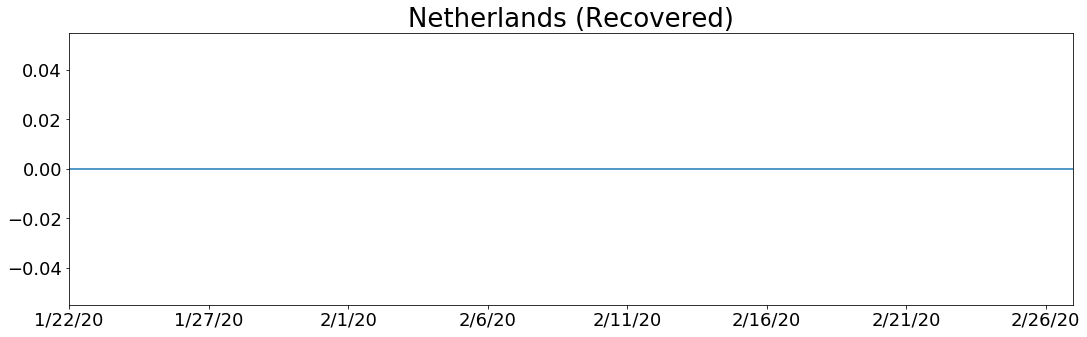

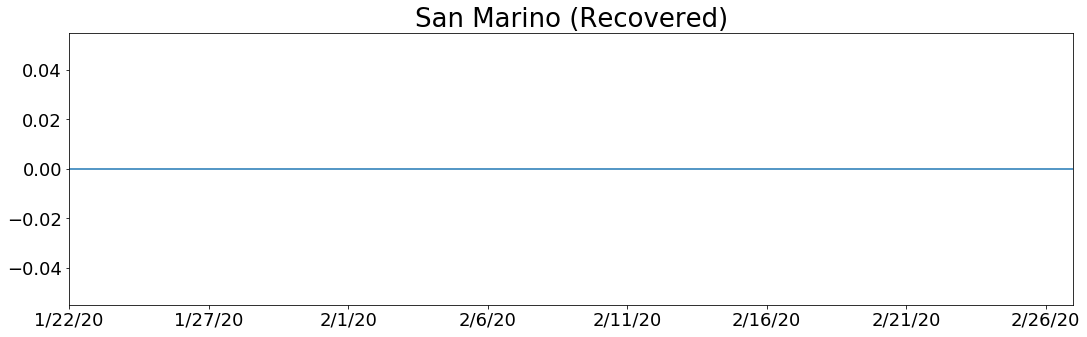

In [24]:
ticksize = 18
titlesize = ticksize + 8
labelsize = ticksize + 5

figsize = (18, 5)
params = {'figure.figsize' : figsize,
          'axes.labelsize' : labelsize,
          'axes.titlesize' : titlesize,
          'xtick.labelsize': ticksize,
          'ytick.labelsize': ticksize}

plt.rcParams.update(params)

title = "Total Number of Recovered by Date"
for index, row in time_series_covid_19_recovered.iterrows():
    row[data_cols].plot()
    if not row["Province/State"]=="NA":
        plt.title(row["Province/State"] + ", " + row["Country/Region"] + " (Recovered)")
    else:
        plt.title(row["Country/Region"] + " (Recovered)")
    plt.show()